In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import matplotlib.ticker as mtick  

In [2]:
# Vamos trabalhar com cada dataset individualmente
application_train = pd.read_csv('application_train.csv')

In [3]:
# Visualizando linhas e colunas
application_train.shape

(307511, 122)

# Data Cleaning

In [4]:
# Temos uma alta dimensionalidade de dados
application_train.shape

(307511, 122)

In [5]:
# Temos o identificador do cliente, a target identificando clientes com chances de não pagar o empréstimo
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
# Podemos ver uma ampla gama de tipos de dados dentro do dataframe
print(application_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [7]:
# Temos diversas variaveis dentro do dataset, queai variaveis são as mais significativas para o modelo
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [8]:
# Estatísticas descritivas das variáveis numéricas
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Análise das Estatísticas Descritivas

1. Conclusões Preliminares:
- A média de TARGET sugere que cerca de 8.07% dos mutuários são classificados como inadimplentes.
- A maioria dos mutuários não possui filhos ou tem poucos filhos, embora haja casos extremos com até 19 filhos.
- Há uma grande variação nos rendimentos totais dos mutuários, como indicado pelo desvio padrão elevado de AMT_INCOME_TOTAL.
- AMT_CREDIT também apresenta uma ampla gama de valores solicitados, com alguns pedidos muito maiores que outros.
- As variáveis DAYS_BIRTH e DAYS_EMPLOYED estão codificadas como dias negativos, representando idade e tempo de emprego, respectivamente.

2. Próximos Passos:
- Explorar a relação entre as variáveis e a inadimplência (TARGET) através de gráficos de dispersão e matriz de correlação.
- Investigar outliers e distribuições específicas para entender melhor o comportamento dos mutuários.

## DATA NULLS

### NULLS 
(Variaveis que excedem 45% de valores nulos)

In [9]:
# Calcular a porcentagem de valores nulos em cada coluna
null_percent = (application_train.isnull().sum() / len(application_train)) * 100

null_percent

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [10]:
# Criar um DataFrame com as colunas e a porcentagem de valores nulos
null_df = pd.DataFrame({'Coluna': application_train.columns, 'Porcentagem de Nulos': null_percent})

# Filtrar colunas >= 45% de nulos
# Os valores nulos, conforme a tabela acima mostram que as variaveis com grande quantidades de valores nulos estão acima de 45%
null_df = null_df[null_df['Porcentagem de Nulos'] >= 45]

# Resetar o índice para evitar a duplicação dos nomes das colunas
null_df.reset_index(drop=True, inplace=True)

# Exibir as colunas que serão consideradas para exclusão
print(null_df)

# Podemos observar que são variáveis que não são tão relevantes para o dataframe, o que contrinuem para essa afirmação é muitos dados nulos
# Total de 48 colunas 

                          Coluna  Porcentagem de Nulos
0                    OWN_CAR_AGE             65.990810
1                   EXT_SOURCE_1             56.381073
2                 APARTMENTS_AVG             50.749729
3               BASEMENTAREA_AVG             58.515956
4    YEARS_BEGINEXPLUATATION_AVG             48.781019
5                YEARS_BUILD_AVG             66.497784
6                 COMMONAREA_AVG             69.872297
7                  ELEVATORS_AVG             53.295980
8                  ENTRANCES_AVG             50.348768
9                  FLOORSMAX_AVG             49.760822
10                 FLOORSMIN_AVG             67.848630
11                  LANDAREA_AVG             59.376738
12          LIVINGAPARTMENTS_AVG             68.354953
13                LIVINGAREA_AVG             50.193326
14       NONLIVINGAPARTMENTS_AVG             69.432963
15             NONLIVINGAREA_AVG             55.179164
16               APARTMENTS_MODE             50.749729
17        

In [11]:
# Excluindo variaveis que contêm valores nulos iguais ou caima de 458%
# Extraindo o nome das colunas com mais de 45% de valores nulos
columns_to_drop = null_df['Coluna'].tolist()

# Excluindo as colunas do DataFrame original
application_train1 = application_train.drop(columns_to_drop, axis=1)

# Verificando as colunas restantes no DataFrame após a exclusão
print("Colunas originais:")
print(application_train.columns.tolist())
print("\nColunas após exclusão:")
print(application_train1.columns.tolist())

Colunas originais:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'CO

In [12]:
# Temos 73 colunas 
application_train1.shape

(307511, 73)

In [13]:
# Dados normais
application_train1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [14]:
# Com a exclusão das variaveis diminuimos a dimensionalidade 
# Ainda temos algumas variaveis com valores nulos consideráveis
# Vamos estudar a exclusão dessas variaveis com valores nulos consideráveis 
application_train1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

### NULLS
(AMT_ANNUITY / AMT_GOODS_PRICE / NAME_TYPE_SUITE)

In [15]:
# AMT_ANNUITY: 12 (Anuidade do valor do empréstimo)
# AMT_GOODS_PRICE: 278 (Preço dos bens)
# NAME_TYPE_SUITE: 1292 (Tipo de acompanhamento)
# Vamos primeiro calcular a contagem de valores nulos
null_counts = application_train1[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE']].isnull().sum()

# Em seguida, calculamos a porcentagem de valores nulos
total_rows = len(application_train1)  # Total de linhas no DataFrame

null_percentage = (null_counts / total_rows) * 100

# Combine os resultados em um DataFrame para melhor visualização
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

print(null_summary)

                 Null Count  Null Percentage
AMT_ANNUITY              12         0.003902
AMT_GOODS_PRICE         278         0.090403
NAME_TYPE_SUITE        1292         0.420148


In [16]:
# Numeros Float
print(F'Tipo de dados na variável AMT_ANNUITY: {application_train1.AMT_ANNUITY.dtypes}')
print(f'Tipo de dados da variável AMT_GOODS_PRICE: {application_train1.AMT_GOODS_PRICE.dtypes}')

Tipo de dados na variável AMT_ANNUITY: float64
Tipo de dados da variável AMT_GOODS_PRICE: float64


In [17]:
# Unaccompanied: Sem acompanhante
# Family: Família
# Spouse, partner: Cônjuge, parceiro
# Children: Crianças
# Other_B: Outro B
# Other_A: Outro A
# Group of people: Grupo de pessoas

# Variavel importante?
application_train1['NAME_TYPE_SUITE'].value_counts(dropna=False)

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64

In [18]:
# Como possuo muitos registros, vou excluir registros dessa variavel com valores nulos
application_train1 = application_train1.dropna(subset=['NAME_TYPE_SUITE'])

application_train1.isnull().sum()
# Ainda sobrou AMT_ANNUITY, vamos excluir esses registros també

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41410
AMT_REQ_CREDIT_BUREAU_WEEK    41410
AMT_REQ_CREDIT_BUREAU_MON     41410
AMT_REQ_CREDIT_BUREAU_QRT     41410
AMT_REQ_CREDIT_BUREAU_YEAR    41410
Length: 73, dtype: int64

In [19]:
# Como possuo muitos registros, vou excluir registros dessa variavel com valores nulos
application_train1 = application_train1.dropna(subset=['AMT_ANNUITY'])

# Visualizando os registros com valores nulos
application_train1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41409
AMT_REQ_CREDIT_BUREAU_WEEK    41409
AMT_REQ_CREDIT_BUREAU_MON     41409
AMT_REQ_CREDIT_BUREAU_QRT     41409
AMT_REQ_CREDIT_BUREAU_YEAR    41409
Length: 73, dtype: int64

In [20]:
# A exclusão de alguns valores nulos não alterou meus registros ou o dataframe
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [21]:
# De 307511 ficou 306207, maior parte dos registros mantidos
application_train1.shape

(306207, 73)

### NULLS
(OCCUPATION_TYPE)

In [22]:
# Nulos: 96391
# Trabalhadores: 55186
# Equipe de vendas: 32102
# Equipe principal: 27570
# Gerentes: 21371
# Motoristas: 18603
# Equipe técnica de alta habilidade: 11380
# Contadores: 9813
# Equipe de medicina: 8537
# Equipe de segurança: 6721
# Equipe de cozinha: 5946
# Equipe de limpeza: 4653
# Equipe de serviço privado: 2652
# Trabalhadores de baixa habilidade: 2093
# Garçons/barmen: 1348
# Secretárias: 1305
# Agentes imobiliários: 751
# Equipe de RH: 563
# Equipe de TI: 526

# O tipo de ocupação se trata de setores, não funções especificas
application_train1['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      96006
Laborers                 54970
Sales staff              31957
Core staff               27426
Managers                 21275
Drivers                  18520
High skill tech staff    11326
Accountants               9768
Medicine staff            8504
Security staff            6694
Cooking staff             5929
Cleaning staff            4641
Private service staff     2637
Low-skill Laborers        2085
Waiters/barmen staff      1340
Secretaries               1300
Realty agents              748
HR staff                   559
IT staff                   522
Name: count, dtype: int64

In [23]:
# Os dados nulos na coluna ocupação representam 31% do valor total dos registros
print(f"Porcentagem de valores nulos em OCCUPATION_TYPE: {application_train1['OCCUPATION_TYPE'].isnull().mean() * 100:.2f}%")

Porcentagem de valores nulos em OCCUPATION_TYPE: 31.35%


In [24]:
# Vou excluir a variavel OCCUPATION_TYPE
# Fatores que levam a exclusão:
## Fator 1 - Muitos valores ausentes
## Fator 2 - Tipo de ocupação 'Laborers' (Trabalhadores) é o tipo de ocupação com maior incidência e não especifica uma profissão
## Fator 3 - Naõ vou extrair insigths e melhorar meu modelo com uma variavel que contem tantos valores nulos visto que existe outras variaveis a serem exploradas

# Excluindo a variável 'OCCUPATION_TYPE' do dataframe 'application_train1'
application_train1 = application_train1.drop('OCCUPATION_TYPE', axis=1)

# Visualizando quantidade de variáveis restantes
print(f"Quantidade de variáveis restantes: {application_train1.shape[1]}")

Quantidade de variáveis restantes: 72


In [25]:
# Restante das variaveis mantidas no dataframe
application_train1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 72 columns]

### NULLS
(EXT_SOURCE_2 / EXT_SOURCE_3)

In [26]:
# EXT_SOURCE_2: É uma variável ou fonte externa de informação número 2.
# EXT_SOURCE_3: É uma variável ou fonte externa de informação número 3.
# Essas "fontes externas de informação" podem ser diferentes tipos de dados ou indicadores que são utilizados
# para avaliar o perfil de crédito ou outro tipo de avaliação em sistemas de scoring ou análise estatística.
null_counts = application_train1[['EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

# Em seguida, calculamos a porcentagem de valores nulos
total_rows = len(application_train1)  # Total de linhas no DataFrame

null_percentage = (null_counts / total_rows) * 100

# Combine os resultados em um DataFrame para melhor visualização
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

print(null_summary)
application_train1[[]].isnull().sum()

              Null Count  Null Percentage
EXT_SOURCE_2         659         0.215214
EXT_SOURCE_3       60750        19.839520


Series([], dtype: float64)

In [27]:
# Vamos fazer uma média desses valores 
application_train1['EXT_SOURCE_MEAN'] = application_train[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [28]:
# Interessante, os valores da nova coluna retirou grande parte dos valores nulos
application_train1[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_MEAN']].isnull().sum()

EXT_SOURCE_2         659
EXT_SOURCE_3       60750
EXT_SOURCE_MEAN      229
dtype: int64

In [29]:
application_train1[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_MEAN']].describe()

EXT_SOURCE_2   EXT_SOURCE_3  EXT_SOURCE_MEAN
count  3.055480e+05  245457.000000     3.059780e+05
mean   5.143507e-01       0.510925     5.113201e-01
std    1.910906e-01       0.194838     1.556652e-01
min    8.173617e-08       0.000527     8.173617e-08
25%    3.923271e-01       0.370650     4.136614e-01
50%    5.659426e-01       0.535276     5.315317e-01
75%    6.636171e-01       0.669057     6.310381e-01
max    8.549997e-01       0.896010     8.633634e-01

´Conclusão sobre as Variáveis EXT_SOURCE´

1. Similaridade das Médias:

- EXT_SOURCE_2 e EXT_SOURCE_3 têm médias muito próximas, em torno de 0.514 e 0.511, respectivamente.
- EXT_SOURCE_MEAN, a média simples de EXT_SOURCE_2 e EXT_SOURCE_3, possui uma média próxima, indicando que captura bem a tendência central das variáveis originais.

2. Menor Dispersão em EXT_SOURCE_MEAN:

- O desvio padrão de EXT_SOURCE_MEAN é significativamente menor (aproximadamente 0.156) em comparação com EXT_SOURCE_2 (0.191) e EXT_SOURCE_3 (0.195).
- Isso sugere que a variável EXT_SOURCE_MEAN tem menos variabilidade, indicando uma combinação que reduziu a dispersão dos dados.

3. Distribuição e Alcance dos Valores:

- Os valores mínimos próximos de zero indicam que os dados podem estar normalizados ou padronizados.

- EXT_SOURCE_3 tem o maior valor máximo (aproximadamente 0.896), mostrando uma ampla faixa de valores entre as variáveis.

4. Número de Observações Válidas:

- EXT_SOURCE_2 tem mais observações válidas do que EXT_SOURCE_3, enquanto EXT_SOURCE_MEAN tem um número de observações semelhante a EXT_SOURCE_2.

Essas análises destacam que EXT_SOURCE_MEAN é uma variável agregada eficaz que preserva a tendência central das variáveis originais, com menor dispersão, o que pode ser vantajoso em análises e modelagem preditiva.

In [30]:
# Exclusão das variaveis
# Excluindo as variaveis 'EXT_SOURCE_2', 'EXT_SOURCE_3' visto que a média delas preserva os registros 
application_train1 = application_train1.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

# Agora possuimos 71 colunas de 73
application_train1.shape

(306207, 71)

In [31]:
# Temos 229 registros nulos, podemos exclui-los também
application_train1['EXT_SOURCE_MEAN'].isnull().sum()

229

In [32]:
# Vamos excluir registros com valores nulos da variavel EXT_SOURCE_MEAN
# Excluindo esses registros porque tenho muitos, portanto, não vão prejudicar o modelo

# Excluindo valores nulos da variavel
application_train1 = application_train1.dropna(subset=['EXT_SOURCE_MEAN'])

# Verificando valores nulos da variavel 'EXT_SOURCE_MEAN'
application_train1['EXT_SOURCE_MEAN'].isnull().sum()

0

In [33]:
# Possuimos muitos registros
application_train1.shape

(305978, 71)

### NULLS
(OBS_30_CNT_SOCIAL_CIRCLE / DEF_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE)

In [34]:
# OBS_30_CNT_SOCIAL_CIRCLE: Contagem de observações de contatos sociais nos últimos 30 dias.
# DEF_30_CNT_SOCIAL_CIRCLE: Contagem de inadimplências de contatos sociais nos últimos 30 dias.
# OBS_60_CNT_SOCIAL_CIRCLE: Contagem de observações de contatos sociais nos últimos 60 dias.
# DEF_60_CNT_SOCIAL_CIRCLE: Contagem de inadimplências de contatos sociais nos últimos 60 dias.
null_counts = application_train1[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

# Em seguida, calculamos a porcentagem de valores nulos
total_rows = len(application_train1)  # Total de linhas no DataFrame

null_percentage = (null_counts / total_rows) * 100

# Combine os resultados em um DataFrame para melhor visualização
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

print(null_summary)
application_train1[[]].isnull().sum()

                          Null Count  Null Percentage
OBS_30_CNT_SOCIAL_CIRCLE        1019          0.33303
DEF_30_CNT_SOCIAL_CIRCLE        1019          0.33303
OBS_60_CNT_SOCIAL_CIRCLE        1019          0.33303
DEF_60_CNT_SOCIAL_CIRCLE        1019          0.33303


Series([], dtype: float64)

In [35]:
# Valores muito proximos das variaveis
application_train1[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             304959.000000             304959.000000   
mean                   1.421962                  0.143452   
std                    2.401228                  0.446802   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             304959.000000             304959.000000  
mean                   1.405054                  0.100069  
std                    2.380131                  0.362381  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [36]:
# Como podemos ver, são pontuações, será que são úteis para nosso modelo?
application_train1[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].head()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       2.0                       2.0  
1                       1.0                       0.0  
2                       0.0                       0.0  
3                       2.0                       0.0  
4                       0.0                       0.0

In [37]:
# Vamos excluir os registros dessas variaveis, pois são poucos
application_train1 = application_train1.dropna(subset=['OBS_30_CNT_SOCIAL_CIRCLE'])

In [38]:
# Vamos verificar se os registros nulos dessas variaveis são os mesmos
# Descobri se os valores nulos dessas variaveis sõa os mesmos dessa forma porque o jupyter está travando de outras formas com o codigo isnull
application_train1[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [39]:
# Agora temos aproximadamente 1000 registros a menos
application_train1.shape

(304959, 71)

In [40]:
# Valores continuam normais após a mudança
application_train1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  EXT_SOURCE_MEAN  
0                        0.0                         1.0         0.201162  
1                        0.0                         0.0         0.622246  
2                        0.0                         0.0         0.642739  
3                        NaN                         NaN         0.650442  
4                        0.0                         0.0         0.322738  

[5 rows x 71 columns]

### NULLS
(AMT_REQ_CREDIT_BUREAU_HOUR / AMT_REQ_CREDIT_BUREAU_DAY / AMT_REQ_CREDIT_BUREAU_WEEK / AMT_REQ_CREDIT_BUREAU_MON / AMT_REQ_CREDIT_BUREAU_QRT / AMT_REQ_CREDIT_BUREAU_YEAR)

In [41]:
# AMT_REQ_CREDIT_BUREAU_HOUR: Consultas ao bureau de crédito por hora.
# AMT_REQ_CREDIT_BUREAU_DAY: Consultas ao bureau de crédito por dia.
# AMT_REQ_CREDIT_BUREAU_WEEK: Consultas ao bureau de crédito por semana.
# AMT_REQ_CREDIT_BUREAU_MON: Consultas ao bureau de crédito por mês.
# AMT_REQ_CREDIT_BUREAU_QRT: Consultas ao bureau de crédito por trimestre.
# AMT_REQ_CREDIT_BUREAU_YEAR: Consultas ao bureau de crédito por ano.

null_counts = application_train1[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                                  'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                                  'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

# Em seguida, calculamos a porcentagem de valores nulos
total_rows = len(application_train1)  # Total de linhas no DataFrame

null_percentage = (null_counts / total_rows) * 100

# Combine os resultados em um DataFrame para melhor visualização
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

print(null_summary)

                            Null Count  Null Percentage
AMT_REQ_CREDIT_BUREAU_HOUR       41108        13.479845
AMT_REQ_CREDIT_BUREAU_DAY        41108        13.479845
AMT_REQ_CREDIT_BUREAU_WEEK       41108        13.479845
AMT_REQ_CREDIT_BUREAU_MON        41108        13.479845
AMT_REQ_CREDIT_BUREAU_QRT        41108        13.479845
AMT_REQ_CREDIT_BUREAU_YEAR       41108        13.479845


In [42]:
# Vendo as descrições dessas variaveis
application_train1[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               263851.000000              263851.000000   
mean                     0.006375                   0.006989   
std                      0.083719                   0.110559   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               263851.000000              263851.000000   
mean                     0.034493                   0.267651   
std                      0.204915                   0.915121   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              263851.000000               263851.000000  
mean                    0.265892                    1.905121  
std                     0.795391                    1.869345  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

´Conclusão sobre Consultas ao Bureau de Crédito´
:

- A maioria dos clientes apresenta uma baixa frequência de consultas ao longo de períodos específicos (hora, dia, semana, mês, trimestre e ano).
- Existe uma variação considerável, indicando que alguns clientes têm um número significativamente maior de consultas, o que pode refletir atividades de crédito mais intensas ou revisões mais frequentes de crédito.
- Essas variáveis são fundamentais na avaliação de risco de crédito, pois ajudam a entender o comportamento de consulta ao bureau de crédito dos clientes, influenciando diretamente nas decisões de concessão de crédito pelas instituições financecárias.


In [43]:
# Podemos observar que a consulta por clientes é dominado por valores zeros
application_train1[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].sample(5)

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
190750                         NaN                        NaN   
123962                         0.0                        0.0   
91268                          0.0                        0.0   
164502                         0.0                        0.0   
201203                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
190750                         NaN                        NaN   
123962                         0.0                        0.0   
91268                          0.0                        0.0   
164502                         0.0                        0.0   
201203                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
190750                        NaN                         NaN  
123962                        0.0                         2.0  
91268                         0.0                         0.0  
164502                        0.0                         4.0  
201203                        0.0                         6.0

In [44]:
# Como possuimos muitos registros, podemos excluir os valores nulos dessas variaveis

# Usando uma variavel para escluir registros nulos
application_train1 = application_train1.dropna(subset=['AMT_REQ_CREDIT_BUREAU_HOUR'])

# Verificando valores existentes em todas as variaveis após a exclusão usando uma única variavel
application_train1[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [45]:
# Posuimos muitos registros ainda, mesmo com a exclusão desses valore nulos
application_train1.shape

(263851, 71)

In [46]:
# Sem valores nulos
application_train1.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
EXT_SOURCE_MEAN               0
Length: 71, dtype: int64

## OUTLIERS

In [47]:
# Verificar os tipos de dados para identificar atributos numéricos
numeric_columns = application_train1.select_dtypes(include=np.number).columns
print(numeric_columns)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10',

### OUTLIERS (Binary Vars)

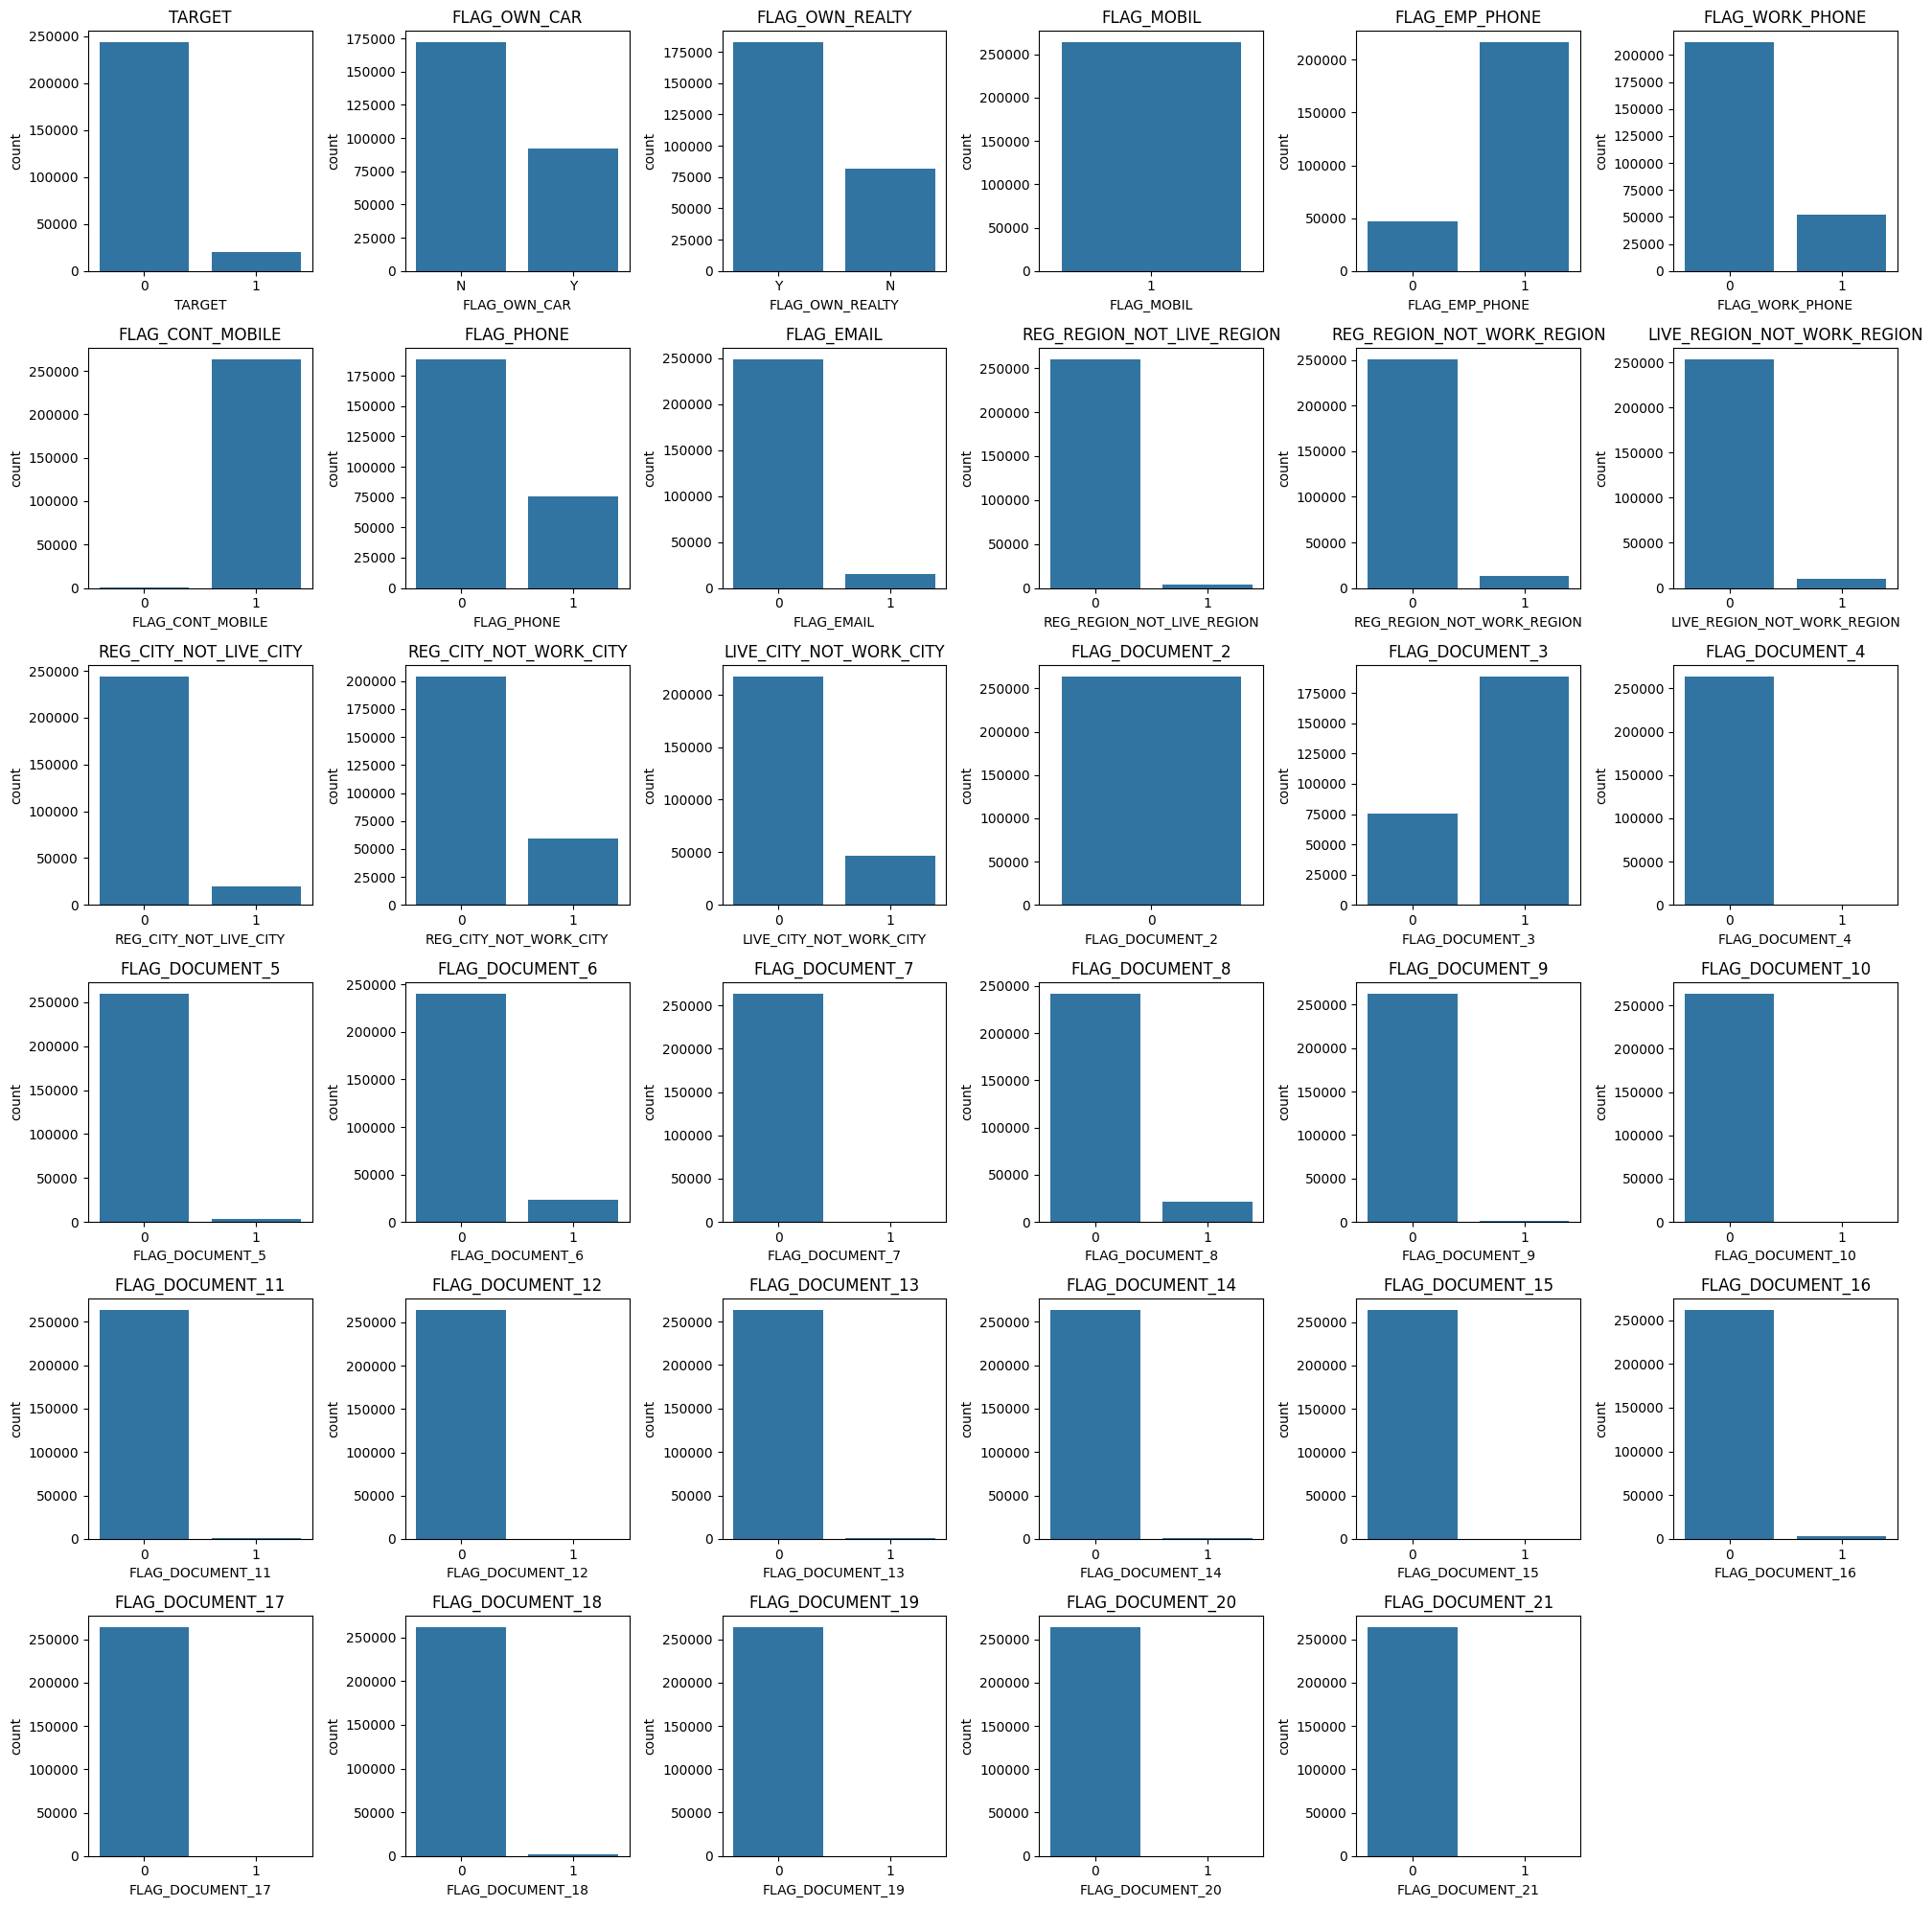

In [48]:
# Lista das variáveis binárias
binary_vars = ['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

# Filtrar o DataFrame para incluir apenas as variáveis binárias
df_binary = application_train1[binary_vars]

# Plotar gráficos de barras para cada variável binária
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_binary.columns):
    plt.subplot(6, 6, i + 1)
    sns.countplot(x=col, data=df_binary)
    plt.title(col)
    plt.xticks()

plt.tight_layout()
plt.show()
# Variaveis 'FLAG_OWN_CAR' e 'FLAG_OWN_REALTY' são binárias, porém, estão em formato string, vamos alterar seua valores

Analise Gráfico

- Essas variáveis fornecem informações detalhadas sobre os contatos, documentos e localização dos clientes.
- Elas são úteis para a avaliação de risco de crédito e a verificação de consistência de dados.
- As variáveis de contato (como telefone e e-mail) ajudam a garantir que o cliente pode ser facilmente alcançado.
- As variáveis de região e cidade fornecem insights sobre a mobilidade do cliente e possíveis discrepâncias entre onde ele vive,
- trabalha e está registrado, o que pode ser um indicador de risco.
- As flags de documentos indicam a completude da documentação fornecida pelo cliente, crucial para a verificação de identidade e a avaliação da confiabilidade.
- Todas as variaveis possuem apenas dois valores, zero e um, isso mostra que são variaveis binárias e não possuem valores atípicos, o que é um bom sinal.
- Como se trata de informações detalhadas sobre os contatos, documentos e localização dos clientes os registros mostram se sim (1), cliente informou a respeito dos dados pedidos e não (0), clientes não compartilharam dessas informações.

In [49]:
# Transformando variaveis 'FLAG_OWN_CAR' e 'FLAG_OWN_REALTY' em valores binários
# Mapear valores para binário
binary_mapping = {'Y': 1, 'N': 0}

application_train1['FLAG_OWN_CAR'] = application_train1['FLAG_OWN_CAR'].map(binary_mapping)
application_train1['FLAG_OWN_REALTY'] = application_train1['FLAG_OWN_REALTY'].map(binary_mapping)

In [50]:
# Agora temos valores inteiros distribuidos entre zero e um
print(application_train1[['FLAG_OWN_CAR']].value_counts())
print(application_train1[['FLAG_OWN_REALTY']].value_counts())

FLAG_OWN_CAR
0               172030
1                91821
Name: count, dtype: int64
FLAG_OWN_REALTY
1                  182511
0                   81340
Name: count, dtype: int64


### OUTLIERS (Non Binarys Vars)

In [51]:
# Identificar variáveis não-binárias
non_binary_vars = [col for col in application_train1.columns if col not in binary_vars]

# Filtrar o DataFrame para incluir apenas as variáveis não-binárias
df_non_binary = application_train1[non_binary_vars]

# Identificar variáveis numéricas
numeric_vars = df_non_binary.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Imprimir as variáveis numéricas
print(f'Variáveis numéricas e não binárias:\n{numeric_vars}')

Variáveis numéricas e não binárias:
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN']


#### OUTLIERS ('AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE')

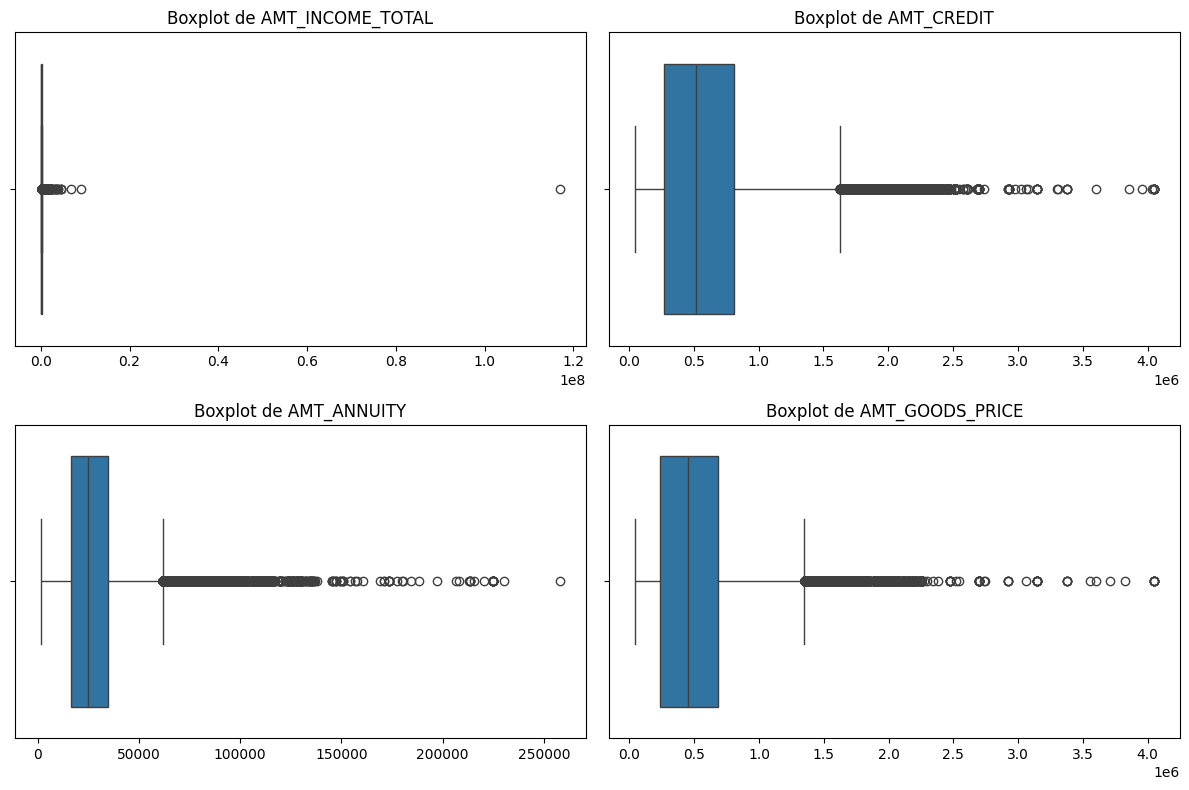

In [52]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train1[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

`Análise de Boxplots de Variáveis Financeiras`

Os boxplots apresentados fornecem uma visão geral da distribuição das seguintes variáveis financeiras:

- **AMT_INCOME_TOTAL**: A maioria dos dados de renda total está concentrada em valores baixos, com alguns outliers significativos indicando rendas excepcionalmente altas.
- **AMT_CREDIT**: A distribuição dos valores de crédito é relativamente equilibrada, mas há muitos outliers no lado superior, representando valores de crédito muito altos.
- **AMT_ANNUITY**: A maioria dos valores de anuidade está concentrada na parte inferior, com uma quantidade significativa de outliers indicando anuidades altas.
- **AMT_GOODS_PRICE**: Os preços dos bens seguem uma distribuição semelhante ao crédito, com muitos outliers acima do limite superior.

Conclusão

Os gráficos de boxplot mostram que há uma concentração significativa de dados em valores mais baixos para as variáveis analisadas, exceto para AMT_CREDIT e AMT_GOODS_PRICE, que apresentam uma distribuição mais equilibrada. No entanto, todas as variáveis possuem outliers significativos que podem impactar análises estatísticas subsequentes.

Perguntas:

- Qual é o limite de renda que um cliente pode ter?
- Qual é o valor máximo que um banco libera de credito, existe um?
- Se um cliente faz um emprestimo, qual o valor que ele pode pagar por periodo?

In [53]:
# Criando um novo dataframe para não alterar o original
application_train2 = application_train1.copy()

In [54]:
# Ambas as variáveis mostram uma distribuição que tem um desvio padrão significativo em relação à média
# Indica uma variabilidade considerável nos dados. 
print(application_train1[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe())

       AMT_INCOME_TOTAL    AMT_CREDIT
count      2.638510e+05  2.638510e+05
mean       1.711301e+05  6.066253e+05
std        2.490615e+05  4.043298e+05
min        2.610000e+04  4.500000e+04
25%        1.125000e+05  2.725785e+05
50%        1.575000e+05  5.212800e+05
75%        2.025000e+05  8.140410e+05
max        1.170000e+08  4.050000e+06


##### Método do IQR

In [55]:
# Função para remover outliers usando o método do IQR
def remove_outliers_iqr(application_train2, column):
    Q1 = application_train2[column].quantile(0.25)
    Q3 = application_train2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return application_train2[(application_train2[column] >= lower_bound) & (application_train2[column] <= upper_bound)]

# Aplicar a função a cada coluna e reatribuir ao dataframe original
for column in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    application_train2 = remove_outliers_iqr(application_train2, column)


In [56]:
# Calcular o número de linhas antes e depois de remover outliers
num_rows_original = application_train1.shape[0]
num_rows_after = application_train2.shape[0]

# Calcular a diferença e a porcentagem de valores excluídos
num_removed = num_rows_original - num_rows_after
percentage_removed = (num_removed / num_rows_original) * 100

# Imprimir os resultados
print(f"Número de linhas removidas: {num_removed}")
print(f"Porcentagem de valores excluídos: {percentage_removed:.2f}%")


Número de linhas removidas: 25847
Porcentagem de valores excluídos: 9.80%


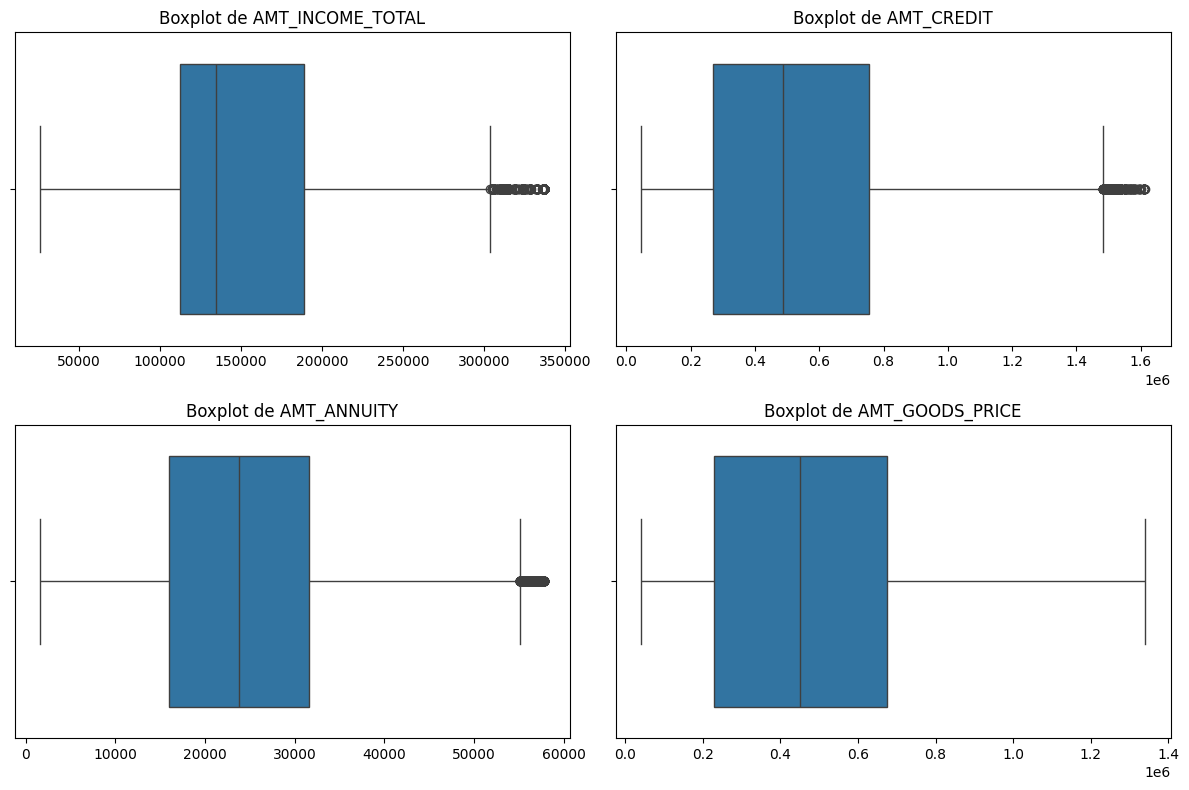

In [57]:
# Com a exclusão dos registros observamos que ainda possuímos outliears
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train2[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

##### Método Z_SCORE

In [58]:
# Copiando outro dataframe para não alterar o original
application_train3 = application_train1.copy()

In [59]:
# Definir uma função para remover outliers usando Z-Score
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    return df[(z_scores < threshold) & (z_scores > -threshold)]

# Aplicar a função a cada coluna
for column in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    application_train3 = remove_outliers_zscore(application_train3, column)

# Verificar o formato do dataframe após remover os outliers
print(application_train3.shape)


(255735, 71)


In [60]:
# Calcular o número de linhas antes e depois de remover outliers
num_rows_original = application_train1.shape[0]
num_rows_after = application_train3.shape[0]

# Calcular a diferença e a porcentagem de valores excluídos
num_removed = num_rows_original - num_rows_after
percentage_removed = (num_removed / num_rows_original) * 100

# Imprimir os resultados
print(f"Número de linhas removidas: {num_removed}")
print(f"Porcentagem de valores excluídos: {percentage_removed:.2f}%")

Número de linhas removidas: 8116
Porcentagem de valores excluídos: 3.08%


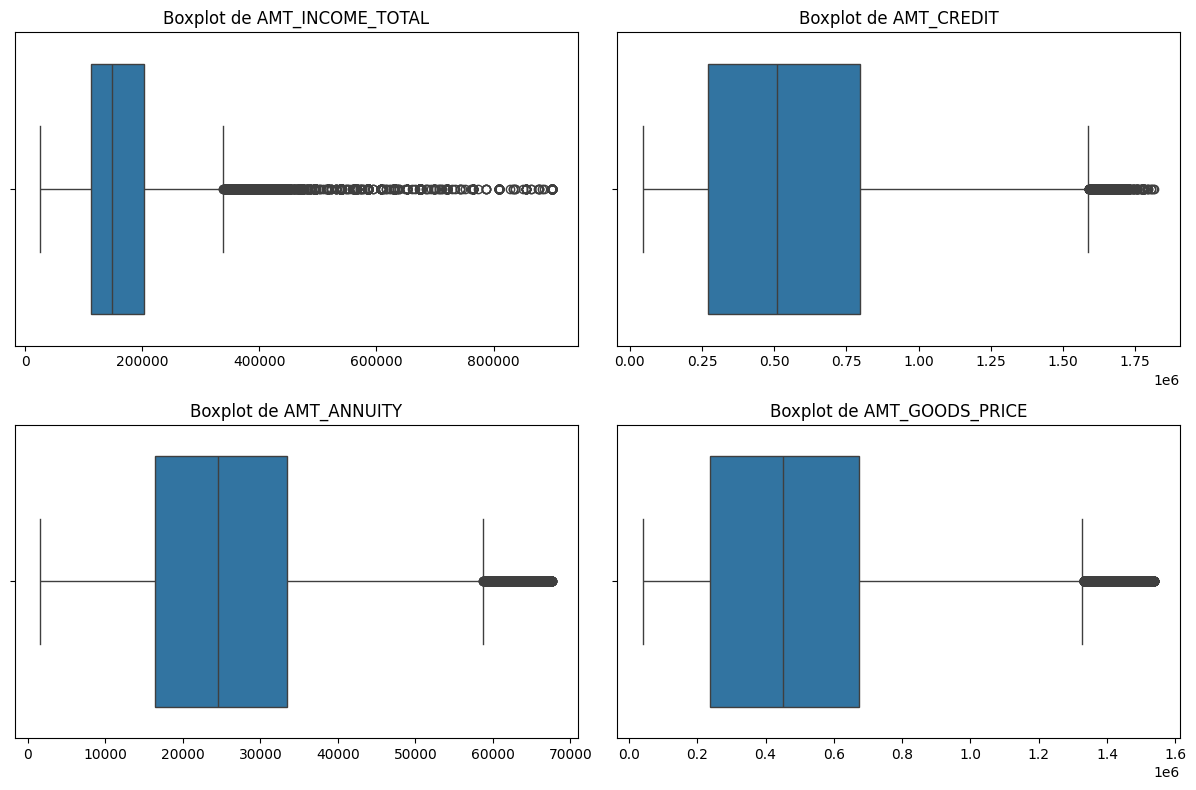

In [61]:
# Com a exclusão dos registros observamos que ainda possuímos outliears
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train3[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

##### Método Percentile (Truncamento)

In [62]:
# Criando um novo dataframe para não alterar o original
application_train4 = application_train1.copy()

In [63]:
application_train4.shape

(263851, 71)

In [64]:
# Função para truncar outliers
def truncate_outliers(df, column, lower_percentile=0.02, upper_percentile=0.98):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Aplicar a função a cada coluna
for column in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    application_train4 = truncate_outliers(application_train4, column)


In [65]:
# Calcular o número de linhas antes e depois de remover outliers
num_rows_original = application_train1.shape[0]
num_rows_after = application_train4.shape[0]

# Calcular a diferença e a porcentagem de valores excluídos
num_removed = num_rows_original - num_rows_after
percentage_removed = (num_removed / num_rows_original) * 100

# Imprimir os resultados
print(f"Número de linhas removidas: {num_removed}")
print(f"Porcentagem de valores excluídos: {percentage_removed:.2f}%")

Número de linhas removidas: 0
Porcentagem de valores excluídos: 0.00%


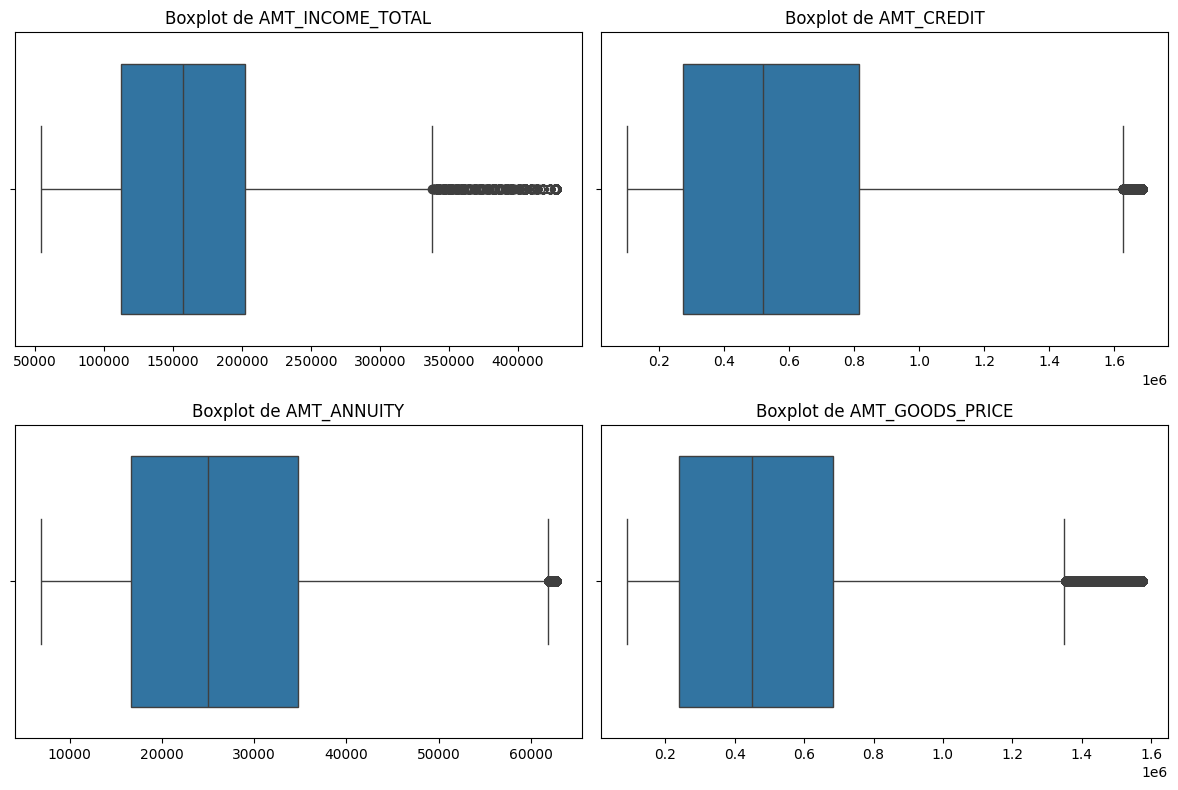

In [66]:
# Com a exclusão dos registros observamos que ainda possuímos outliears
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

Escolha método para eliminar outliears

- Método IQR e Z_score eliminou alguns registros e não eliminou os outliears completamente.
- O método Percentile não excluiu nenhum registro e eliminou praticamente todos os outliears ajustando os valores extremos.
- Os valores mínimos foram mantidos e valores máximos foram alterados, como a renda dos clientes, o limite de empréstimo, as parcelas dos empréstimos e o valor do bem adquirido precisam ter limites quando se trata de linha de crédito.  

In [67]:
# Obtendo dados descritivos após a remoção dos outliears
print(application_train4[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe())

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count     263851.000000  2.638510e+05  263851.000000     2.638510e+05
mean      167876.426449  6.017422e+05   26950.878879     5.405640e+05
std        81052.583937  3.852645e+05   13249.256303     3.533992e+05
min        54000.000000  1.018800e+05    6858.000000     9.000000e+04
25%       112500.000000  2.725785e+05   16677.000000     2.385000e+05
50%       157500.000000  5.212800e+05   25029.000000     4.500000e+05
75%       202500.000000  8.140410e+05   34767.000000     6.840000e+05
max       427500.000000  1.687266e+06   62698.500000     1.575000e+06


Conclusão

Após realizar a remoção dos outliers utilizando o truncamento dos dados, a renda (`AMT_INCOME_TOTAL`), crédito concedido (`AMT_CREDIT`), anuidade (`AMT_ANNUITY`) e preço dos bens (`AMT_GOODS_PRICE`) foram ajustados para valores mais razoáveis e consistentes. As estatísticas descritivas, como média e desvio padrão, refletem melhor a distribuição dos dados após o processo de limpeza.

#### OUTLIERS ('DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH')

In [68]:
# YEARS_BIRTH (Idade)
# YEARS_EMPLOYED (Tempo de emprego)
# YEARS_REGISTRATION (Tempo de registro no banco)
# YEARS_ID_PUBLISH (Tempo desde a publicação do documento)

In [69]:

# Tirando os valores da coluna tempo de emprego que possui registros extremos, as variaveis estão com valores negativos e sem discrepância
print(application_train4[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe())

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  263851.000000  263851.000000      263851.000000    263851.000000
mean   -16120.451486   63578.855354       -4989.770143     -3048.920190
std      4307.480271  141150.954757        3523.020561      1490.562686
min    -25201.000000  -17912.000000      -24672.000000     -7197.000000
25%    -19716.000000   -2847.000000       -7479.000000     -4319.000000
50%    -15817.000000   -1264.000000       -4517.000000     -3335.000000
75%    -12575.000000    -302.000000       -2007.000000     -1814.000000
max     -7489.000000  365243.000000           0.000000         0.000000


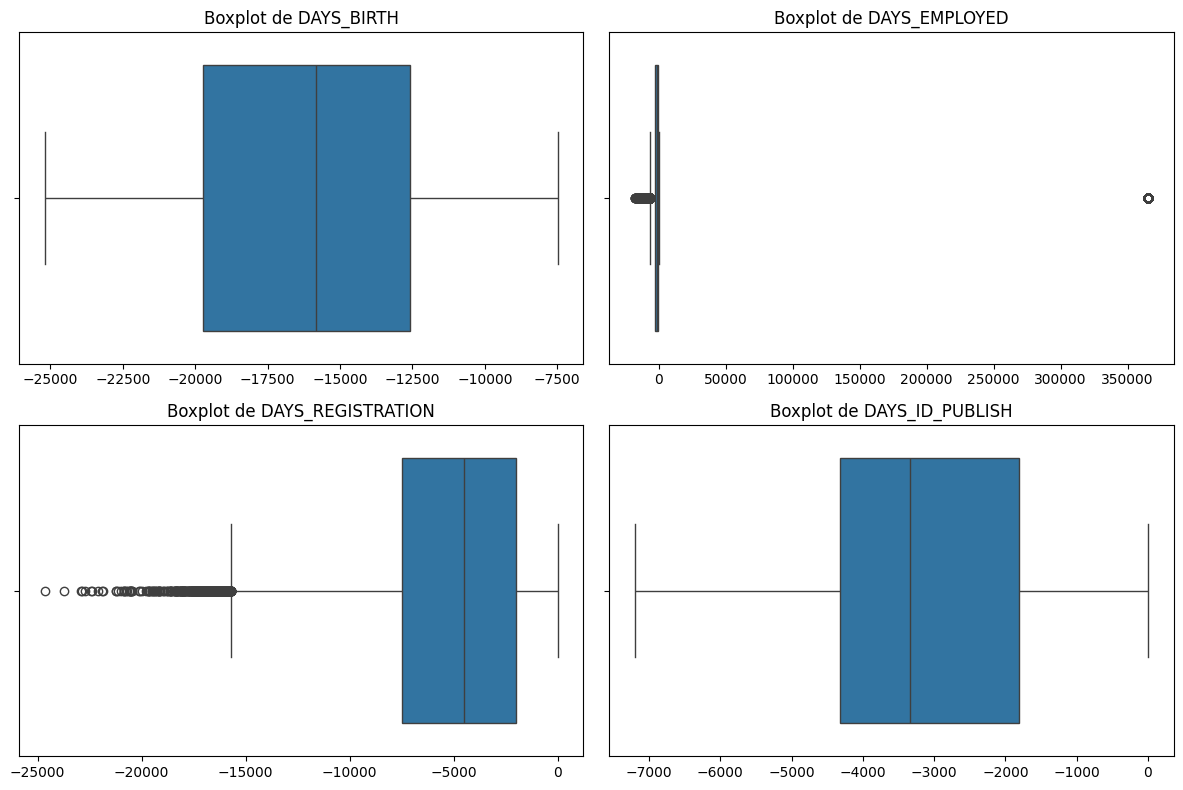

In [70]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

In [71]:
# Vamos transformar essas variaveis em anos ao invés de dias
# Listando as variáveis que devem ser convertidas para anos
cols_to_convert = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

# Convertendo os valores de dias para anos (dividindo por -365)
application_train4[cols_to_convert] = application_train4[cols_to_convert] / -365

# Arredondando para o valor inteiro mais próximo
application_train4[cols_to_convert] = application_train4[cols_to_convert].astype(int)

# Renomeando as colunas para anos
application_train4 = application_train4.rename(columns={
    'DAYS_BIRTH': 'YEARS_BIRTH',
    'DAYS_REGISTRATION': 'YEARS_REGISTRATION',
    'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH'
})

In [72]:
# Os valores estão representando anos e estão em int
print(application_train4[['YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']].describe())

         YEARS_BIRTH  YEARS_REGISTRATION  YEARS_ID_PUBLISH
count  263851.000000       263851.000000     263851.000000
mean       43.664212           13.178514          7.862320
std        11.800609            9.647635          4.084495
min        20.000000            0.000000          0.000000
25%        34.000000            5.000000          4.000000
50%        43.000000           12.000000          9.000000
75%        54.000000           20.000000         11.000000
max        69.000000           67.000000         19.000000


Os dados transformados em anos proporcionam uma visão clara das características temporais dos clientes do banco. A média de idade dos clientes é aproximadamente 44 anos, com um tempo médio de registro de cerca de 13 anos e um tempo médio desde a publicação de documentos de aproximadamente 8 anos. A distribuição dos dados mostra uma variação significativa em todas as variáveis, indicando uma diversidade na idade, tempo de registro e tempo desde a publicação de documentos entre os clientes.

In [73]:
application_train4.shape

(263851, 71)

In [74]:
# Observamos que os valores no tempo de emprego (DAYS_EMPLOYED) não estão normalizados
# Temos registros negativos e positivos, além de um valor discrepante
# Esse valor (365243) discrepante é erro de digitação?
application_train4['DAYS_EMPLOYED'].value_counts().head(10)

DAYS_EMPLOYED
 365243    47382
-199         137
-200         136
-230         127
-224         126
-212         125
-229         125
-215         119
-188         118
-193         117
Name: count, dtype: int64

- O número 365243 é frequentemente encontrado em conjuntos de dados relacionados a informações de tempo em sistemas bancários, especificamente como o valor padrão para representar dados ausentes ou indefinidos em campos que registram datas como números inteiros (como dias corridos). Esse valor específico é utilizado em muitos sistemas devido ao seu significado conveniente:

- DAYS_BIRTH (Data de Nascimento): O valor 365243 dias corresponde a aproximadamente 1000 anos. Assim, é comum encontrá-lo como um marcador para registros de clientes onde a data de nascimento não está disponível ou foi codificada de forma a preservar a privacidade.

- DAYS_EMPLOYED (Dias de Emprego): Da mesma forma, 365243 dias representa cerca de 1000 anos, indicando períodos onde a informação sobre o tempo de emprego não está disponível ou pode ser codificada de maneira similar.

Esse valor não deve ser interpretado literalmente como anos reais ou datas válidas, mas sim como um marcador específico para indicar certas condições nos dados, como ausência de informações ou proteção de dados sensíveis.

In [75]:
# Calcular a porcentagem
total_registros = len(application_train4)  # Total de registros no dataframe
total_365243 = len(application_train4[application_train4['DAYS_EMPLOYED'] == 365243])  # Quantidade de registros com valor 365243

# Calcular a porcentagem
porcentagem = (total_365243 / total_registros) * 100

print(f"Porcentagem de valores 365243 em DAYS_EMPLOYED: {porcentagem:.2f}%")

Porcentagem de valores 365243 em DAYS_EMPLOYED: 17.96%


In [76]:
# Quase 18% dos registros da variavel tempo de emprego são dados ausentes ou que o cliente não quis informar
# Não posso supor valores ao tempo de emprego que o cliente tem se ele não quis informar
# Faltaria transparência da minha parte e poderia prejudicar o modelo por ele nãos saber lidar com esses dados reais
# Portanto, acho correto excluir essa variavel e obter outra forma de identificar inadimplência

# Remover a coluna 'DAYS_EMPLOYED'
application_train4 = application_train4.drop('DAYS_EMPLOYED', axis=1)

# Verificar o dataframe após a remoção
application_train4.shape

(263851, 70)

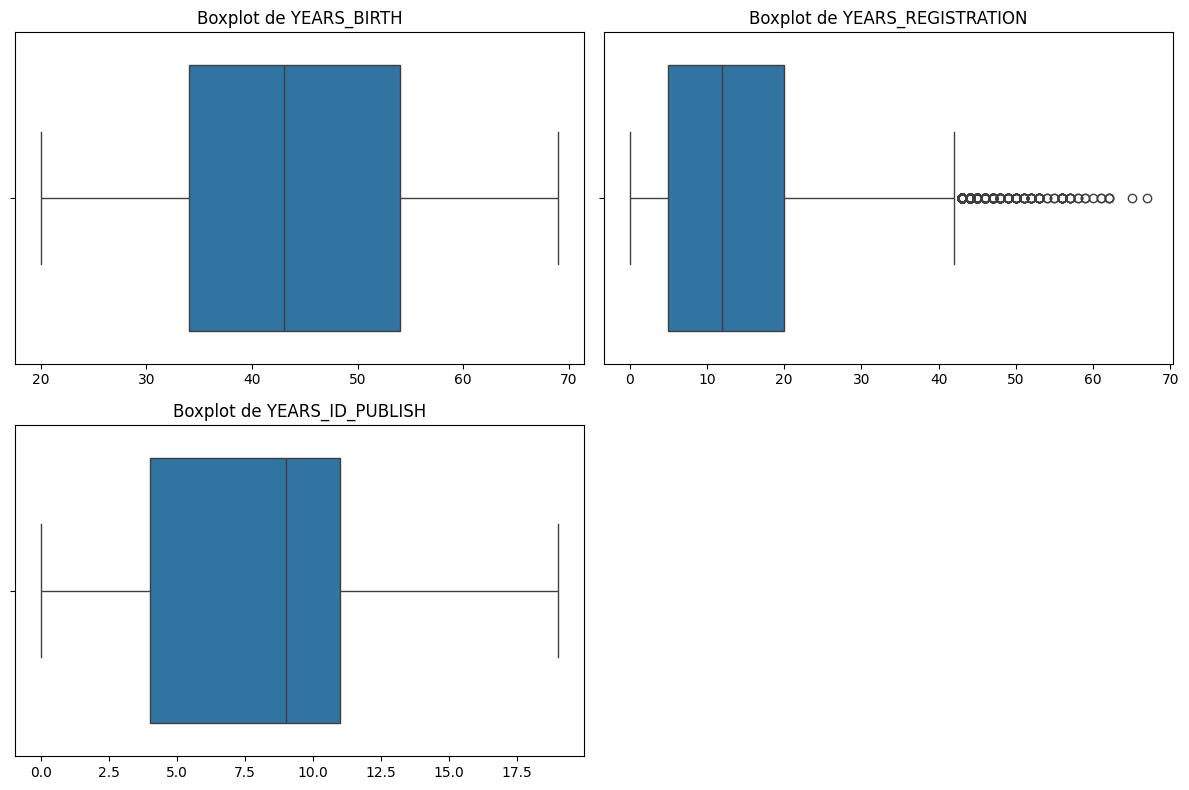

In [77]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

In [78]:
# Cliente com 69 anos de tempo de registro no banco, discrepante
application_train4['YEARS_REGISTRATION'].describe()

count    263851.000000
mean         13.178514
std           9.647635
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64

In [79]:
# 14 Mil clientes não possuem um ano de registro no banco
application_train4['YEARS_REGISTRATION'].value_counts()

YEARS_REGISTRATION
0     14380
1     13304
2     12935
3     11256
12    11073
      ...  
55        2
54        2
60        1
65        1
67        1
Name: count, Length: 65, dtype: int64

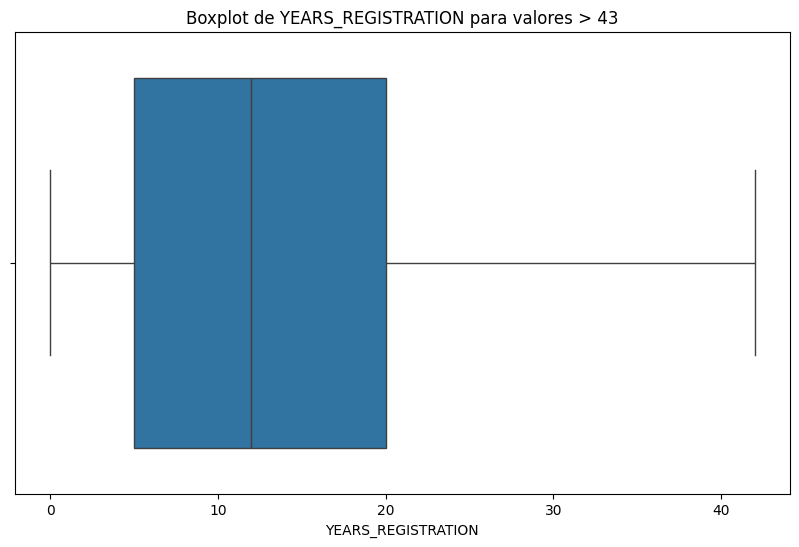

In [80]:
# O filtro mostra que até 43 anos não existe outliears
# Existe clientes tão fiéis aos seus bancos?
# Normalmente para obter maiores empréstimos, bancos confiam em clientes que já possuem histórico 
# Filtro para selecionar registros
filtered_data = application_train4[application_train4['YEARS_REGISTRATION'] < 43]

# Plotar o gráfico usando Seaborn para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='YEARS_REGISTRATION', data=filtered_data)
plt.title('Boxplot de YEARS_REGISTRATION para valores > 43')
plt.show()

In [81]:
# Como vimos no gráfico. valores acima de 43 anos são outliears
# Vamos ver quantos clientes possuem registros acima de 43 anos
application_train4[application_train4['YEARS_REGISTRATION'] > 43].shape

(390, 70)

In [82]:
# Não chega a meio porcento
# Calcular o número de registros onde YEARS_REGISTRATION > 43
filtro = application_train4[application_train4['YEARS_REGISTRATION'] > 43]
numero_registros = len(filtro)

# Calcular a porcentagem
total_registros = len(application_train4)
porcentagem = (numero_registros / total_registros) * 100

print(f"Porcentagem de registros onde YEARS_REGISTRATION > 43: {porcentagem:.2f}%")

Porcentagem de registros onde YEARS_REGISTRATION > 43: 0.15%


In [83]:
# Excluindo esses registros 
application_train4 = application_train4[application_train4['YEARS_REGISTRATION'] < 43]

application_train4.shape

(263288, 70)

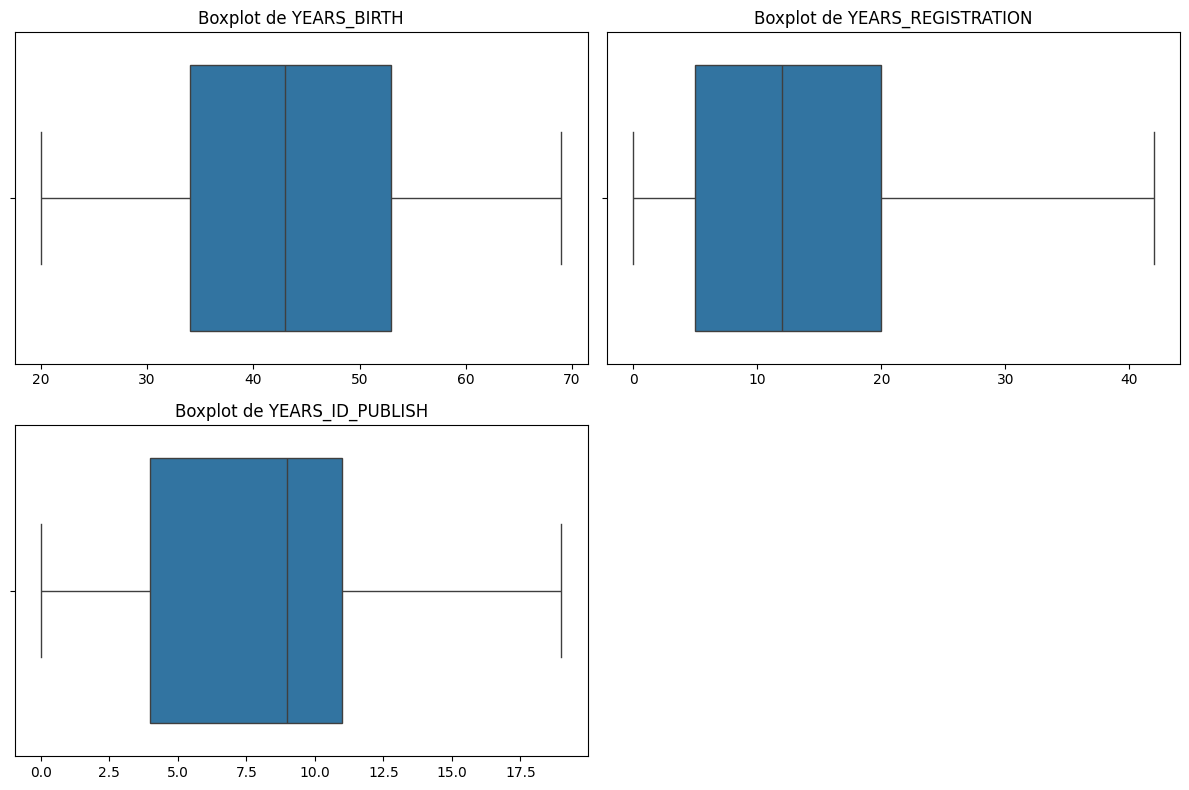

In [84]:
# Dados normalizados sem outliears
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

#### OUTLIERS ('CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')

In [85]:
# CNT_FAM_MEMBERS: Número de membros da família.
# REGION_RATING_CLIENT: Classificação da região do cliente.
# REGION_RATING_CLIENT_W_CITY: Classificação da região do cliente em relação à cidade.

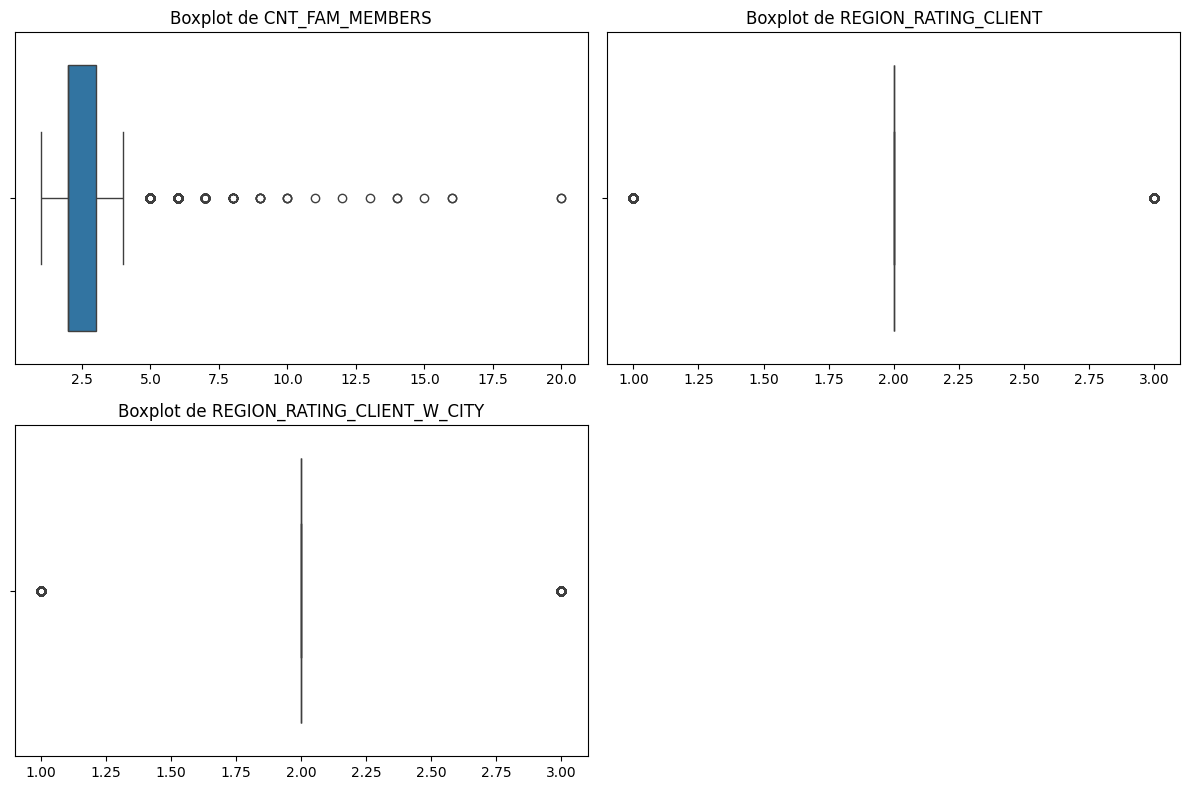

In [86]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

In [87]:
print(application_train4[['CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].describe())

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY
count    263288.000000         263288.000000                263288.000000
mean          2.165218              2.054606                     2.033777
std           0.911228              0.504914                     0.498893
min           1.000000              1.000000                     1.000000
25%           2.000000              2.000000                     2.000000
50%           2.000000              2.000000                     2.000000
75%           3.000000              2.000000                     2.000000
max          20.000000              3.000000                     3.000000


- CNT_FAM_MEMBERS: A média de membros por família é aproximadamente 2.17, com uma variação considerável (desvio padrão de 0.91). A maioria das famílias (50% - 75%) tem entre 2 e 3 membros, refletindo uma distribuição típica de tamanho familiar, embora haja famílias com até 20 membros.

- REGION_RATING_CLIENT: A média de classificação da região do cliente é de cerca de 2.05, com uma variação moderada (desvio padrão de 0 .50). A maioria das regiões dos clientes (50% - 75%) é classificada como 2, indicando uma distribuição centralizada em torno deste valor.

- REGION_RATING_CLIENT_W_CITY: A média de classificação da região do cliente em relação à cidade é de aproximadamente 2.03, com uma variação semelhante (desvio padrão de 0.50). A distribuição das classificações segue um padrão semelhante à REGION_RATING_CLIENT, com a maioria das regiões sendo classificadas como 2.

In [88]:
application_train4[application_train4['CNT_FAM_MEMBERS'] > 5].shape

(444, 70)

In [89]:
application_train4[application_train4['CNT_FAM_MEMBERS'] > 6]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
3079        103596       0         Cash loans           M             0   
3448        104024       0         Cash loans           F             0   
7204        108386       0         Cash loans           M             0   
8254        109622       0         Cash loans           M             1   
9712        111302       1         Cash loans           F             0   
...            ...     ...                ...         ...           ...   
290166      436157       0         Cash loans           F             0   
291909      438174       0         Cash loans           M             0   
296798      443862       1         Cash loans           F             0   
300538      448179       1         Cash loans           F             0   
305112      453499       0         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3079                  1             7           85500.0    411813.0   
3448                  1             5          135000.0    579195.0   
7204                  0             6          157500.0    566055.0   
8254                  0             5          270000.0    840951.0   
9712                  1             5          162000.0    704844.0   
...                 ...           ...               ...         ...   
290166                1             5          157500.0    432567.0   
291909                1             5          202500.0   1317357.0   
296798                1             5          198000.0    227520.0   
300538                1             5           54000.0    351000.0   
305112                0             7          112500.0    143910.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
3079        17577.0  ...                 0                0                0   
3448        24669.0  ...                 0                0                0   
7204        16551.0  ...                 0                0                0   
8254        35761.5  ...                 0                0                0   
9712        34038.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
290166      22216.5  ...                 0                0                0   
291909      52375.5  ...                 0                0                0   
296798      15201.0  ...                 0                0                0   
300538      17199.0  ...                 0                0                0   
305112      15399.0  ...                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
3079                          0.0                       0.0   
3448                          0.0                       0.0   
7204                          0.0                       0.0   
8254                          0.0                       0.0   
9712                          0.0                       0.0   
...                           ...                       ...   
290166                        0.0                       0.0   
291909                        0.0                       0.0   
296798                        0.0                       0.0   
300538                        0.0                       0.0   
305112                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
3079                          0.0                        1.0   
3448                          0.0                        0.0   
7204                          0.0                        0.0   
8254                          0.0                        0.0   
9712                          0.0                        0.0   
...                           ...                        ...   
290166                        0.0                        0.0   
291909                  

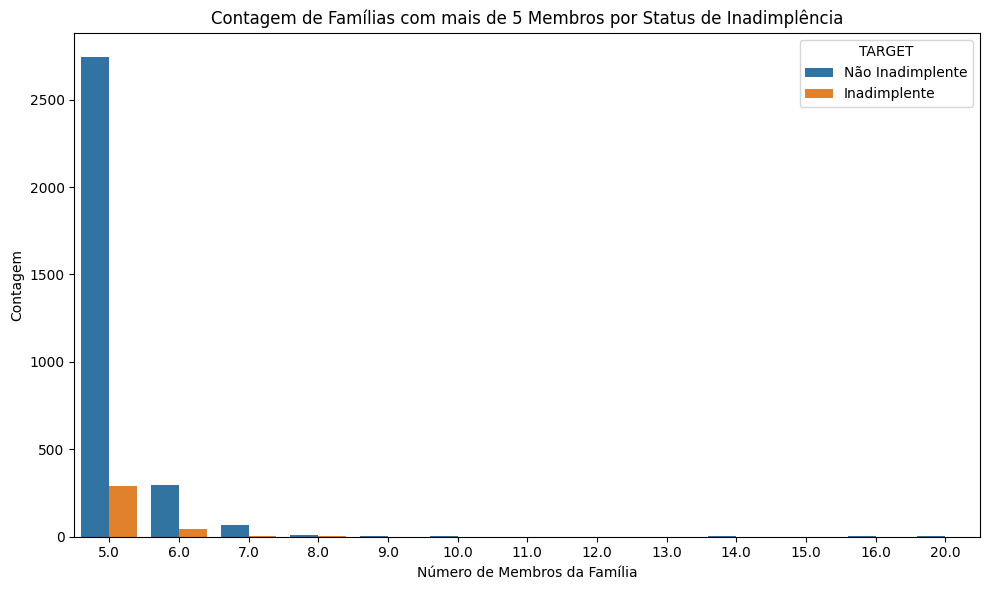

In [90]:
# Filtrar os dados onde CNT_FAM_MEMBERS > 6
filtered_data = application_train4[application_train4['CNT_FAM_MEMBERS'] >= 5]

# Plotar o gráfico usando Seaborn para comparar CNT_FAM_MEMBERS com a variável TARGET
plt.figure(figsize=(10, 6))
sns.countplot(x='CNT_FAM_MEMBERS', hue='TARGET', data=filtered_data)
plt.title('Contagem de Famílias com mais de 5 Membros por Status de Inadimplência')
plt.xlabel('Número de Membros da Família')
plt.ylabel('Contagem')
plt.legend(title='TARGET', labels=['Não Inadimplente', 'Inadimplente'])
plt.xticks()
plt.tight_layout()
plt.show()

- Inadimplência: A quantidade de famílias inadimplentes em comparação com não inadimplentes diminui conforme o número de membros da família aumenta. É importante questionar se há uma justificativa plausível para isso. Normalmente, esperaríamos que famílias maiores tivessem maior pressão financeira, possivelmente aumentando a inadimplência.
- Esses resultados corroboram para a discrepância desses dados

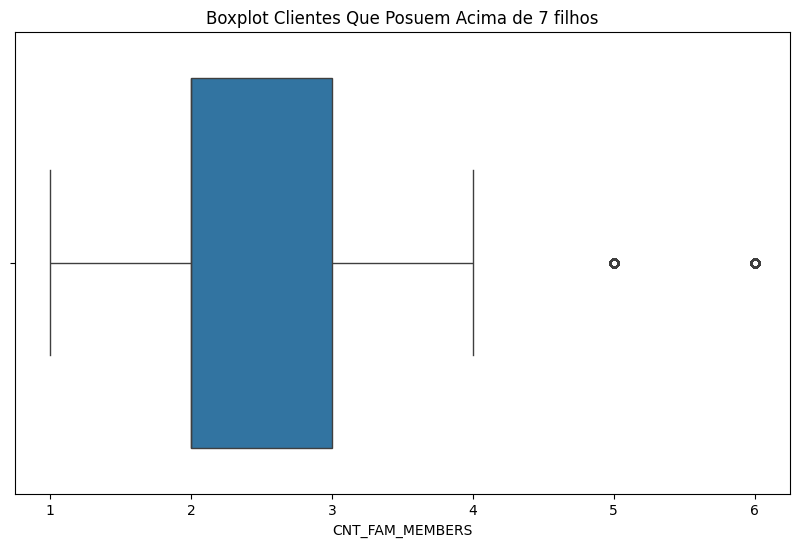

In [91]:
filtered_data = application_train4[application_train4['CNT_FAM_MEMBERS'] < 7]

# Plotar o gráfico usando Seaborn para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='CNT_FAM_MEMBERS', data=filtered_data)
plt.title('Boxplot Clientes Que Posuem Acima de 7 filhos')
plt.show()

In [92]:
# Vamos considerar famílias até com sete filhos 
# Vou excluir 34 registros 
application_train4[application_train4['CNT_FAM_MEMBERS'] > 7].shape

(34, 70)

In [93]:
# Não chega a meio porcento
# Calcular o número de registros 
filtro = application_train4[application_train4['CNT_FAM_MEMBERS'] > 7]
numero_registros = len(filtro)

# Calcular a porcentagem
total_registros = len(application_train4)
porcentagem = (numero_registros / total_registros) * 100

print(f"Porcentagem de registros onde famílias tem mais de sete filhos: {porcentagem:.2f}%")

Porcentagem de registros onde famílias tem mais de sete filhos: 0.01%


In [94]:
# Excluindo valores 
application_train4 = application_train4[application_train4['CNT_FAM_MEMBERS'] < 7]

# Verificando se valores foram excluidos
application_train4[application_train4['CNT_FAM_MEMBERS'] > 7].shape

(0, 70)

In [95]:
application_train4.shape

(263182, 70)

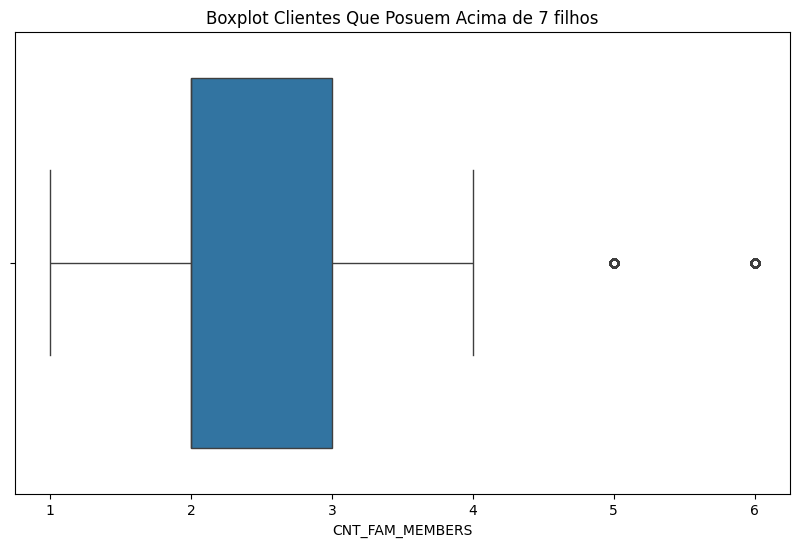

In [96]:
# Manterei esses outliears, no entanto, precisamos ver se esses valores não interferirão nos resultados futuramente
# Plotar o gráfico usando Seaborn para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='CNT_FAM_MEMBERS', data=application_train4)
plt.title('Boxplot Clientes Que Posuem Acima de 7 filhos')
plt.show()

#### OUTLIERS ('HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')

In [97]:
# 'HOUR_APPR_PROCESS_START': Hora de Início do Processamento do Pedido
# 'OBS_30_CNT_SOCIAL_CIRCLE': Contagem de Observações de Atrasos de Pagamento (30 dias) no Círculo Social
# 'DEF_30_CNT_SOCIAL_CIRCLE': Contagem de Atrasos de Pagamento (30 dias) em Incumprimento no Círculo Social
# 'OBS_60_CNT_SOCIAL_CIRCLE': Contagem de Observações de Atrasos de Pagamento (60 dias) no Círculo Social
# 'DEF_60_CNT_SOCIAL_CIRCLE': Contagem de Atrasos de Pagamento (60 dias) em Incumprimento no Círculo Social

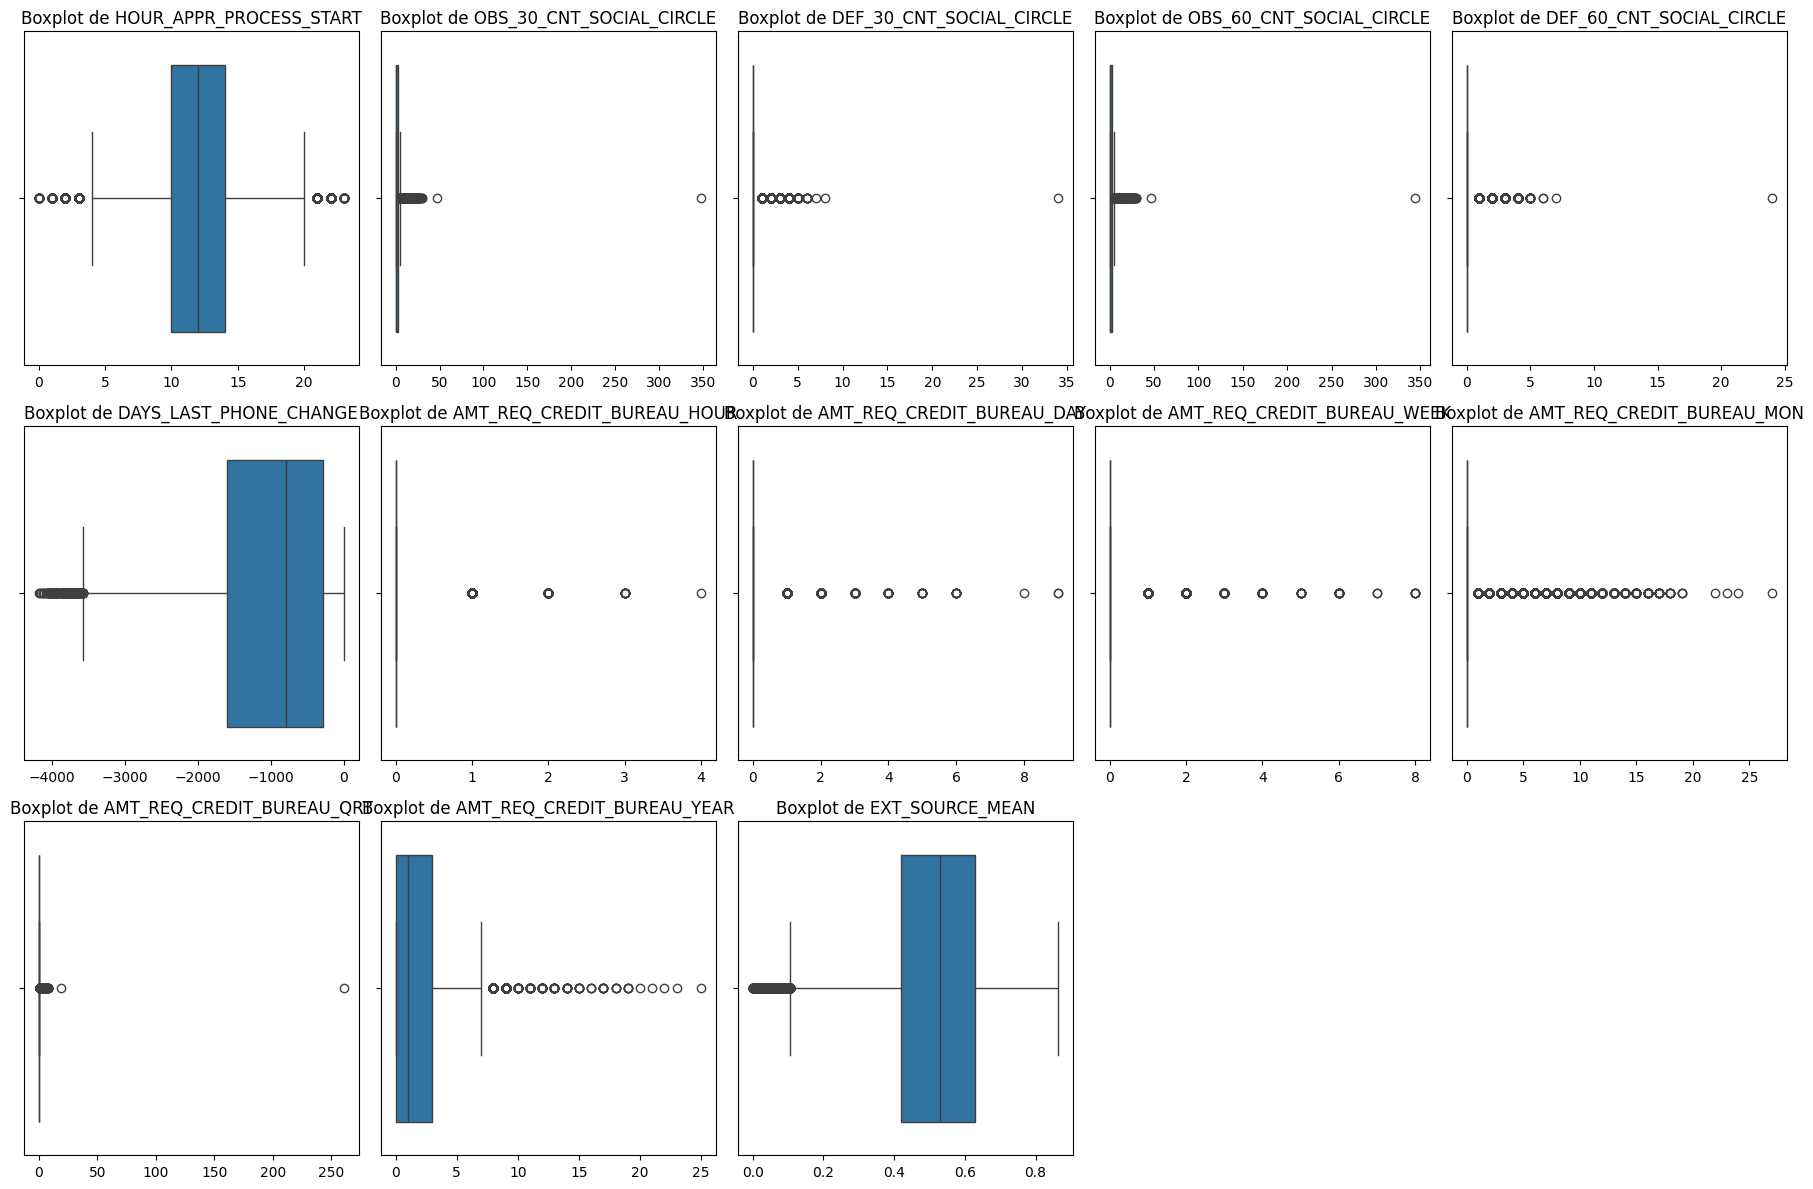

In [98]:
# Vamos ver se o restante das variaveis possuem outliers
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN']

# Configurações gerais para o gráfico
plt.figure(figsize=(18, 12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5) 

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 5, i + 1)  
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks() 

plt.tight_layout()
plt.show()
# Todas as variaveis restantes possuem outliers

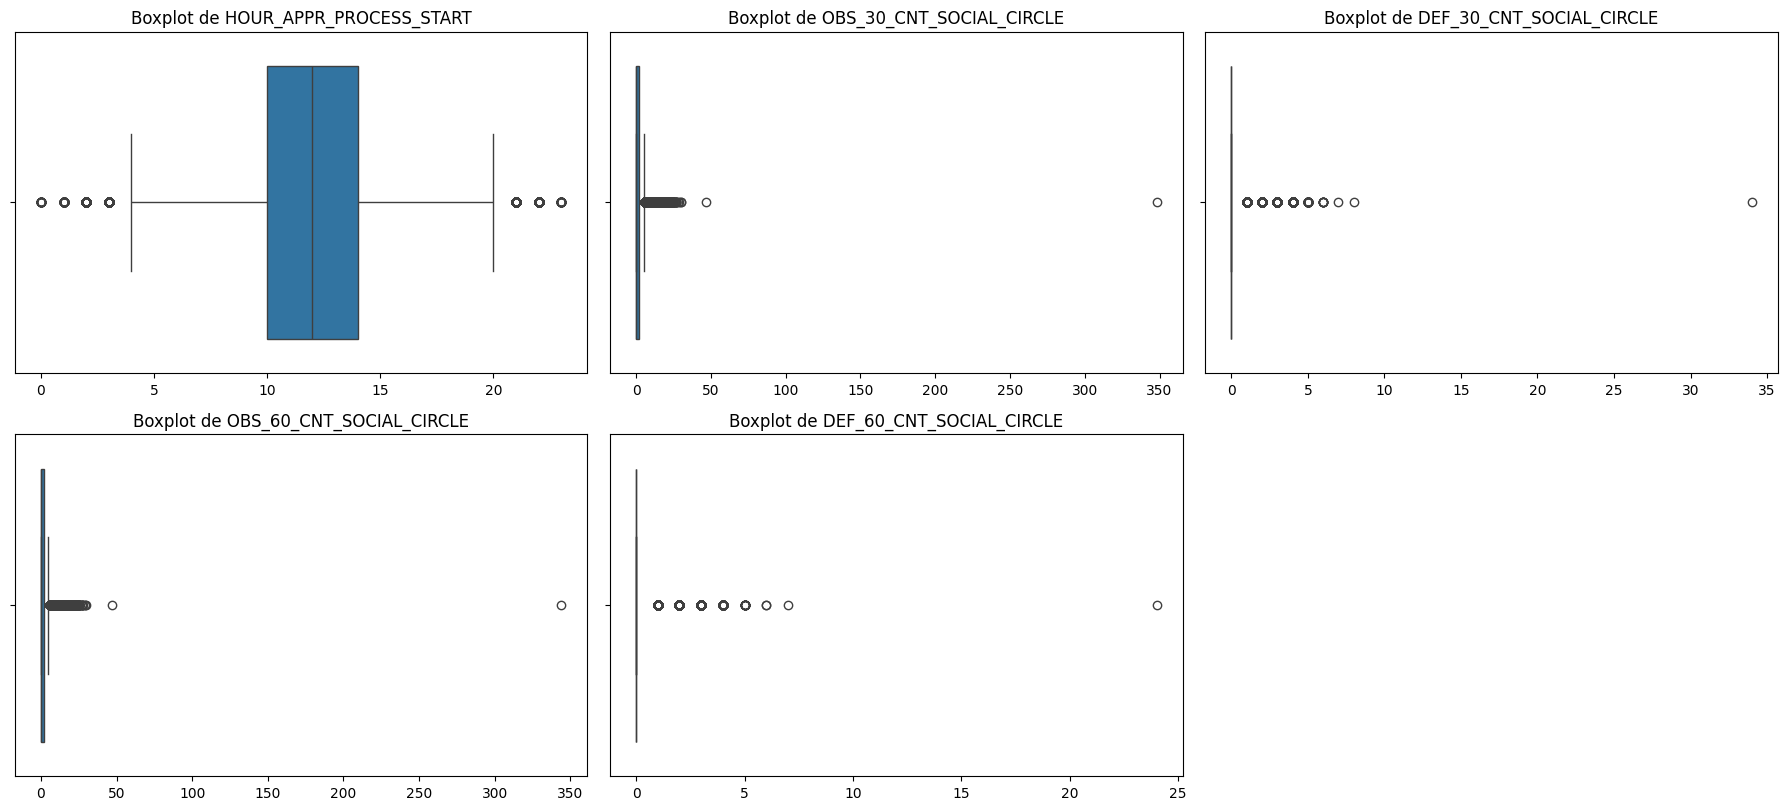

In [99]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Configurações gerais para o gráfico
plt.figure(figsize=(18, 12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks() 

plt.tight_layout()

In [100]:
# Valores abaixo de zero são outliears, sabendo que o dia possui 24 horas
application_train4['HOUR_APPR_PROCESS_START'].describe()

count    263182.000000
mean         12.081187
std           3.254745
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [101]:
# Podemos observar que o horário que os clientes mais requisitam emprestimos é as 10 horas
# Não posso mexer em todos os registros que causam outliears nessas variaveis por não saber de qual maneira o cliente fez o emprestimo
# Porém, posso excluir ou substituir os registros zeros, pois são valores discrepantes
application_train4['HOUR_APPR_PROCESS_START'].value_counts()

HOUR_APPR_PROCESS_START
10    32196
11    31918
12    29373
13    26704
14    23857
9     23494
15    21222
16    17527
8     12855
17    12803
18     7750
7      7703
6      4849
19     3288
5      2976
4      1720
20     1036
3      1032
21      345
2       253
22      134
1        78
23       36
0        33
Name: count, dtype: int64

In [102]:
# Substituir todos os valores 0 por 10
application_train4.loc[application_train4['HOUR_APPR_PROCESS_START'] == 0, 'HOUR_APPR_PROCESS_START'] = 10

# Verificando valores zeros após a substituição
print(application_train4[application_train4['HOUR_APPR_PROCESS_START'] == 0].shape)

(0, 70)


In [103]:
application_train4.shape

(263182, 70)

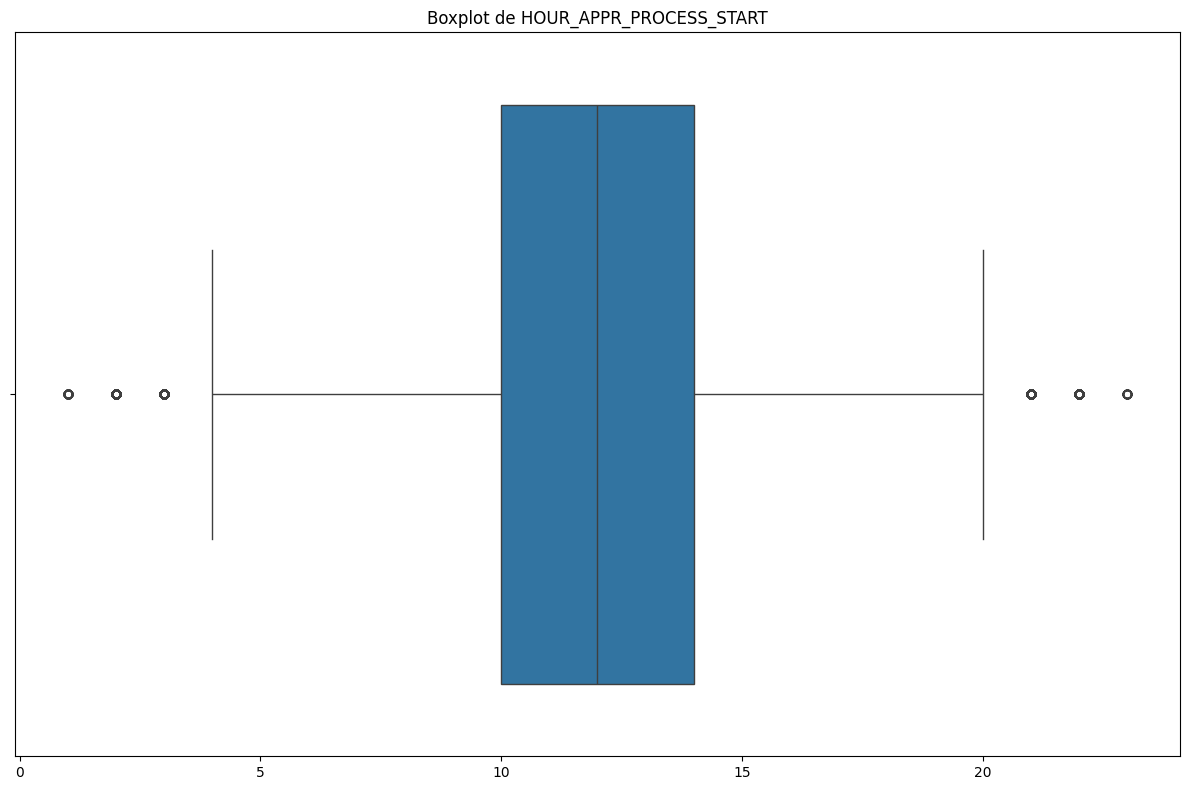

In [104]:
# Elimando valores zeros continuamos com os outliears, porem, vou mante-los por se tratar de horas
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['HOUR_APPR_PROCESS_START']

# Configurações gerais para o gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(1, 1, i + 1)
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks()

plt.tight_layout()
plt.show()

In [105]:
# Vamos fazer uma média das variaveis 
# Criar uma nova coluna que é a média das variáveis OBS e DEF para 30 e 60 dias
application_train4['SOCIAL_CIRCLE_MEAN'] = ((application_train4['OBS_30_CNT_SOCIAL_CIRCLE'] +
                                             application_train4['DEF_30_CNT_SOCIAL_CIRCLE'] +
                                             application_train4['OBS_60_CNT_SOCIAL_CIRCLE'] +
                                             application_train4['DEF_60_CNT_SOCIAL_CIRCLE']) / 4)


# Criar uma nova coluna que é a soma das variáveis OBS e DEF para 30 e 60 dias
application_train4['SOCIAL_CIRCLE_SUM'] = (application_train4['OBS_30_CNT_SOCIAL_CIRCLE'] + 
                                           application_train4['DEF_30_CNT_SOCIAL_CIRCLE'] +
                                           application_train4['OBS_60_CNT_SOCIAL_CIRCLE'] +
                                           application_train4['DEF_60_CNT_SOCIAL_CIRCLE'])


# Verificar se a nova coluna foi criada corretamente
print(application_train4[['SOCIAL_CIRCLE_SUM', 'SOCIAL_CIRCLE_MEAN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                          'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].head())


   SOCIAL_CIRCLE_SUM  SOCIAL_CIRCLE_MEAN  OBS_30_CNT_SOCIAL_CIRCLE  \
0                8.0                 2.0                       2.0   
1                2.0                 0.5                       1.0   
2                0.0                 0.0                       0.0   
4                0.0                 0.0                       0.0   
5                0.0                 0.0                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  
0                       2.0  
1                       0.0  
2                       0.0  
4                       0.0  
5                       0.0  


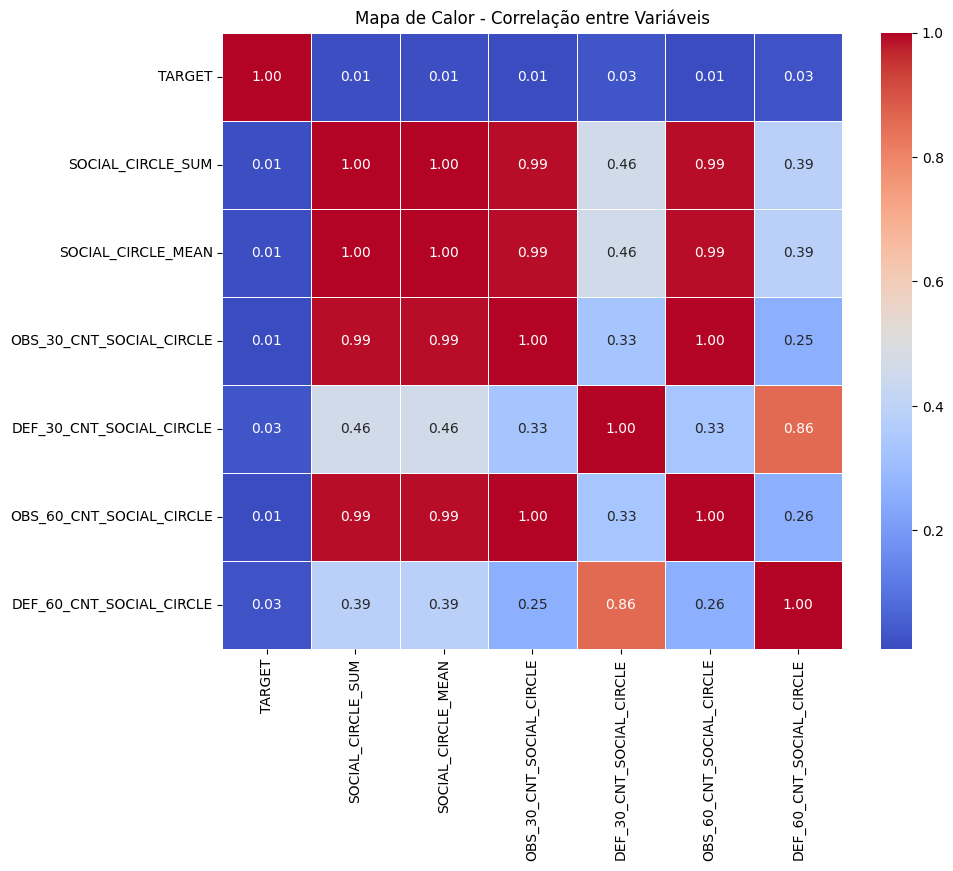

In [106]:
# Selecionar as variáveis para calcular a correlação
variables = ['TARGET', 'SOCIAL_CIRCLE_SUM', 'SOCIAL_CIRCLE_MEAN',
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
             'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Calcular a matriz de correlação
correlation_matrix = application_train4[variables].corr()

# Plotar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

Correlação com a variável alvo (TARGET):

- Todos os valores de correlação com a variável TARGET são muito baixos, próximos de zero. Isso indica que não há uma correlação forte entre essas variáveis sociais e a variável alvo. Em outras palavras, as observações ou deficiências nos círculos sociais dos indivíduos não parecem ter uma relação clara com o risco de inadimplência.

Correlação entre as variáveis sociais:

- SOCIAL_CIRCLE_SUM e SOCIAL_CIRCLE_MEAN têm uma correlação perfeita (1.000), o que é esperado, já que SOCIAL_CIRCLE_MEAN é derivado de SOCIAL_CIRCLE_SUM.
- OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE mostram correlações muito próximas de 1 entre si, indicando que estão fortemente correlacionadas. Isso sugere que essas variáveis podem estar medindo aspectos semelhantes relacionados aos círculos sociais dos clientes.

In [107]:
# Lista das variáveis a serem excluídas
vars_to_drop = ['SOCIAL_CIRCLE_SUM', 'SOCIAL_CIRCLE_MEAN',
                'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Excluir as variáveis do DataFrame application_train4
application_train4.drop(vars_to_drop, axis=1, inplace=True)

application_train4.shape

(263182, 66)

Razões para Exclusão:

- Baixa Correlação com a Variável Alvo: A correlação próxima de zero indica que essas variáveis sociais não estão diretamente relacionadas ao risco de inadimplência dos clientes. Portanto, elas podem não contribuir significativamente para melhorar a precisão do modelo preditivo.

- Redução de Complexidade: Excluir variáveis que não contribuem para a predição pode simplificar o modelo, tornando-o mais fácil de interpretar e mais eficiente computacionalmente.

- Foco em Variáveis Mais Relevantes: Ao remover variáveis com baixa correlação, vou me concentrar em variáveis mais relevantes que estão mais fortemente correlacionadas com a variável alvo.

#### OUTLIERS 
('DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN')

In [108]:
# DAYS_LAST_PHONE_CHANGE: Dias desde a última alteração de número de telefone.
# AMT_REQ_CREDIT_BUREAU_HOUR: Número de consultas ao bureau de crédito solicitadas na última hora.
# AMT_REQ_CREDIT_BUREAU_DAY: Número de consultas ao bureau de crédito solicitadas no último dia.
# AMT_REQ_CREDIT_BUREAU_WEEK: Número de consultas ao bureau de crédito solicitadas na última semana.
# AMT_REQ_CREDIT_BUREAU_MON: Número de consultas ao bureau de crédito solicitadas no último mês.
# AMT_REQ_CREDIT_BUREAU_QRT: Número de consultas ao bureau de crédito solicitadas no último trimestre.
# AMT_REQ_CREDIT_BUREAU_YEAR: Número de consultas ao bureau de crédito solicitadas no último ano.
# EXT_SOURCE_MEAN: Média das fontes externas de informação normalizadas (como pontuações de crédito).

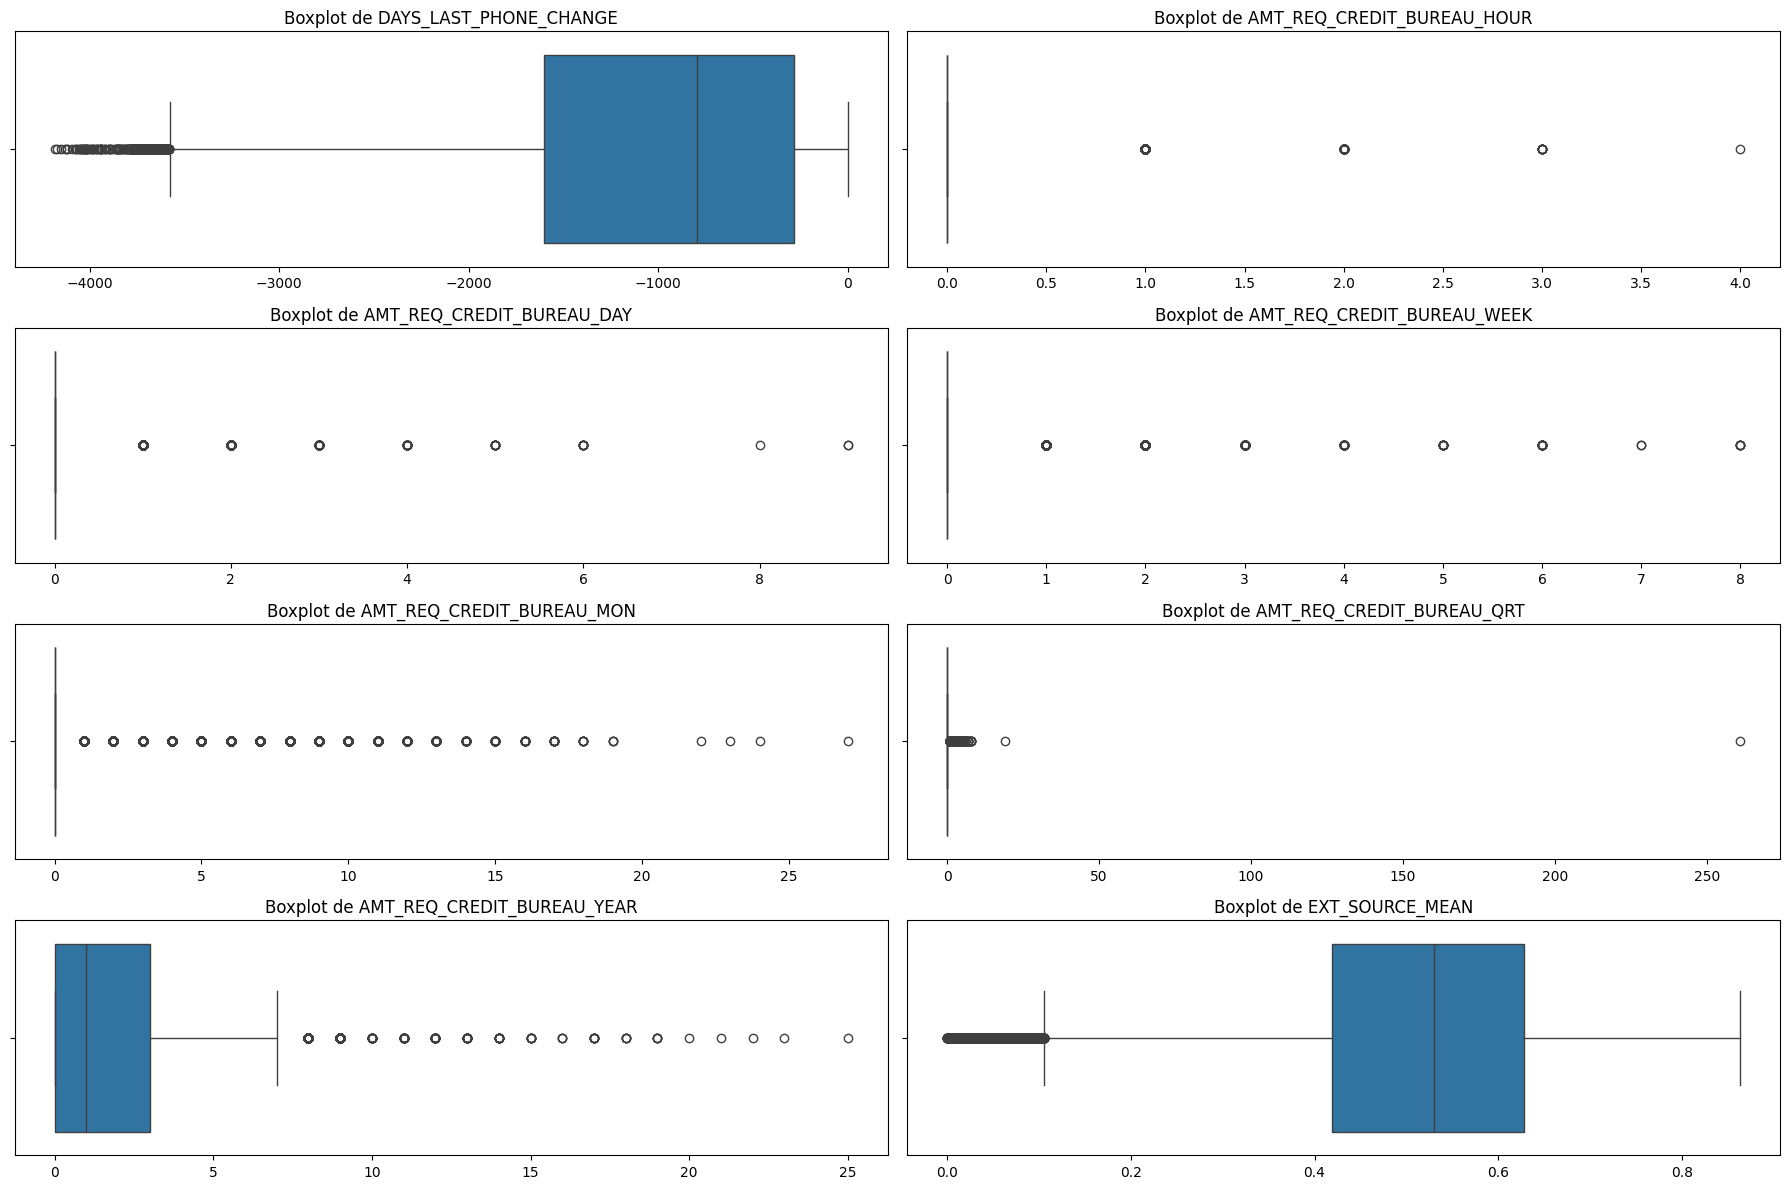

In [109]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN']

# Configurações gerais para o gráfico
plt.figure(figsize=(18, 12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 2, i + 1)  
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks() 

plt.tight_layout()
plt.show()
# Todas as variaveis restantes possuem outliears

In [110]:
print(application_train4[['DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN']].describe())

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           263182.000000               263182.000000   
mean              -988.430702                    0.006391   
std                832.888956                    0.083824   
min              -4185.000000                    0.000000   
25%              -1603.000000                    0.000000   
50%               -798.000000                    0.000000   
75%               -286.000000                    0.000000   
max                  0.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              263182.000000               263182.000000   
mean                    0.006984                    0.034493   
std                     0.110597                    0.204951   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75

Conclusões Gerais:
- A maioria dos clientes parece não ter consultado frequentemente o bureau de crédito imediatamente antes de solicitar o empréstimo, o que pode indicar estabilidade nas consultas de crédito antes do pedido.
- A idade média da última mudança no número de telefone é relativamente alta, sugerindo que os clientes não mudam frequentemente de número.
- As pontuações externas médias indicam uma distribuição razoavelmente boa entre os clientes, mas com uma ampla dispersão.

In [111]:
# Valores zero podem significar dados ausentes, a variavel por si só não diz muito a respeito da inadimplência
# Como temos muitas outras variaveis e pretendo diminuir a dimensionalidade dos registros para o modelo vou exclui-la
application_train4['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
 0.0    31452
-1.0     2458
-2.0     2056
-3.0     1583
-4.0     1143
Name: count, dtype: int64

In [112]:
# Excluindo a coluna 'DAYS_LAST_PHONE_CHANGE' do DataFrame application_train4
application_train4 = application_train4.drop(['DAYS_LAST_PHONE_CHANGE'], axis=1)

# Verificando se a variavel foi excluida
application_train4.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_D

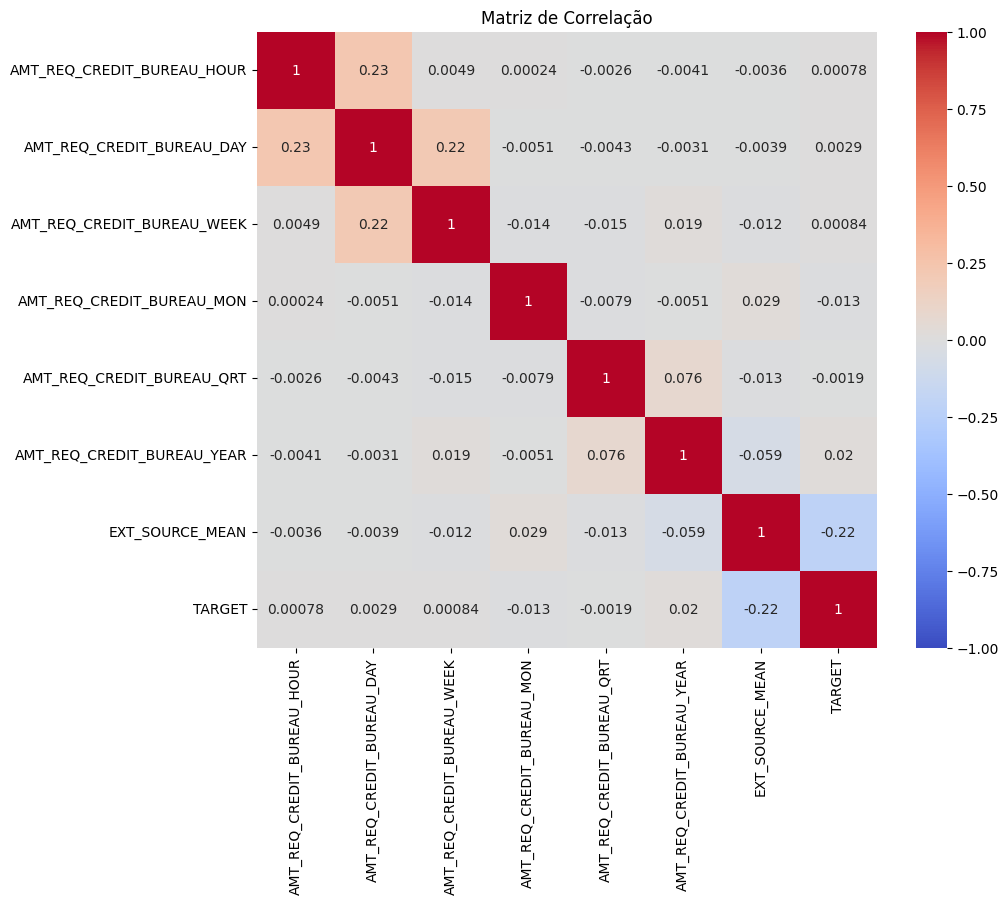

In [113]:
# Vamos fazer uma correlação com a target de todas essas variaveis 
# Calculando a matriz de correlação
correlation_matrix = application_train4[[ 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                         'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                         'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN', 'TARGET']].corr()

# Criando um gráfico de calor com seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Resumo da Análise de Correlação com a Variável Alvo

- **DAYS_LAST_PHONE_CHANGE**: Exibe uma correlação negativa leve (-0.178) com a variável `'TARGET'`, sugerindo que clientes com mais dias desde a última mudança de telefone tendem a ter uma leve tendência a não cumprir suas obrigações financeiras.

- **AMT_REQ_CREDIT_BUREAU_YEAR**: Mostra uma correlação negativa moderada (-0.110) com `'TARGET'`, indicando que um maior número de consultas ao bureau de crédito por ano está associado a uma ligeira diminuição na probabilidade de cumprimento das obrigações financeiras.

- **EXT_SOURCE_MEAN**: Apresenta a correlação mais forte com `'TARGET'`, sendo negativa (-0.216). Isso sugere que clientes com índices médios de fontes externas mais baixos têm maior probabilidade de não cumprir suas obrigações financeiras.

- **AMT_REQ_CREDIT_BUREAU_MON**: Exibe uma correlação negativa leve (-0.013) com `'TARGET'`, indicando que um maior número de consultas ao bureau de crédito por mês está ligeiramente associado a uma diminuição na probabilidade de cumprimento das obrigações financeiras.

- **Outras Variáveis**: As demais variáveis ('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT') mostram correlações próximas de zero com `'TARGET'`, sugerindo que não há uma relação linear clara com a capacidade de pagamento.

Essas correlações são importantes para entender as variáveis que podem influenciar a capacidade de pagamento dos clientes, sendo úteis para desenvolver modelos preditivos ou estratégias de análise de risco no setor bancário.


In [114]:
# Quero verificar se a consulta anual é o resultado da soma das consultas de outros períodos
# O objetivo é confirmar se todos os tipos de consultas são distintas

# Calculando a soma das variáveis do bureau excluindo 
application_train4['BUREAU_SUM'] = application_train4[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                       'AMT_REQ_CREDIT_BUREAU_QRT']].sum(axis=1)

print(application_train4[['BUREAU_SUM', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe())
# Podemos observar que se a consulta anual fosse o resultado da soma das outras consultas o resultado seria igual ou muito próximo, no entanto, não é o caso
# Com base nesses resultados, posso somar todas as consultas e transformar em uma única variável

          BUREAU_SUM  AMT_REQ_CREDIT_BUREAU_YEAR
count  263182.000000               263182.000000
mean        0.581472                    1.904484
std         1.233976                    1.868853
min         0.000000                    0.000000
25%         0.000000                    0.000000
50%         0.000000                    1.000000
75%         1.000000                    3.000000
max       262.000000                   25.000000


In [115]:
# Somando todas as variáveis do bureau
application_train4['TOTAL_REQ_CREDIT_BUREAU'] = application_train4[
    ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
     'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
].sum(axis=1)

# Verificando estatísticas descritivas da nova variável
print(application_train4['TOTAL_REQ_CREDIT_BUREAU'].describe())
print(application_train4.shape)

count    263182.000000
mean          2.485956
std           2.287940
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         262.000000
Name: TOTAL_REQ_CREDIT_BUREAU, dtype: float64
(263182, 67)


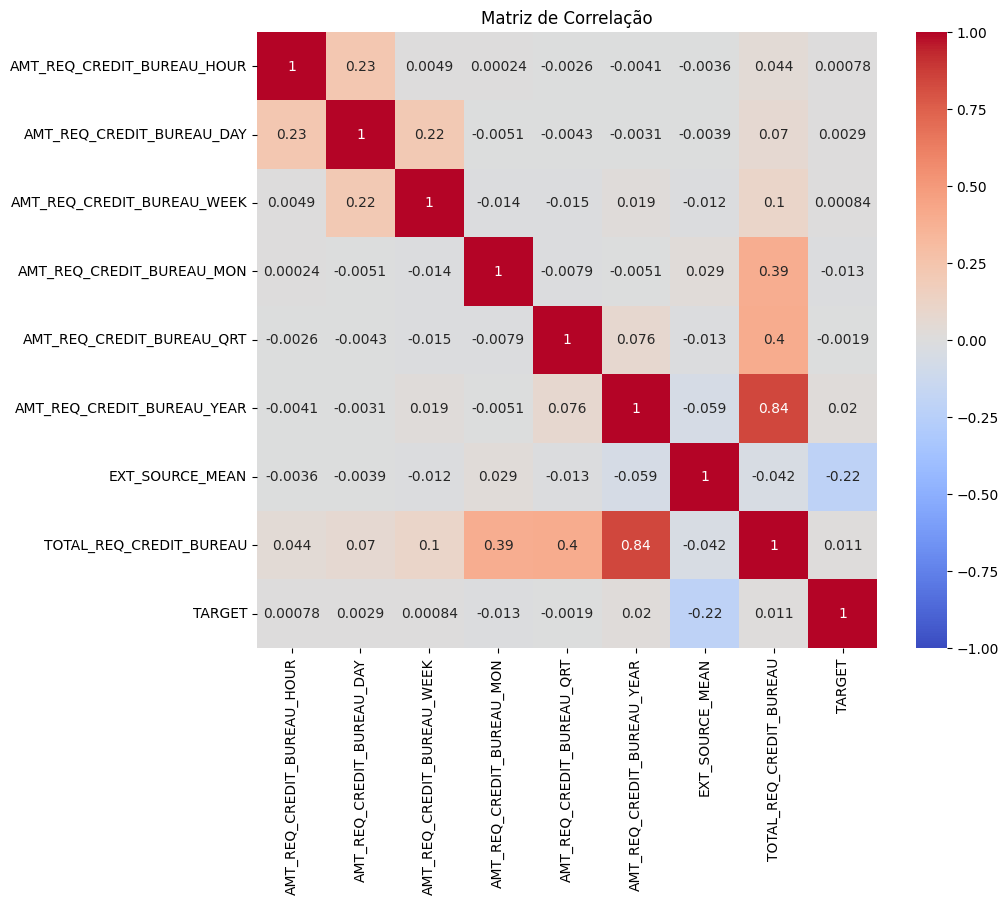

In [116]:
# Calculando a matriz de correlação
correlation_matrix = application_train4[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                         'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                         'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_MEAN', 'TOTAL_REQ_CREDIT_BUREAU', 'TARGET']].corr()

# Criando um gráfico de calor com seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Conclusão

- Todas as variaveis relacionadas a consultas dos clientes não influenciam significativamente a TARGET. no entanto, vou manter apenas a variavel que soma todas elas para futuras análises.

In [117]:
# Excluindo múltiplas colunas do DataFrame application_train4
cols_para_excluir = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'BUREAU_SUM']

application_train4 = application_train4.drop(cols_para_excluir, axis=1)

# Exibindo as colunas restantes após a exclusão
print(application_train4.columns)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_D

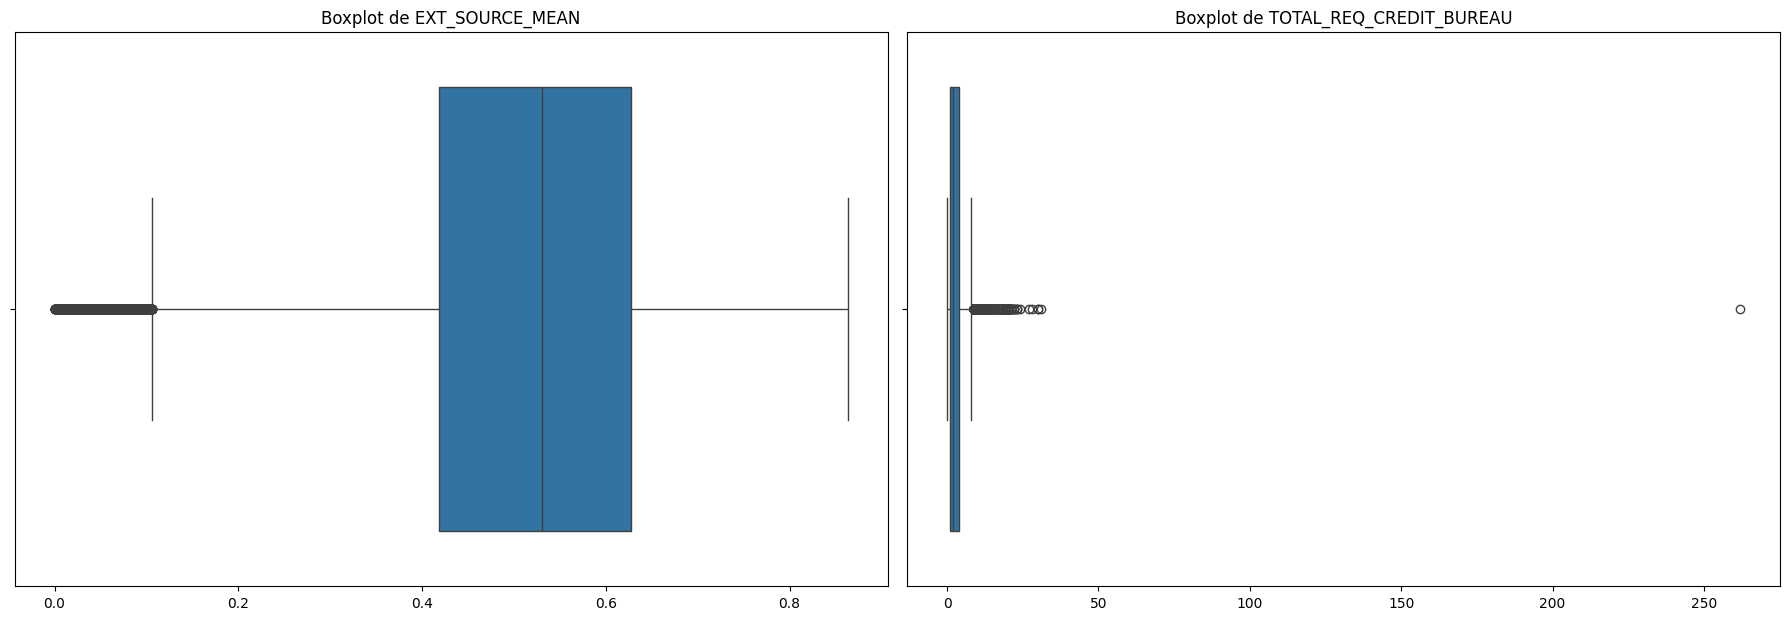

In [118]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['EXT_SOURCE_MEAN', 'TOTAL_REQ_CREDIT_BUREAU']

# Configurações gerais para o gráfico
plt.figure(figsize=(18, 12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks() 

plt.tight_layout()
plt.show()
# Temos alguns outliears, vamos analisar essas variaveis 

In [119]:
# Temos um valor discrepante no total de consultas
print(application_train4[['EXT_SOURCE_MEAN', 'TOTAL_REQ_CREDIT_BUREAU']].describe())

       EXT_SOURCE_MEAN  TOTAL_REQ_CREDIT_BUREAU
count    263182.000000            263182.000000
mean          0.513958                 2.485956
std           0.147576                 2.287940
min           0.000017                 0.000000
25%           0.418761                 1.000000
50%           0.530093                 2.000000
75%           0.627434                 4.000000
max           0.863363               262.000000


In [120]:
# Dados float e int
application_train4[['EXT_SOURCE_MEAN', 'TOTAL_REQ_CREDIT_BUREAU']].head()

EXT_SOURCE_MEAN  TOTAL_REQ_CREDIT_BUREAU
0         0.201162                      1.0
1         0.622246                      0.0
2         0.642739                      0.0
4         0.322738                      0.0
5         0.487726                      2.0

In [121]:
# Filtrando valor de 262 na variavel de consulta
# Temos apenas um registro
application_train4[application_train4['TOTAL_REQ_CREDIT_BUREAU'] == 262]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474                1             1          360000.0   1035000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
239474      30393.0  ...                 0                0                0   

       FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
239474                0                0                0                 0   

        FLAG_DOCUMENT_21  EXT_SOURCE_MEAN  TOTAL_REQ_CREDIT_BUREAU  
239474                 0         0.663803                    262.0  

[1 rows x 60 columns]

In [122]:
# Excluindo esse registro
application_train4 = application_train4[application_train4['TOTAL_REQ_CREDIT_BUREAU'] != 262]

# Confirmando a exclusão
application_train4[application_train4['TOTAL_REQ_CREDIT_BUREAU'] == 262].shape

(0, 60)

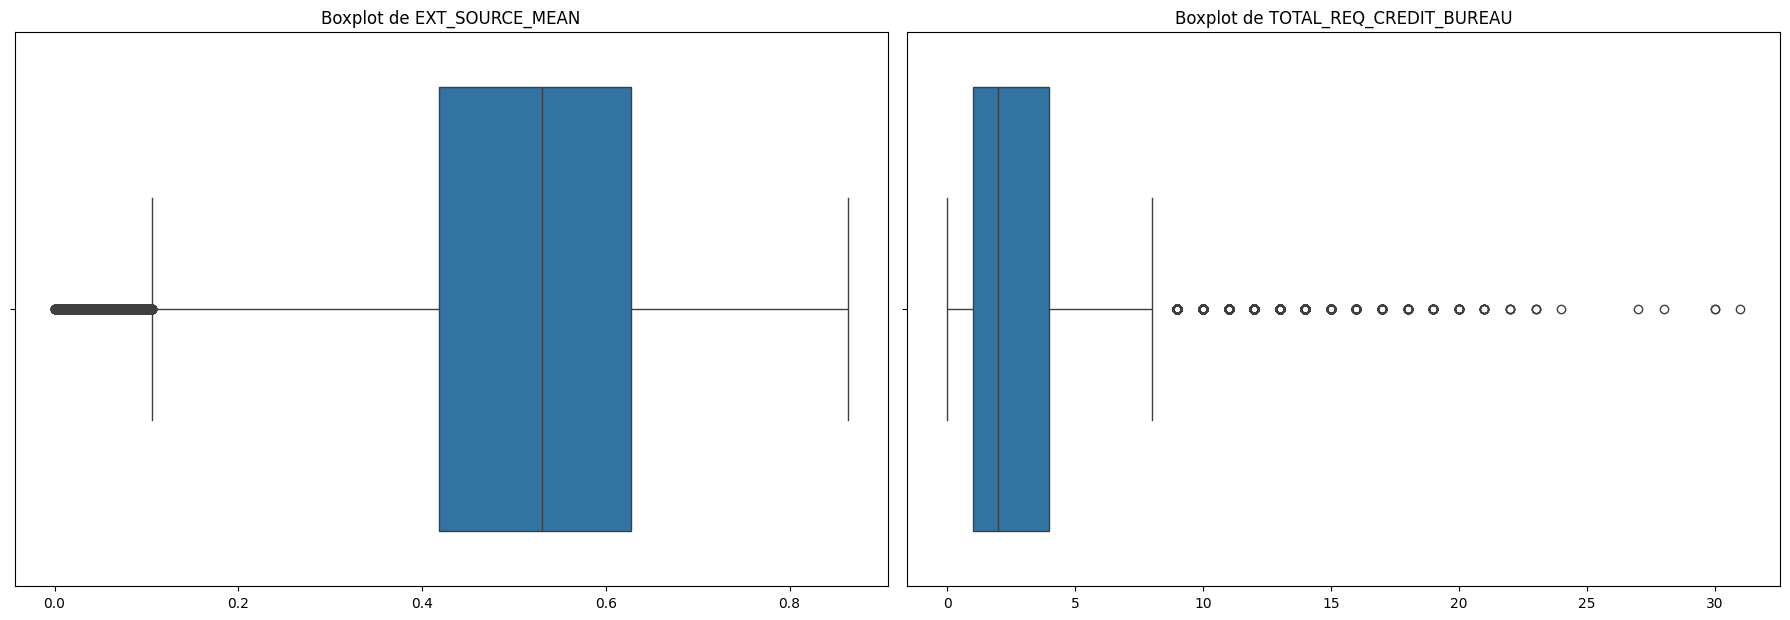

In [123]:
# Selecionar as variáveis para plotar os boxplots
vars_to_plot = ['EXT_SOURCE_MEAN', 'TOTAL_REQ_CREDIT_BUREAU']

# Configurações gerais para o gráfico
plt.figure(figsize=(18, 12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(x=application_train4[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks() 

plt.tight_layout()
plt.show()

# Vamos analisar essas variaveis 

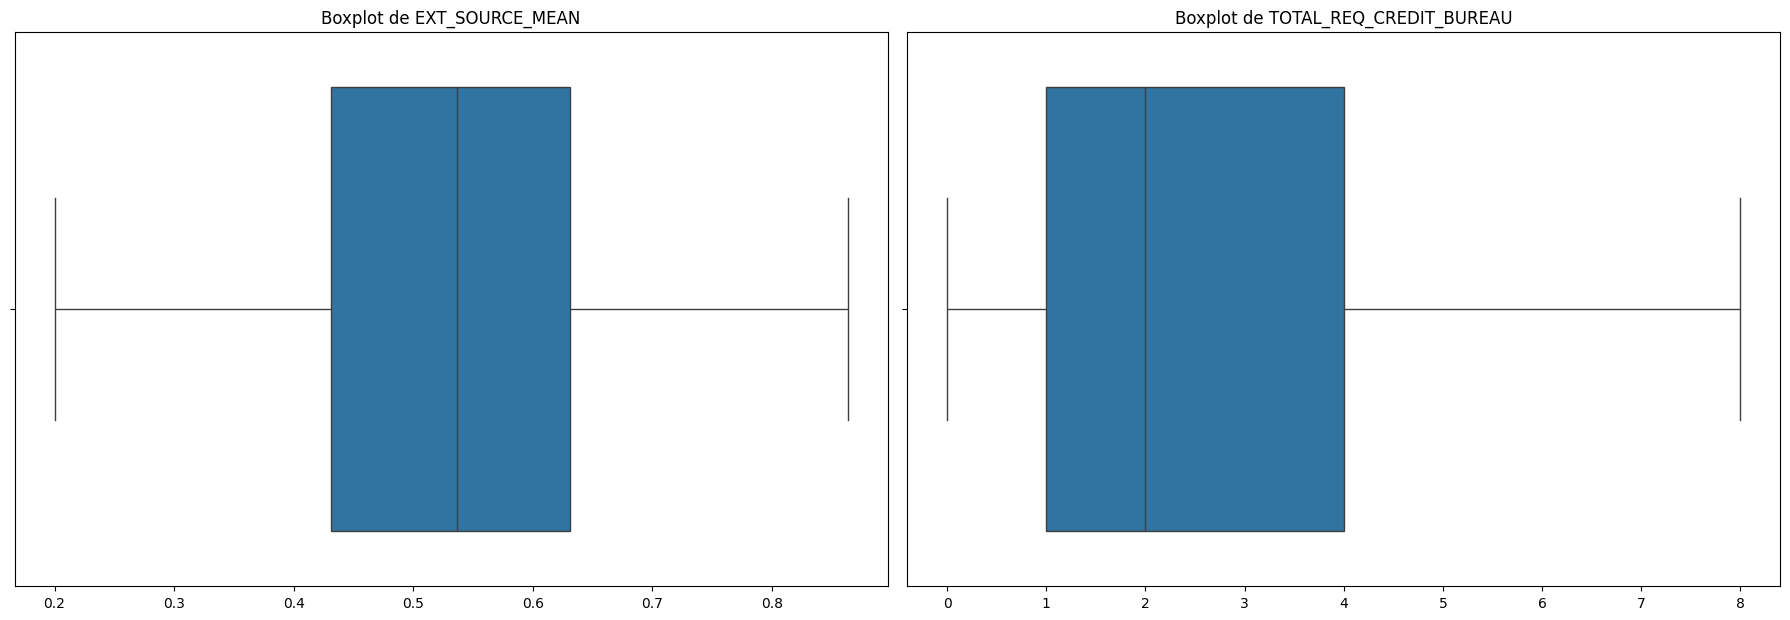

In [124]:
# Filtrar os dados para selecionar apenas as linhas onde EXT_SOURCE_MEAN > 0.1 e TOTAL_REQ_CREDIT_BUREAU > 10
filtered_data = application_train4[(application_train4['EXT_SOURCE_MEAN'] > 0.2) & (application_train4['TOTAL_REQ_CREDIT_BUREAU'] < 9)]

# Selecionar apenas as duas variáveis de interesse
vars_to_plot = filtered_data[['EXT_SOURCE_MEAN', 'TOTAL_REQ_CREDIT_BUREAU']]

# Configurações gerais para o gráfico
plt.figure(figsize=(18, 12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

# Plotar os boxplots para cada variável
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(x=vars_to_plot[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.xticks() 

plt.tight_layout()
plt.show()

# Para EXT_SOURCE_MEAN não terá outliears acima de 0.2
# Para consultas no bureau, não terá outliears abaixo de 9 consultas

In [125]:
# Contagem de outliers na variável EXT_SOURCE_MEAN (valores menores que 0.2)
outliers_ext_source = (application_train4['EXT_SOURCE_MEAN'] < 0.2).sum()
total_registros = application_train4.shape[0]
porcentagem_outliers_ext_source = (outliers_ext_source / total_registros) * 100

print(f'Quantidade de registros que causam outliers na EXT_SOURCE_MEAN: {outliers_ext_source}')
print(f'Porcentagem de registros que causam outliers na EXT_SOURCE_MEAN: {porcentagem_outliers_ext_source:.2f}%')

# Contagem de outliers na variável TOTAL_REQ_CREDIT_BUREAU (valores maiores que 9)
outliers_total_req = (application_train4['TOTAL_REQ_CREDIT_BUREAU'] > 9).sum()
porcentagem_outliers_total_req = (outliers_total_req / total_registros) * 100

print(f'Quantidade de registros que causam outliers na TOTAL_REQ_CREDIT_BUREAU: {outliers_total_req}')
print(f'Porcentagem de registros que causam outliers na TOTAL_REQ_CREDIT_BUREAU: {porcentagem_outliers_total_req:.2f}%')

Quantidade de registros que causam outliers na EXT_SOURCE_MEAN: 8132
Porcentagem de registros que causam outliers na EXT_SOURCE_MEAN: 3.09%
Quantidade de registros que causam outliers na TOTAL_REQ_CREDIT_BUREAU: 2402
Porcentagem de registros que causam outliers na TOTAL_REQ_CREDIT_BUREAU: 0.91%


Conclusão:

- Como são variáveis de consulta e os valores não são absurdamente altos, podemos manter esses registros
- Exclui-los ou modifica-los possivelmente traria um sobre ajuste no comportamento do modelo em relação aos clientes e não estria de acordo com realidade dos clientes.

### Resultados (OUTLIERS / NULLS)

In [126]:
# Com ma exclusão das variaveis temos 60 variaveis 
application_train4.columns, application_train4.shape

(Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
        'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
        'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
        'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUM

In [127]:
# Naõ temos registros nulos
application_train4.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
YEARS_BIRTH                    0
YEARS_REGISTRATION             0
YEARS_ID_PUBLISH               0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

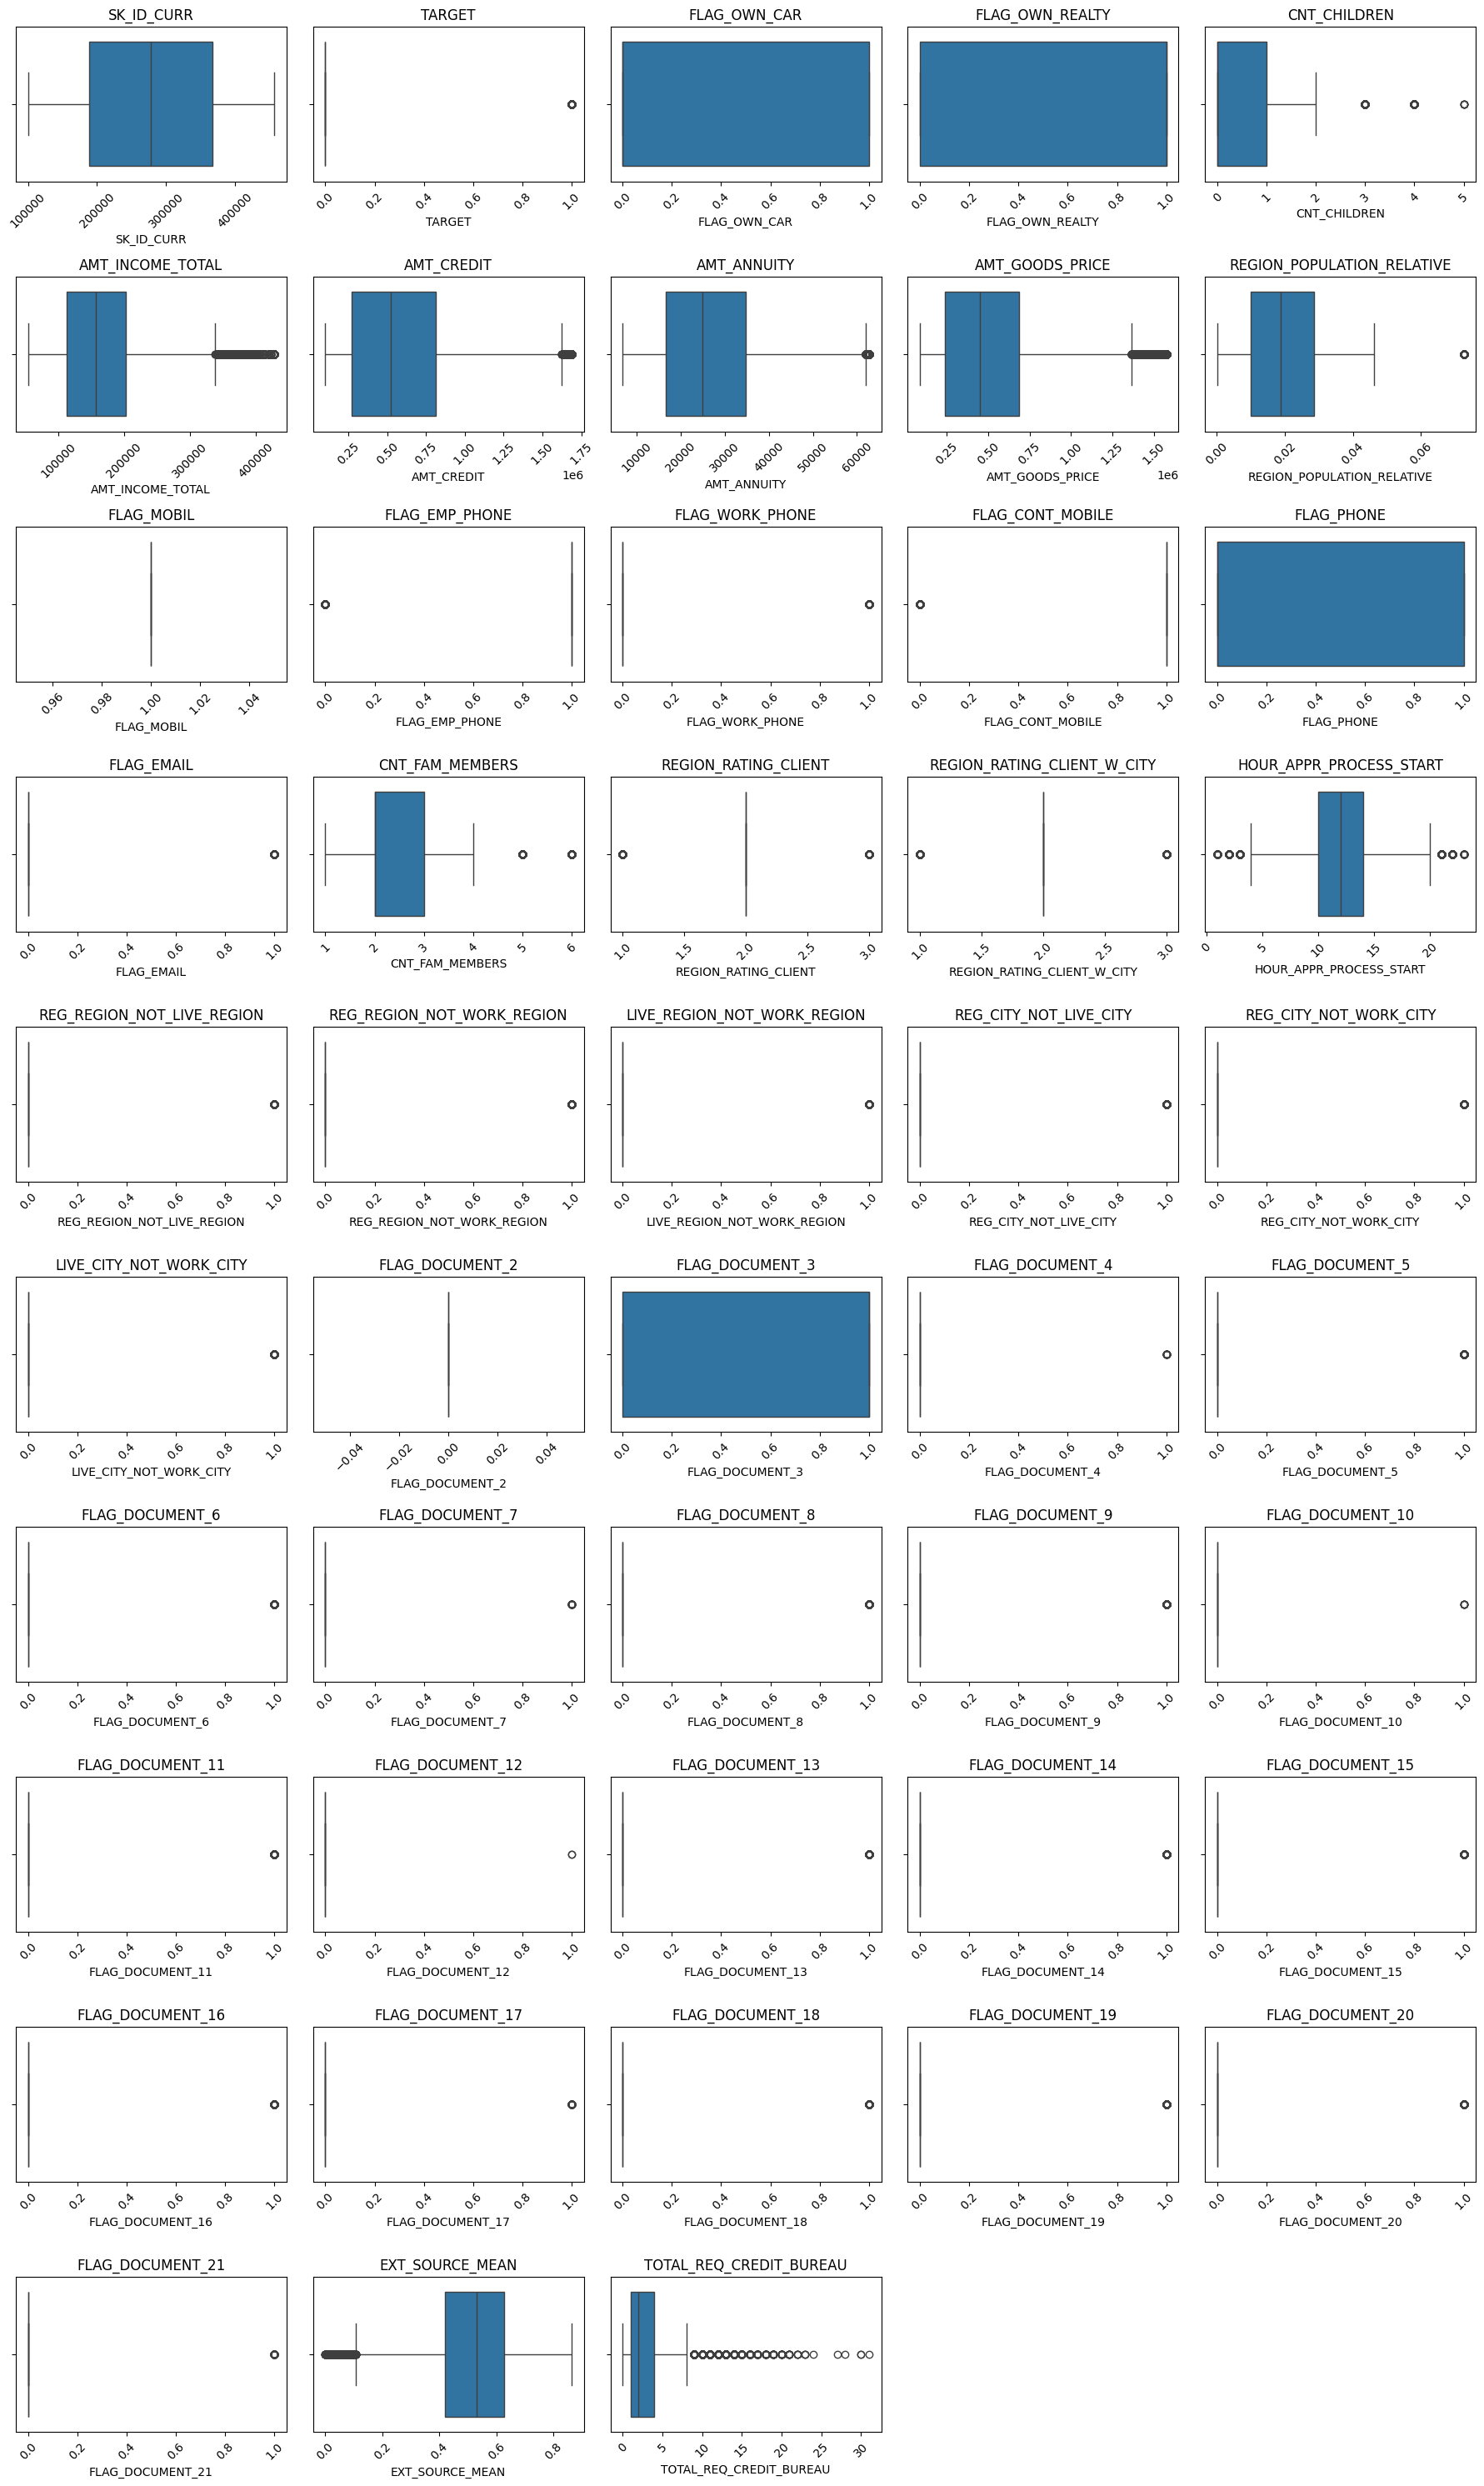

In [128]:
# Selecionar apenas as colunas numéricas
numeric_cols = application_train4.select_dtypes(include=['int64', 'float64']).columns

# Criar boxplots para as variáveis numéricas
plt.figure(figsize=(18, 30))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 5, i+1)
    sns.boxplot(x=application_train4[col])
    plt.title(col, fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusão:

- As variaveis numericas apresentadas no gráfico mostram alguns outliears que sobraram de algumas variaveis, no entanto, optei por deixa-los por se tratar de registros em variaveis que permitem ter alguns valores fora da média, além de não serem valores que apresentam muita distância dos valores comuns.

# Exploratory Data Analysis

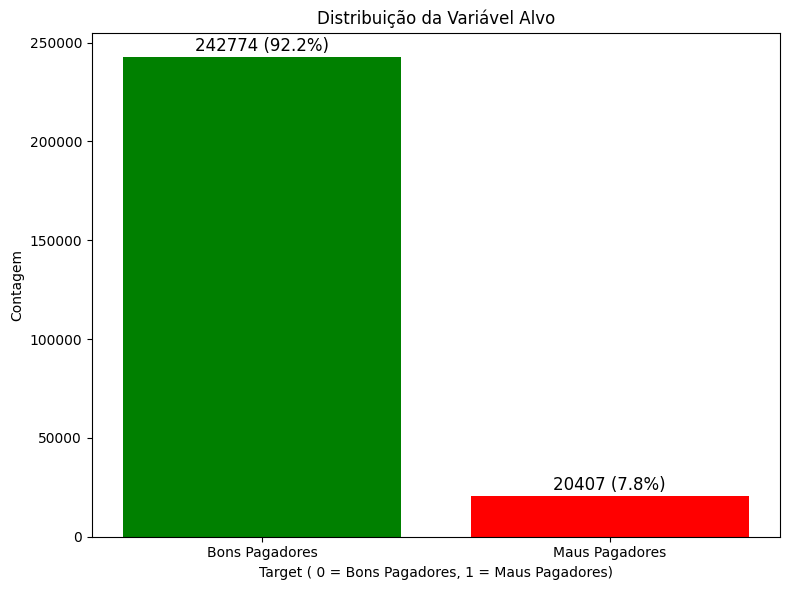

In [129]:
# Contagem dos valores da variável alvo
target_counts = application_train4['TARGET'].value_counts()

# Calcular as porcentagens
total = target_counts.sum()
percentages = [(count / total) * 100 for count in target_counts]

# Plotagem usando matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index, target_counts.values, color=['green', 'red'])

# Adicionar texto nas barras (contagem e porcentagem)
for bar, count, percent in zip(bars, target_counts.values, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{count} ({percent:.1f}%)', ha='center', va='bottom', fontsize=12)

plt.xlabel('Target ( 0 = Bons Pagadores, 1 = Maus Pagadores)')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável Alvo')

# Adicionar rótulos para os valores
plt.xticks(target_counts.index, ['Bons Pagadores', 'Maus Pagadores'])

plt.tight_layout()
plt.show()

- Podemos observar os registros baseados na target que 8% dos clientes dessa base de dados possuem alto risco de inadimplência
- Com base nesses resultados, podemos tirar analises exploratórias sobre algumas perguntas importantes do porquê esses clientes estarem inadimplentes

- Perguntas:
  1. O que torna esses clientes inadimplentes?
  2. Qual a diferença entre clientes inadimplentes e não inadimplentes?
  3. Existe algo em comum entre os clientes inadimplentes, um fator em comum?
  4. Qual é o atributo que influência a inadimplência desses clientes?
  5. Qual é a média da dívida desses clientes?
  6. Existe algum erro na avaliação desses clientes? 

In [130]:
application_train4.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_D

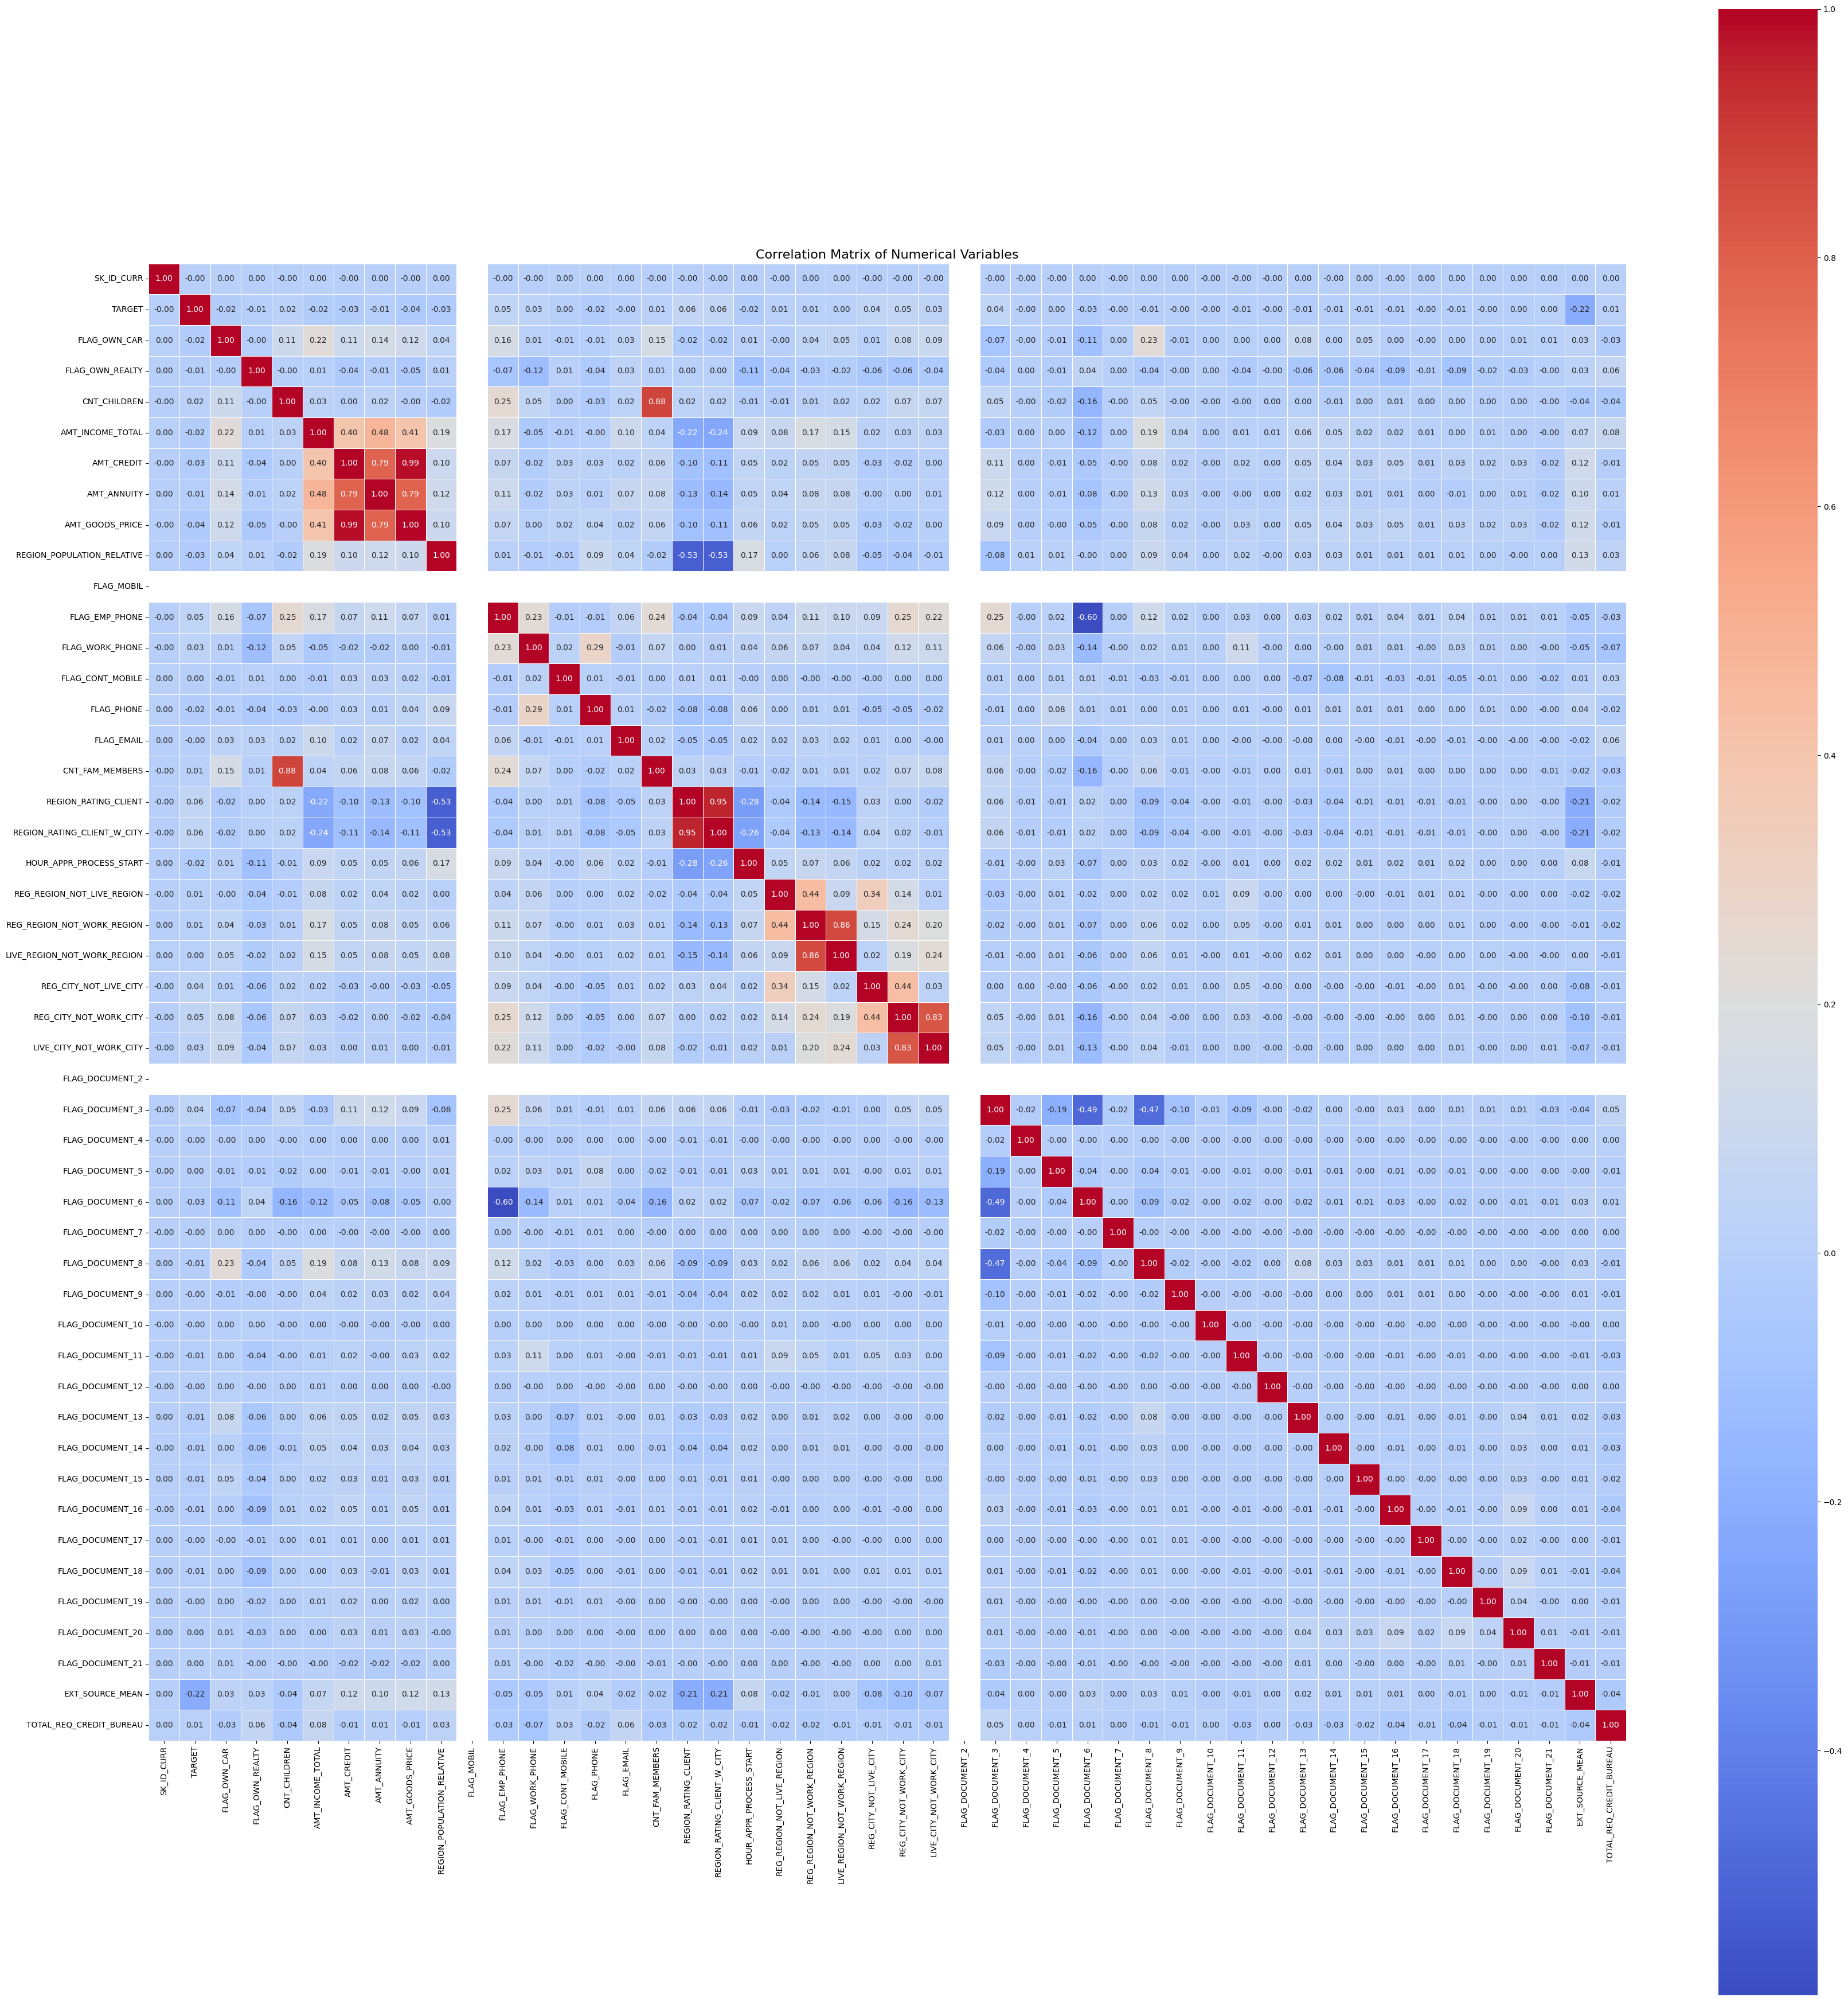

In [131]:
# Selecionar apenas as colunas numéricas
numeric_cols = application_train4.select_dtypes(include=['int64', 'float64']).columns

# Calcular a matriz de correlação
correlation_matrix = application_train4[numeric_cols].corr()

# Plotar o gráfico de correlação usando seaborn
plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Variáveis com Alta Correlação Positiva:

- AMT_CREDIT e AMT_GOODS_PRICE: Forte correlação positiva de aproximadamente 0.986 entre o valor do crédito e o preço dos bens.
- AMT_ANNUITY e AMT_CREDIT: Correlação alta de cerca de 0.796, indicando que o valor da anuidade está fortemente relacionado ao valor do crédito.
- CNT_CHILDREN e CNT_FAM_MEMBERS: Correlação de cerca de 0.878, mostrando que o número de crianças e o número de membros da família estão altamente correlacionados.
- FLAG_EMP_PHONE e FLAG_WORK_PHONE: Correlação de aproximadamente 0.579, sugerindo uma relação significativa entre o emprego e o trabalho por telefone.

Variáveis com Correlação Negativa Significativa:

- EXT_SOURCE_MEAN e TARGET: Correlação negativa moderada de cerca de -0.216, indicando que as médias das fontes externas estão inversamente relacionadas com a variável alvo (provável inadimplência).
- REGION_RATING_CLIENT_W_CITY e REGION_POPULATION_RELATIVE: Correlação negativa de aproximadamente -0.525, mostrando uma relação inversa entre a classificação da região e a população relativa da região.
- EXT_SOURCE_MEAN e AMT_INCOME_TOTAL: Correlação negativa moderada de cerca de -0.065, indicando que a média das fontes externas tem uma relação inversa com o total de renda.

Outras Observações Relevantes:

- FLAG_OWN_CAR e FLAG_OWN_REALTY: Correlação positiva moderada de aproximadamente 0.105, sugerindo uma relação entre possuir carro e possuir imóvel.
- EXT_SOURCE_MEAN e REGION_POPULATION_RELATIVE: Correlação positiva de aproximadamente 0.133, indicando uma relação positiva entre as médias das fontes externas e a população relativa da região.

Variáveis com Correlação Próxima a Zero:

- FLAG_DOCUMENT_2, FLAG_MOBIL, FLAG_DOCUMENT_10: Essas variáveis têm correlação muito baixa com outras variáveis na amostra estudada, sugerindo que podem não ter influência significativa.

Variáveis com Valores Faltantes (NaN):

- Algumas variáveis, como FLAG_MOBIL e FLAG_DOCUMENT_2, têm valores faltantes em sua correlação com outras variáveis. Isso pode indicar que elas são constantes ou têm valores ausentes em grande parte dos dados.

In [132]:
# Todos os valores nessas variaveis são unicos
# Vamos analisar as variaveis com valores nulos 
print(application_train4['FLAG_MOBIL'].value_counts())
print(application_train4['FLAG_DOCUMENT_2'].value_counts())
application_train4.shape

FLAG_MOBIL
1    263181
Name: count, dtype: int64
FLAG_DOCUMENT_2
0    263181
Name: count, dtype: int64


(263181, 60)

In [133]:
# Excluir as colunas diretamente do DataFrame
application_train4.drop(columns=['FLAG_MOBIL', 'FLAG_DOCUMENT_2'], inplace=True)

application_train4.shape

(263181, 58)

## Inadimplentes x Não Inadimplentes

In [134]:
# Filtrar inadimplentes e não inadimplentes
inadimplentes = application_train4[application_train4['TARGET'] == 1]
nao_inadimplentes = application_train4[application_train4['TARGET'] == 0]

# Verificar o número de registros em cada DataFrame
print("Número de inadimplentes:", len(inadimplentes))
print("Número de não inadimplentes:", len(nao_inadimplentes))

Número de inadimplentes: 20407
Número de não inadimplentes: 242774


In [135]:
# Dados normais, sem nenhum tipo de erro, aparentemente
inadimplentes.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 1             0          202500.0    406597.5      24700.5   
26                1             0          112500.0    979992.0      27076.5   
40                1             0          202500.0   1193580.0      35028.0   
42                0             0          135000.0    288873.0      16258.5   
81                1             0           81000.0    252000.0      14593.5   

    ...  FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  \
0   ...                 0                0                0                0   
26  ...                 0                0                1                0   
40  ...                 0                0                0                0   
42  ...                 0                0                0                0   
81  ...                 0                0                0                0   

   FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                0                 0                 0   
26                0                0                 0                 0   
40                0                0                 0                 0   
42                0                0                 0                 0   
81                0                0                 0                 0   

    EXT_SOURCE_MEAN  TOTAL_REQ_CREDIT_BUREAU  
0          0.201162                      1.0  
26         0.369592                      4.0  
40         0.313502                      6.0  
42         0.536939                      2.0  
81         0.372448                      0.0  

[5 rows x 58 columns]

In [136]:
# Dados dos clientes pagadores normais, aparentemente
nao_inadimplentes.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   
6      100009       0         Cash loans           F             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6858.0   
4                1             0          121500.0    513000.0      21865.5   
5                1             0           99000.0    490495.5      27517.5   
6                1             1          171000.0   1560726.0      41301.0   

   ...  FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  \
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 1                0                0                0   

  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
1                0                0                 0                 0   
2                0                0                 0                 0   
4                0                0                 0                 0   
5                0                0                 0                 0   
6                0                0                 0                 0   

   EXT_SOURCE_MEAN  TOTAL_REQ_CREDIT_BUREAU  
1         0.622246                      0.0  
2         0.642739                      0.0  
4         0.322738                      0.0  
5         0.487726                      2.0  
6         0.608030                      4.0  

[5 rows x 58 columns]

### Insigths (Idade) Inadimplentes x Não Inadimplentes

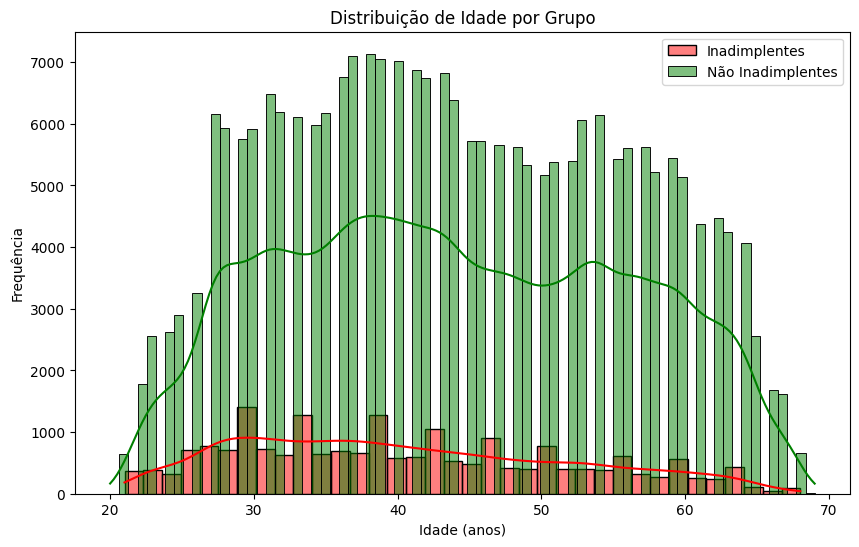

In [137]:
# Histograma de idade (IDADE_ANO)
plt.figure(figsize=(10, 6))
sns.histplot(inadimplentes['YEARS_BIRTH'], color='red', kde=True, label='Inadimplentes', alpha=0.5)
sns.histplot(nao_inadimplentes['YEARS_BIRTH'], color='green', kde=True, label='Não Inadimplentes', alpha=0.5)
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade por Grupo')
plt.legend()
plt.show()

Inadimplentes:
- Representado por barras vermelhas e uma linha de tendência vermelha.
- A maior frequência de inadimplentes está concentrada na faixa etária de aproximadamente 28 a 40 anos. Isso sugere que indivíduos nesta faixa etária são mais propensos a problemas de inadimplência.
- Após os 40 anos, a frequência de inadimplentes começa a diminuir gradualmente com alguns picos até a ultima idade.

Não Inadimplentes:
- Representado por barras verdes e uma linha de tendência verde.
- Há um pequeno aumento na frequência de não inadimplentes entre 35 e 45 anos.

Redução da Inadimplência com o Avanço da Idade:
- A frequência de inadimplentes tendem a ter queda a partir de 40 anos, desconsiderando alguns picos. Isso pode indicar que, à medida que as pessoas envelhecem, elas se tornam mais estáveis financeiramente ou adquirem melhores hábitos de pagamento.
- A queda de inadimplentes a partir dos 40 anos pode ser melhor entendida, embora a queda seja gradativa houve picos em periodos de idades, é interessante entender o porquê.

Implicações:
- Políticas de Crédito: Instituições financeiras podem considerar políticas mais rigorosas para indivíduos na faixa com maior inadimplência ou oferecer programas educativos focados nessas faixa etárias para melhorar a gestão financeira.
- Educação Financeira: A criação de programas de educação financeira pode ser mais eficaz se direcionada para pessoas na faixa etária com maior incidência de inadimplência.
- Monitoramento de Risco: O monitoramento de risco pode ser intensificado para clientes com essas faixa etarias, a fim de prever e evitar inadimplências futuras.

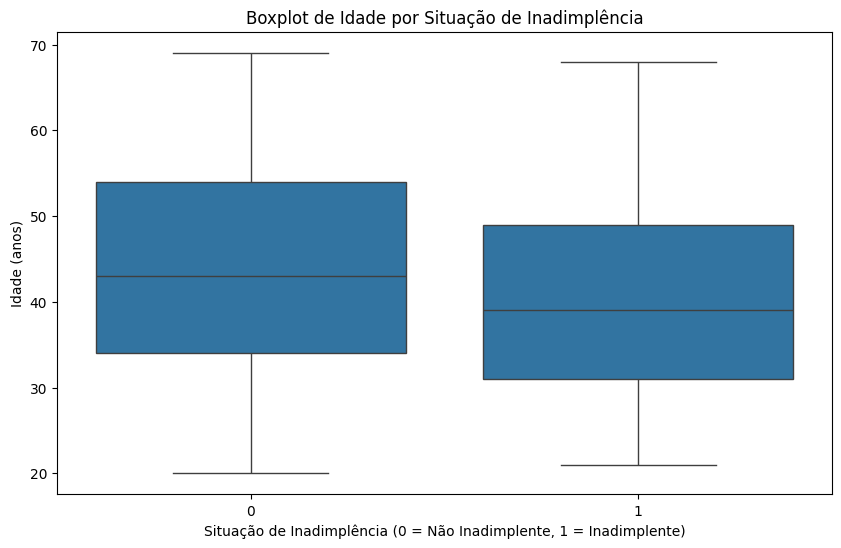

In [138]:
# Boxplot de Renda Total por Situação de Inadimplência
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='YEARS_BIRTH', data=application_train4)
plt.title('Boxplot de Idade por Situação de Inadimplência')
plt.xlabel('Situação de Inadimplência (0 = Não Inadimplente, 1 = Inadimplente)')
plt.ylabel('Idade (anos)')
plt.show()

Análise Gráfico BoxPlot Idade em Relação Inadimplência 
- A média da idade dos não inadimplentes está por volta de 43 anos.
- A média da idade dos inadimplentes está por volta de 38 anos.

Portanto, se o gráfico dos não inadimplentes está ligeiramente acima do gráfico dos inadimplentes, isso sugere que, em média, os não inadimplentes são mais velhos do que os inadimplentes. Esta diferença na média de idade pode indicar uma possível relação entre idade e probabilidade de inadimplência, onde clientes mais jovens (idade em torno de 38 anos) podem estar mais propensos a ter dificuldades financeiras que levam à inadimplência comparados aos mais velhos (idade em torno de 43 anos).

### Insigths (Contrato) Inadimplentes x Não Inadimplentes

In [139]:
# Cash loans (Empréstimos pessoais)
# Revolving loans (Empréstimos rotativos)

In [140]:
# Clientes inadimplentes possuem mais emprestimos pessoais do que rotativos
inadimplentes['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         19155
Revolving loans     1252
Name: count, dtype: int64

In [141]:
# Bons pagadores possuem também mais emprestimos pessoais do que rotativos
# Empréstimos pessoais são mais comuns
nao_inadimplentes['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         220159
Revolving loans     22615
Name: count, dtype: int64

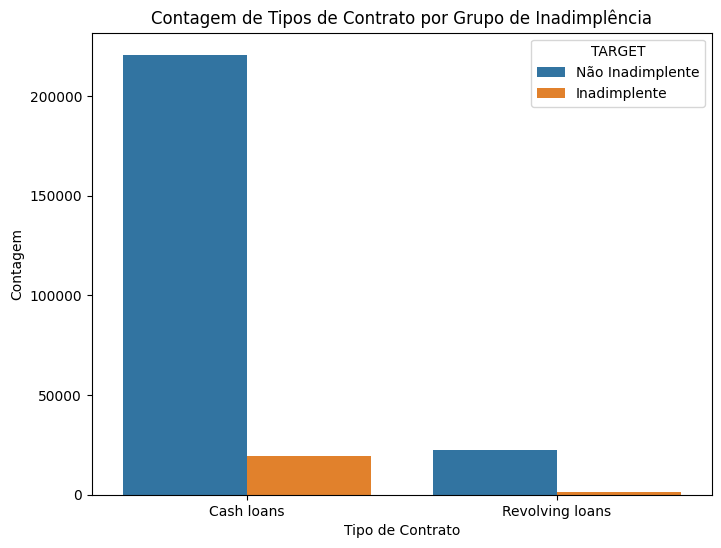

In [142]:
# O gráfico nos ajuda ver visualmente a interpretação desses resultados
# Gráfico de barras para tipo de contrato
plt.figure(figsize=(8, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=application_train1)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.title('Contagem de Tipos de Contrato por Grupo de Inadimplência')
plt.legend(title='TARGET', labels=['Não Inadimplente', 'Inadimplente'])
plt.show()


Análise Tipos de Contrato
- Tanto clientes inadimplentes como não inadimplentes possuem mais empréstimos pessoais

- Provavelmente, os clientes frequentemente optam por empréstimos pessoais (cash loans) em vez de empréstimos rotativos (revolving loans) devido à natureza específica e única do financiamento necessário.
- Empréstimos pessoais oferecem uma quantia fixa de dinheiro para propósitos determinados, com pagamentos mensais previsíveis e potencialmente taxas de juros mais baixas, o que proporciona maior controle financeiro e planejamento eficaz.
- Em contraste, empréstimos rotativos são mais flexíveis, mas podem levar a uma gestão menos estruturada da dívida e potencialmente custos totais de empréstimo mais elevados ao longo do tempo, dependendo do uso e do comportamento do mutuário.

Conclusão:

- Por que clientes ficam inadimplentes mesmo fazendo emprestimos pessoais, visto que empréstimos pessoais tendem a ser mais seguros e estáveis?

`Hipóteses`
1. Mudanças imprevistas na situação financeira pessoal podem levar à inadimplência.
2. Eventos como perda de emprego, doença ou mudanças econômicas podem afetar a capacidade de um mutuário de cumprir com os pagamentos do empréstimo.
3. Dificuldades na administração das finanças pessoais podem resultar em atrasos ou falta de pagamentos, independentemente do tipo de empréstimo.
4. Alguns riscos individuais podem não ser completamente avaliados durante o processo de concessão do empréstimo, o que pode levar a inadimplências não previstas.
5. Mudanças na economia, como recessões ou flutuações do mercado, podem impactar a capacidade dos mutuários de cumprir suas obrigações financeiras.

- Em resumo, embora empréstimos pessoais sejam considerados mais estáveis devido à estrutura e finalidade específica, a inadimplência pode ocorrer devido a uma combinação de fatores individuais, econômicos e de gestão financeira que influenciam a capacidade de pagamento dos mutuários.
- Com base nesses dados, os bancos podem procurar melhores formas de identificar um bom pagador.

### Insigths (Educação) Inadimplentes x Não Inadimplentes

In [143]:
# Secondary / secondary special: Ensino secundário / secundário especializado
# Higher education: Ensino superior
# Incomplete higher: Ensino superior incompleto
# Lower secondary: Ensino secundário inferior
# Academic degree: Grau acadêmico  

In [144]:
# Temos diferentes tipos de grau de escolaridade
inadimplentes['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    15922
Higher education                  3455
Incomplete higher                  696
Lower secondary                    331
Academic degree                      3
Name: count, dtype: int64

In [145]:
# Clientes não inadimplentes também possuem a mesma proporção dos inadimplentes
nao_inadimplentes['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    169950
Higher education                  62078
Incomplete higher                  7820
Lower secondary                    2787
Academic degree                     139
Name: count, dtype: int64

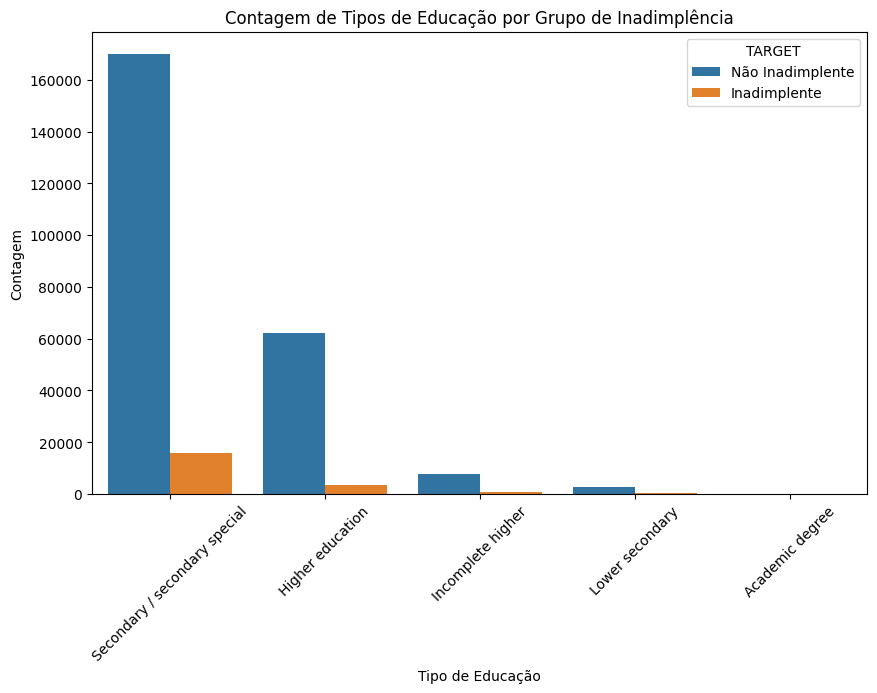

In [146]:
# Gráfico de barras para tipo de educação
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=application_train4)
plt.xlabel('Tipo de Educação')
plt.ylabel('Contagem')
plt.title('Contagem de Tipos de Educação por Grupo de Inadimplência')
plt.legend(title='TARGET', labels=['Não Inadimplente', 'Inadimplente'])
plt.xticks(rotation=45)
plt.show()

1. Distribuição Educacional:

- A maioria dos clientes tem educação secundária / secundária especializada, representando a maior parte da amostra.
- O segundo maior grupo é composto por clientes com educação superior completa.
- Há uma proporção menor de clientes com ensino superior incompleto, ensino secundário inferior e grau acadêmico.

2. Perfil Educacional dos Clientes:

- A predominância de clientes com educação secundária / secundária especializada pode indicar uma base educacional ampla, mas talvez com menos especialização em áreas específicas em comparação com aqueles com educação superior.
- A presença de um número significativo de clientes com educação superior completa sugere que uma parte substancial da amostra pode ter um nível mais alto de qualificação e possivelmente maior renda potencial.

3. Implicações para Análise de Risco de Crédito:

- Clientes com diferentes níveis de educação podem apresentar comportamentos financeiros distintos. Por exemplo, aqueles com educação superior completa podem ter maior estabilidade financeira e menor probabilidade de inadimplência, enquanto os com níveis educacionais mais baixos podem enfrentar mais desafios financeiros.
- A análise da educação dos clientes pode ser útil para segmentar o mercado de crédito e ajustar estratégias de concessão de empréstimos com base no perfil educacional.

### Insigths (Gênero) Inadimplentes x Não Inadimplentes

In [147]:
# Parece que existe um certo equilibrio na distibuição de inadimplencia entre homens e mulheres
inadimplentes['CODE_GENDER'].value_counts()

CODE_GENDER
F    11792
M     8615
Name: count, dtype: int64

In [148]:
# Temos alguna valores incomuns
nao_inadimplentes['CODE_GENDER'].value_counts()

CODE_GENDER
F      162550
M       80220
XNA         4
Name: count, dtype: int64

In [149]:
# Vamos analisar o que é esses valores XNA
# São valores incomuns, desconhecidos, vamos exclui-los devido a pouca quantidade
nao_inadimplentes[nao_inadimplentes['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA             1   
38566       144669       0    Revolving loans         XNA             0   
83382       196708       0    Revolving loans         XNA             0   
189640      319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0          207000.0    382500.0   
38566                 1             2          157500.0    270000.0   
83382                 1             1          135000.0    405000.0   
189640                1             0          247500.0    540000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
35657       19125.0  ...                 0                0                0   
38566       13500.0  ...                 0                0                0   
83382       20250.0  ...                 0                0                0   
189640      27000.0  ...                 0                0                0   

       FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
35657                 0                0                0                 0   
38566                 0                0                0                 0   
83382                 0                0                0                 0   
189640                0                0                0                 0   

        FLAG_DOCUMENT_21  EXT_SOURCE_MEAN  TOTAL_REQ_CREDIT_BUREAU  
35657                  0         0.378740                      1.0  
38566                  0         0.510012                      7.0  
83382                  0         0.368085                      3.0  
189640                 0         0.509616                      7.0  

[4 rows x 58 columns]

In [150]:
# Excluindo valores 
nao_inadimplentes = nao_inadimplentes[nao_inadimplentes['CODE_GENDER'] != 'XNA']

# Vou aproveitar e excluir esses valores do dataframe
application_train4 = application_train4[application_train4['CODE_GENDER'] != 'XNA']

# Verificando se foram excluidos
application_train4[application_train4['CODE_GENDER'] == 'XNA'].shape

(0, 58)

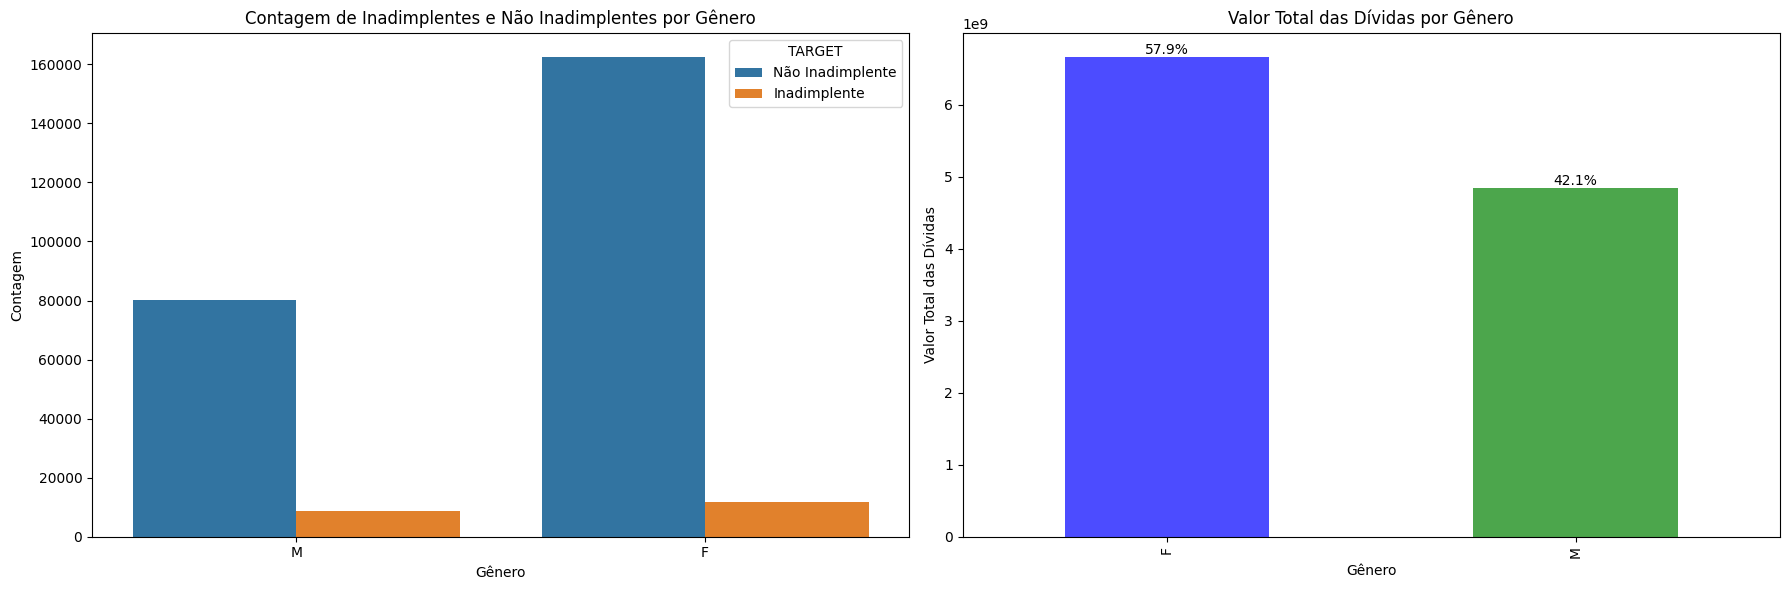

In [151]:
# Plotando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

### Primeiro Gráfico: Contagem de Inadimplentes e Não Inadimplentes por Gênero ###
sns.countplot(x='CODE_GENDER', hue='TARGET', data=application_train4, ax=ax1)
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Contagem')
ax1.set_title('Contagem de Inadimplentes e Não Inadimplentes por Gênero')
ax1.legend(title='TARGET', labels=['Não Inadimplente', 'Inadimplente'])

### Segundo Gráfico: Valor Total das Dívidas por Gênero ###
# Filtrando as colunas relevantes
dados_relevantes = inadimplentes[['CODE_GENDER', 'AMT_CREDIT']]

# Agrupando por gênero e calculando o valor total de dívidas
dividas_por_genero = dados_relevantes.groupby('CODE_GENDER')['AMT_CREDIT'].sum()

# Calculando as porcentagens
total_dividas = dividas_por_genero.sum()
porcentagens = (dividas_por_genero / total_dividas) * 100

# Plotando o gráfico de barras
barras = dividas_por_genero.plot(kind='bar', color=['blue', 'green'], alpha=0.7, ax=ax2)
ax2.set_title('Valor Total das Dívidas por Gênero')
ax2.set_xlabel('Gênero')
ax2.set_ylabel('Valor Total das Dívidas')

# Adicionando as porcentagens como rótulos nas barras
for indice, valor in enumerate(dividas_por_genero):
    barras.text(indice, valor + 1000, f'{porcentagens.iloc[indice]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Obsevações:
1. Gráfico à esquerda:
- As mulheres recorrem mais a empréstimos do que homens, uma hipótese é que a participação crescente das mulheres no mercado de trabalho e suas necessidades de financiamento para educação ou investimentos pessoais, podem estar contribuindo para essa tendência.
- No gráfico, visualmente, apresenta-se uma pequena variação entre homens e mulheres quanto a inadimplência, até certo ponto, homens e mulheres possuem equilibrio quando se trata de cumprir com suas dívidas.
- Homens fazem menos emprestimo e tem uma taxa de inadimplência muito proxima das mulheres, sabendo que mulheres emprestam mais, podemos dizer que homens tendem a não pagar sua dívidas mais do que as mulheres.

2. Gráfico à direita:
- Mulheres emprestam mais, lógicamente tendem a superar os homens na inadimplência, embora a variação não seja exorbitante.
- O que está por trás das mulheres emprestarem mais? Será necessidades, investimentos, crescimento profissional?
-  Essa disparidade na distribuição de dívidas por gênero pode influenciar estratégias de concessão de crédito e políticas financeiras. Compreender essas diferenças pode ajudar instituições financeiras a ajustar suas ofertas de produtos e serviços para melhor atender às necessidades específicas de cada grupo.

### Insigths (Renda) Inadimplentes x Não Inadimplentes

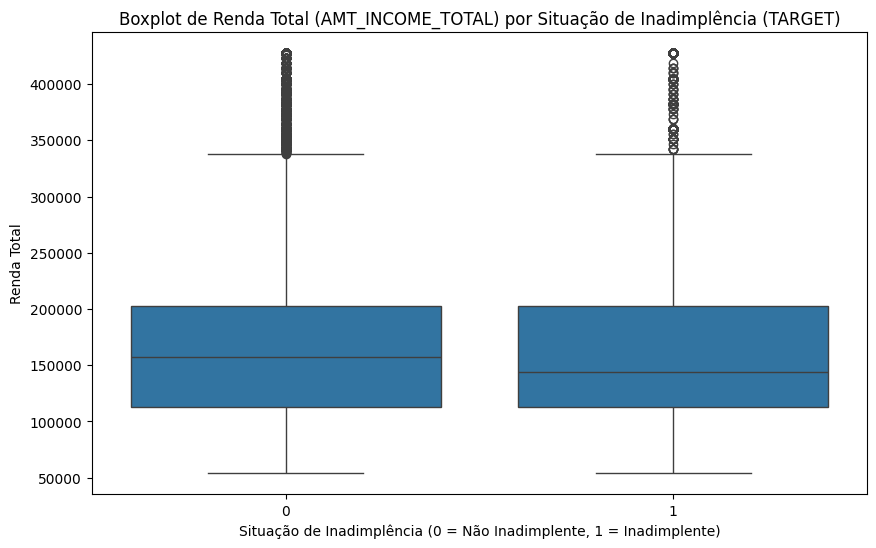

In [152]:
# Boxplot de Renda Total por Situação de Inadimplência
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_train4)
plt.title('Boxplot de Renda Total (AMT_INCOME_TOTAL) por Situação de Inadimplência (TARGET)')
plt.xlabel('Situação de Inadimplência (0 = Não Inadimplente, 1 = Inadimplente)')
plt.ylabel('Renda Total')
plt.show()

Renda Similar:

- Mediana Igual: A mediana igual sugere que a renda central (ou seja, a renda no ponto médio da distribuição) é semelhante para ambos os grupos. Isso significa que a renda por si só pode não ser um indicador determinante de inadimplência.

Avaliação de Risco:

- Necessidade de Outros Fatores: Como a renda mediana é semelhante para ambos os grupos, os bancos devem considerar outros fatores além da renda ao avaliar o risco de inadimplência. Isso pode incluir histórico de crédito, dívidas existentes, estabilidade de emprego, entre outros.

Estratégias de Crédito:

- Critérios Adicionais: Os bancos precisam aplicar critérios adicionais e talvez mais complexos ao conceder crédito, já que a renda por si só não fornece uma distinção clara entre clientes inadimplentes e não inadimplentes.

Políticas de Monitoramento:

- Acompanhamento Contínuo: Os bancos devem monitorar continuamente seus clientes, mesmo aqueles com rendas medianas, pois a renda não é um fator isolado de inadimplência.


### Insigths (Crédito) Inadimplentes x Não Inadimplentes

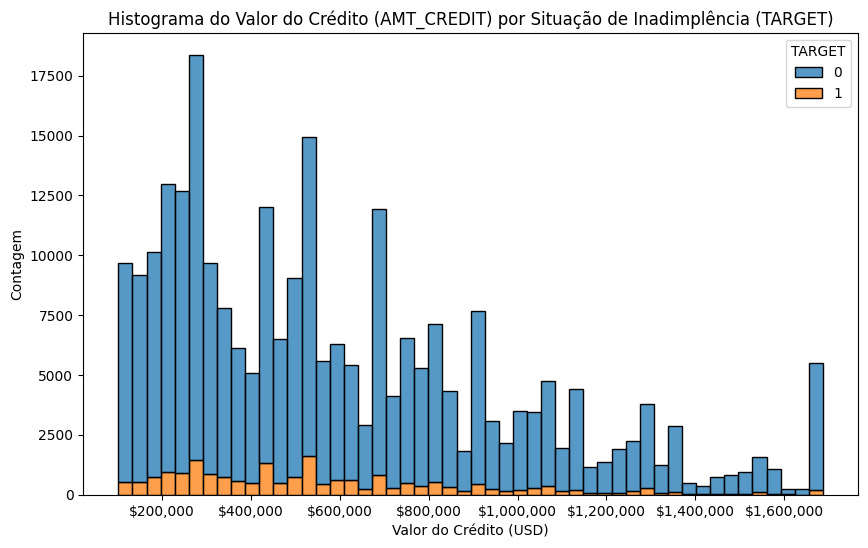

In [153]:
# Histograma do Valor do Crédito por Situação de Inadimplência

# Definindo o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando o histograma
sns.histplot(data=application_train4, x='AMT_CREDIT', hue='TARGET', multiple='stack', bins=50)

# Configurando o título e os rótulos dos eixos
plt.title('Histograma do Valor do Crédito (AMT_CREDIT) por Situação de Inadimplência (TARGET)')
plt.xlabel('Valor do Crédito (USD)')
plt.ylabel('Contagem')

# Formatando os ticks do eixo x para exibir em formato monetário (dólares)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

# Exibindo o gráfico
plt.show()

`Avaliação do Histograma do Valor do Crédito por Situação de Inadimplência`

Distribuição Geral:
  
- A maioria dos créditos concedidos está na faixa de 200.000 a 400.000.
- A frequência de concessão de crédito diminui com o aumento do valor do crédito.

Comparação entre Inadimplentes e Não Inadimplentes:

- Inadimplentes (barras laranjas) são menos frequentes que não inadimplentes (barras azuis) em todas as faixas de valores.
- A proporção de inadimplência é relativamente constante, mas aumenta ligeiramente em valores de crédito mais altos.

Faixas de Valor do Crédito:

- Picos em 200.000, 300.000 e 400.000 têm considerável quantidade de inadimplentes, mas com baixa proporção em relação aos não inadimplentes.
- Em valores de crédito mais altos (800.000 a 1.400.000), a proporção de inadimplentes aumenta ligeiramente.

Conclusão para os Bancos

- Risco Concentrado: O risco de inadimplência é espalhado por várias faixas de valor de crédito, com uma tendência de aumento em créditos de valor mais alto.
- Avaliação de Créditos Altos: Créditos de valor mais alto devem ser avaliados com maior escrutínio devido ao aumento na proporção de inadimplência.

- Política de Concessão de Crédito: Revisar políticas de crédito para considerar adequadamente o risco em todas as faixas de valor de crédito, especialmente em valores mais altos.


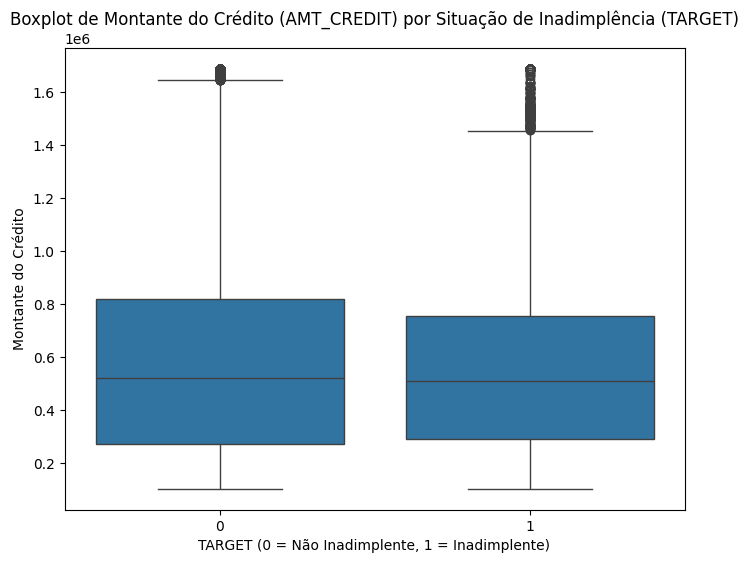

In [154]:
# Boxplot de montante do crédito (AMT_CREDIT) por Target
plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_train4)
plt.title('Boxplot de Montante do Crédito (AMT_CREDIT) por Situação de Inadimplência (TARGET)')
plt.xlabel('TARGET (0 = Não Inadimplente, 1 = Inadimplente)')
plt.ylabel('Montante do Crédito')
plt.show()

Avaliação do Boxplot do Montante do Crédito por Situação de Inadimplência

- Mediana Similar: As medianas dos montantes de crédito para não inadimplentes (0) e inadimplentes (1) são muito semelhantes, em torno de 600.000.

Distribuição dos Dados:
  - O intervalo interquartil (IQR) é similar para ambos os grupos, indicando uma dispersão dos dados comparável.
  - A amplitude total dos valores de crédito é ligeiramente maior para não inadimplentes (0) do que para inadimplentes (1).

Conclusão para os Bancos

- Sem Distinção Clara por Montante de Crédito: O montante de crédito, por si só, não distingue claramente entre inadimplentes e não inadimplentes, dado que as medianas e a dispersão dos dados são similares.
- Avaliação de Risco: Outros fatores além do montante do crédito devem ser considerados na avaliação de risco de inadimplência, pois o valor do crédito não mostra uma diferença significativa entre os dois grupos.

### Insigths (Filhos) Inadimplentes x Não Inadimplentes

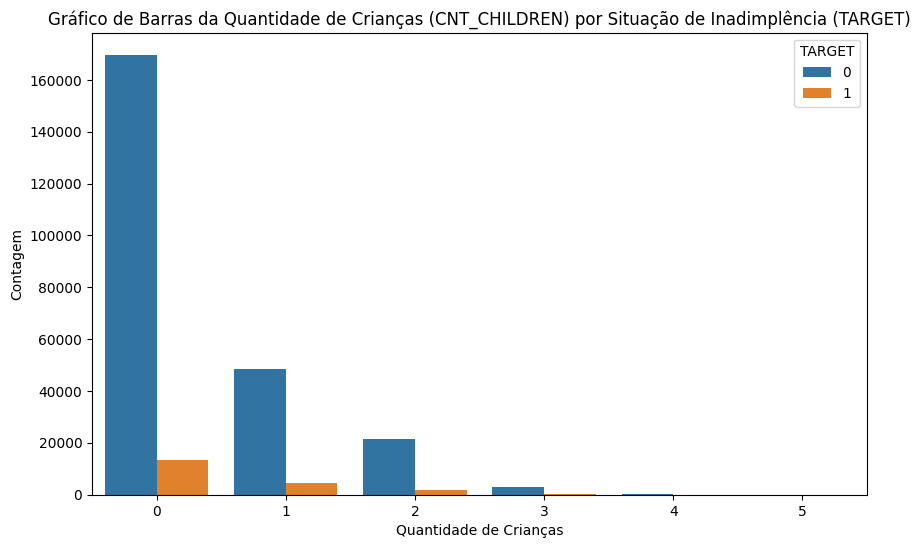

In [155]:
# Gráfico de Barras da Quantidade de Crianças por Situação de Inadimplência
plt.figure(figsize=(10, 6))
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=application_train4)
plt.title('Gráfico de Barras da Quantidade de Crianças (CNT_CHILDREN) por Situação de Inadimplência (TARGET)')
plt.xlabel('Quantidade de Crianças')
plt.ylabel('Contagem')
plt.show()

Análise Histograma Filhos
- Os clientes sem filhos são as que mais fazem empréstimos.
- Os clientes sem filhos emprestam mais, naturalmente, ficam mais inadimplentes.
- A pergunta é `Por que clientes sem filhos estão fazendo mais empréstimos?`, `Se pensarmos no âmbito lógico, pessoas com mais filhos tendem a gastar mais e necessitarem mais de empréstimos, no caso aqui, é o oposto, por quê?`
- Com esses resultados, os bancos podem fazer linhas de créditos mais específicos a esses clientes sem filhos, criar políticas de crédito mais seguras para esse perfil.
- Podemos buscar entender o porquê desses clientes sem filhos emprestarem mais, o motivo é investimento? É endividamento? 

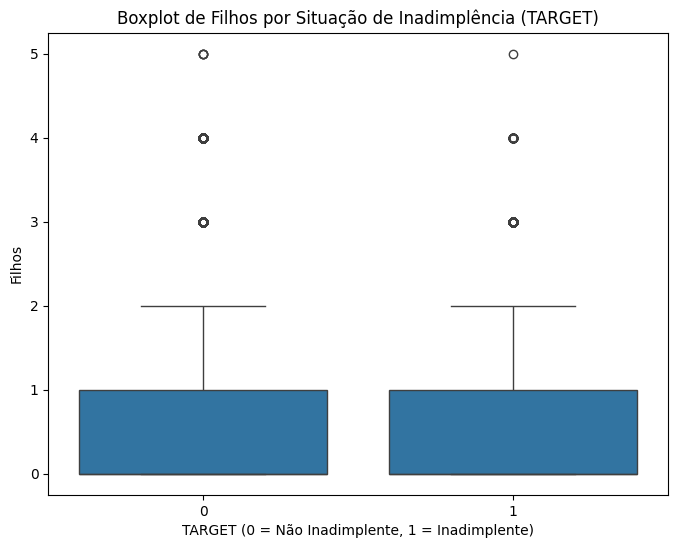

In [156]:
# Boxplot de filhos por inadimplentes ou não
plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=application_train4)
plt.title('Boxplot de Filhos por Situação de Inadimplência (TARGET)')
plt.xlabel('TARGET (0 = Não Inadimplente, 1 = Inadimplente)')
plt.ylabel('Filhos')
plt.show()

`Avaliação do Boxplot do Número de Filhos por Situação de Inadimplência`

- Mediana Igual: As medianas do número de filhos para não inadimplentes (0) e inadimplentes (1) são exatamente iguais.

Distribuição Idêntica:
- O intervalo interquartil (IQR) e a amplitude total dos valores do número de filhos são idênticos para ambos os grupos.
- Outliers: A presença e a distribuição de outliers também são iguais em ambos os grupos.

Conclusão para os Bancos

- Número de Filhos Não é um Fator Distintivo: O número de filhos não é um fator distintivo entre clientes inadimplentes e não inadimplentes. Isso significa que o número de filhos não influencia ou não está correlacionado com a inadimplência.
- Foco em Outros Fatores: Os bancos devem focar em outros fatores mais relevantes e correlacionados com a inadimplência ao avaliar o risco de crédito, já que o número de filhos não mostra qualquer diferença entre os dois grupos.

### Insigths (Bens) Inadimplentes x Não Inadimplentes

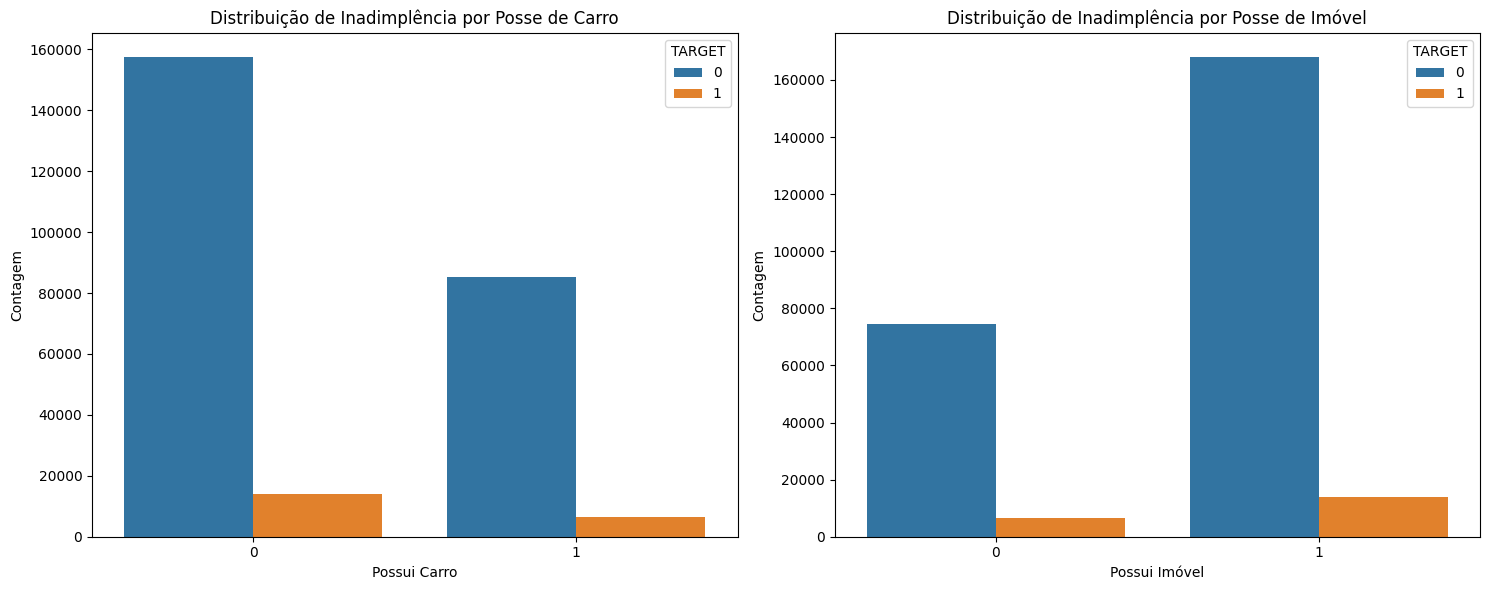

In [157]:
# Configuração da figura com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primeiro gráfico: Distribuição de Inadimplência por Posse de Carro
sns.countplot(data=application_train4, x='FLAG_OWN_CAR', hue='TARGET', ax=axes[0])
axes[0].set_title('Distribuição de Inadimplência por Posse de Carro')
axes[0].set_xlabel('Possui Carro')
axes[0].set_ylabel('Contagem')

# Segundo gráfico: Distribuição de Inadimplência por Posse de Imóvel
sns.countplot(data=application_train4, x='FLAG_OWN_REALTY', hue='TARGET', ax=axes[1])
axes[1].set_title('Distribuição de Inadimplência por Posse de Imóvel')
axes[1].set_xlabel('Possui Imóvel')
axes[1].set_ylabel('Contagem')

# Ajuste dos layouts
plt.tight_layout()
plt.show()

`Distribuição de Inadimplência por Posse de Carro`

Clientes sem carro:

- A maioria dos clientes que não possuem carro (0) está adimplente (TARGET = 0).
- Existe uma proporção menor, mas ainda significativa, de inadimplentes (TARGET = 1) entre os que não possuem carro.

Clientes com carro:

- Entre os clientes que possuem carro (1), a maioria está adimplente.
- A quantidade de inadimplentes que possuem carro é relativamente menor, mas ainda presente.

`Distribuição de Inadimplência por Posse de Imóvel`

Clientes sem imóvel:

- A maioria dos clientes que não possuem imóvel (0) está adimplente.
- A proporção de inadimplentes é menor, mas considerável.

Clientes com imóvel:

- A maioria dos clientes que possuem imóvel (1) está adimplente.
- A quantidade de inadimplentes entre os que possuem imóvel é menor, mas ainda notável.

`Conclusão`

Os gráficos mostram que a maioria dos clientes está adimplente independentemente da posse de carro ou imóvel. No entanto, é importante notar que a inadimplência existe em ambas as categorias. Portanto, estratégias para reduzir a inadimplência devem considerar outros fatores além da posse de bens materiais, focando talvez em políticas de crédito e educação financeira.

### Insigths (Anuidade e Parcelas) Inadimplentes x Não Inadimplentes

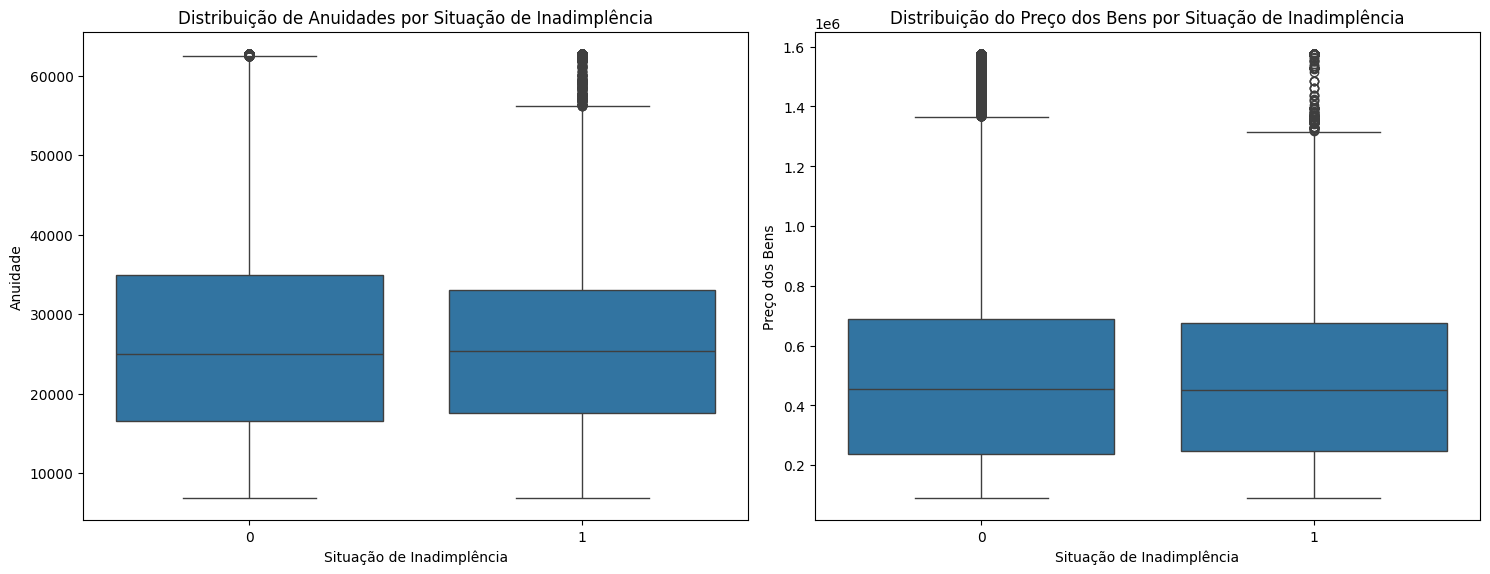

In [158]:
# Definindo o tamanho dos gráficos
plt.figure(figsize=(15, 6))

# Primeiro subplot: Anuidades por Situação de Inadimplência
plt.subplot(1, 2, 1)  # (linhas, colunas, número do subplot)
sns.boxplot(data=application_train4, x='TARGET', y='AMT_ANNUITY')
plt.title('Distribuição de Anuidades por Situação de Inadimplência')
plt.xlabel('Situação de Inadimplência')
plt.ylabel('Anuidade')

# Segundo subplot: Preço dos Bens por Situação de Inadimplência
plt.subplot(1, 2, 2)
sns.boxplot(data=application_train4, x='TARGET', y='AMT_GOODS_PRICE')
plt.title('Distribuição do Preço dos Bens por Situação de Inadimplência')
plt.xlabel('Situação de Inadimplência')
plt.ylabel('Preço dos Bens')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando os gráficos
plt.show()

Conclusão

Os gráficos mostram que clientes inadimplentes tendem a ter anuidades e preços dos bens ligeiramente menores em comparação com clientes adimplentes. Apesar disso, a diferença não é muito significativa, indicando que a inadimplência pode estar mais relacionada a outros fatores além das anuidades e do valor dos bens. Fatores adicionais como a capacidade de pagamento, o histórico de crédito e outras variáveis financeiras podem ser cruciais para entender e mitigar a inadimplência.

### Insigths (Registros e Publicação do ID) Inadimplentes x Não Inadimplentes

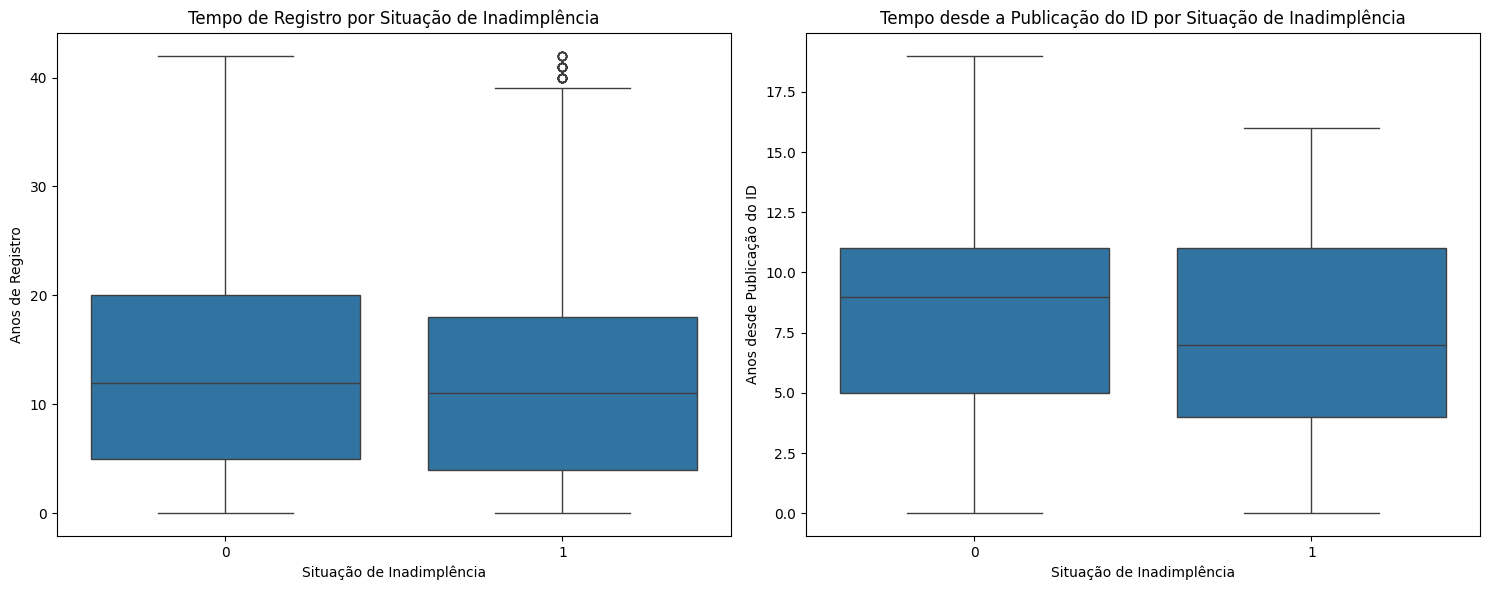

In [159]:
# Definindo o tamanho dos gráficos
plt.figure(figsize=(15, 6))

# Primeiro subplot: Tempo de Registro por Situação de Inadimplência
plt.subplot(1, 2, 1)  # (linhas, colunas, número do subplot)
sns.boxplot(data=application_train4, x='TARGET', y='YEARS_REGISTRATION')
plt.title('Tempo de Registro por Situação de Inadimplência')
plt.xlabel('Situação de Inadimplência')
plt.ylabel('Anos de Registro')

# Segundo subplot: Tempo desde a Publicação do ID por Situação de Inadimplência
plt.subplot(1, 2, 2)
sns.boxplot(data=application_train4, x='TARGET', y='YEARS_ID_PUBLISH')
plt.title('Tempo desde a Publicação do ID por Situação de Inadimplência')
plt.xlabel('Situação de Inadimplência')
plt.ylabel('Anos desde Publicação do ID')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando os gráficos
plt.show()

`Interpretando o Tempo desde a Publicação do ID e a Inadimplência`

- Estabilidade Financeira e Histórico de Crédito:
  Pessoas com um tempo mais longo desde a publicação do ID (mais de 8 anos) podem indicar uma maior estabilidade financeira ao longo do tempo. Isso pode resultar em uma melhor gestão de crédito e menor probabilidade de inadimplência.

- Histórico de Crédito e Risco:
  Indivíduos com um tempo mais curto desde a publicação do ID (menos de 7,5 anos) podem estar em estágios iniciais de construção de crédito ou terem tido históricos de crédito menos estáveis, o que pode aumentar o risco de inadimplência.

- Perfil de Risco para Credores:
  Essa diferença pode influenciar a percepção de risco por parte dos credores. Pessoas com um tempo mais longo desde a publicação do ID podem ser vistas como menos arriscadas e, portanto, podem ter acesso a melhores condições de crédito.

- Impacto no Score de Crédito:
  O tempo desde a publicação do ID também pode afetar o score de crédito das pessoas, sendo um dos fatores considerados pelas agências de crédito na avaliação do risco de crédito.

`Tempo de Registro na Inadimplência`

- Impacto Menor do Tempo de Registro na Inadimplência: O tempo de registro pode não ter um impacto tão significativo na probabilidade de inadimplência quanto outros fatores. Isso poderia sugerir que mesmo pessoas com diferentes períodos de registro podem apresentar comportamentos de crédito semelhantes.



### Insigths (Contato) Inadimplentes x Não inadimplentes

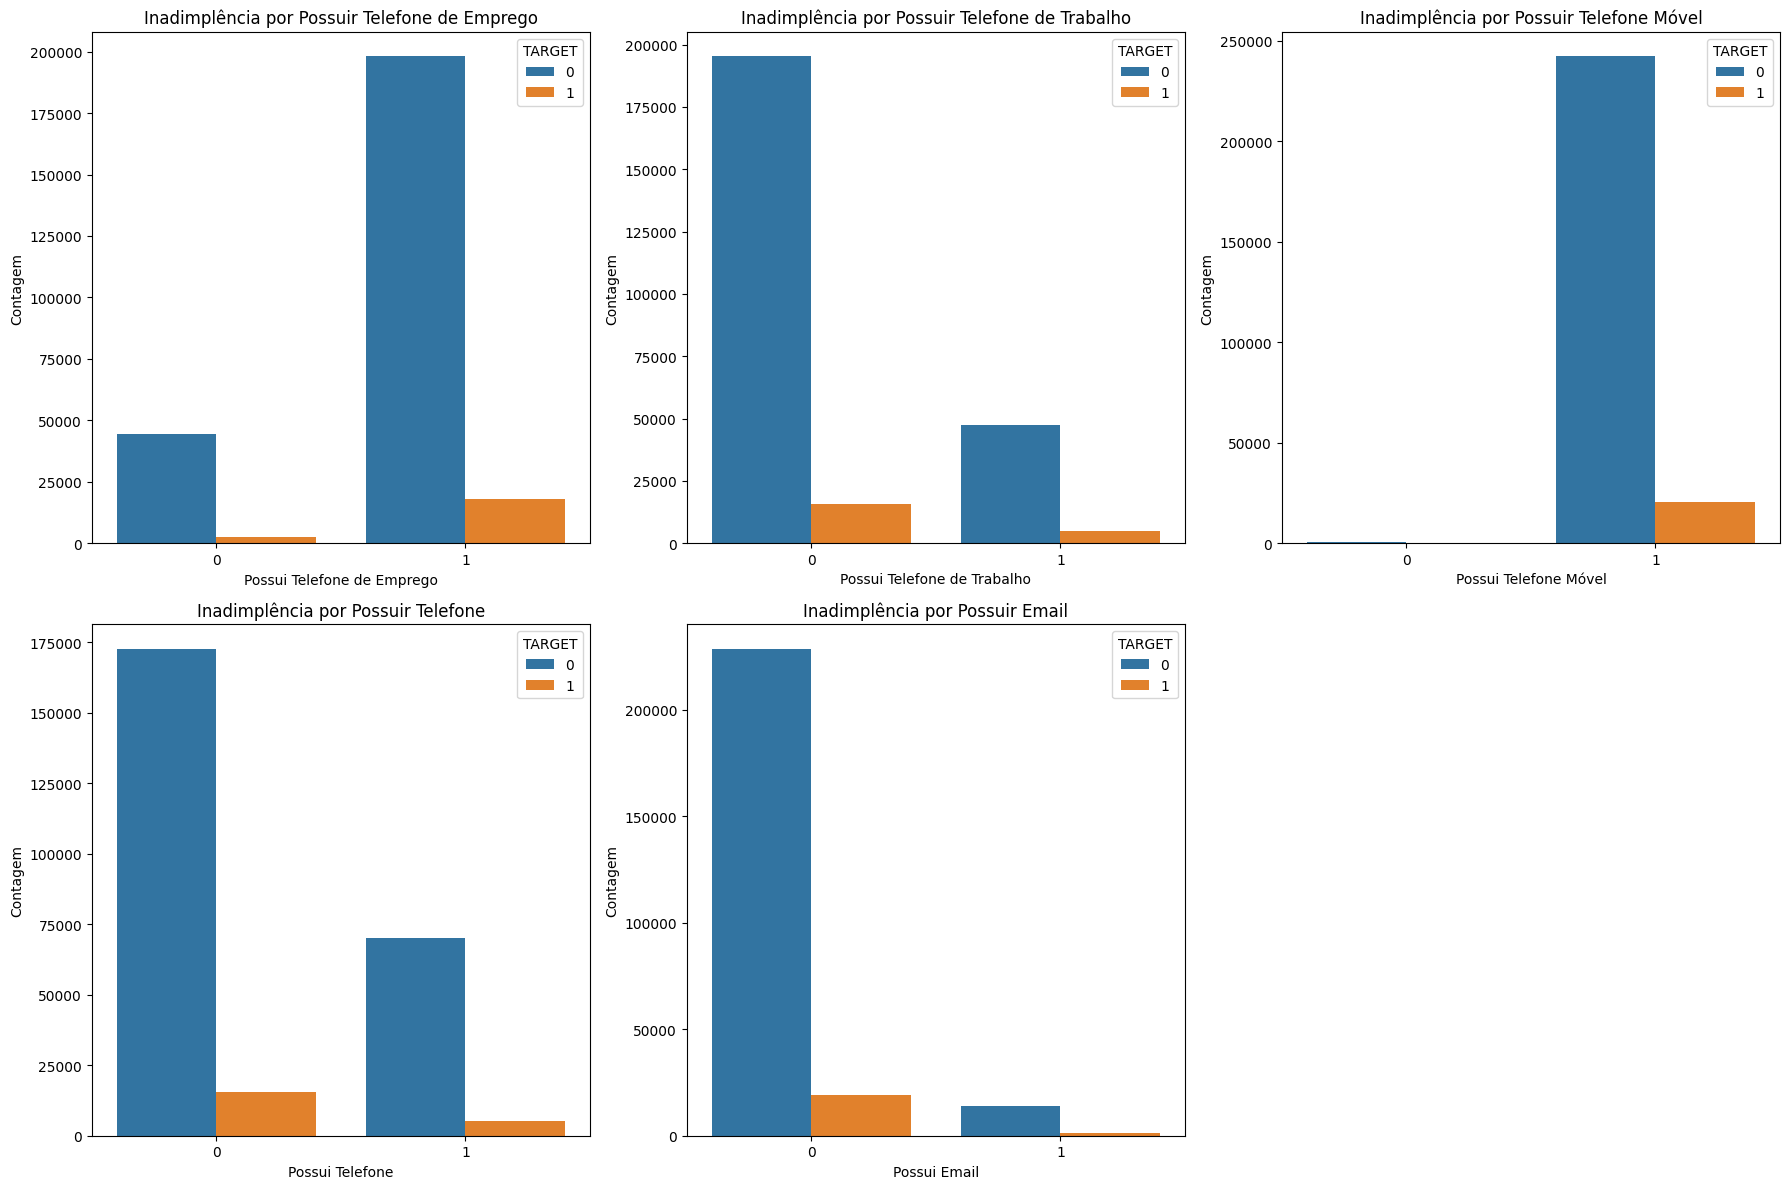

In [160]:
# Definindo o tamanho dos gráficos
plt.figure(figsize=(18, 12))

# Primeiro subplot: Possui Telefone de Emprego
plt.subplot(2, 3, 1)
sns.countplot(data=application_train4, x='FLAG_EMP_PHONE', hue='TARGET')
plt.title('Inadimplência por Possuir Telefone de Emprego')
plt.xlabel('Possui Telefone de Emprego')
plt.ylabel('Contagem')

# Segundo subplot: Possui Telefone de Trabalho
plt.subplot(2, 3, 2)
sns.countplot(data=application_train4, x='FLAG_WORK_PHONE', hue='TARGET')
plt.title('Inadimplência por Possuir Telefone de Trabalho')
plt.xlabel('Possui Telefone de Trabalho')
plt.ylabel('Contagem')

# Terceiro subplot: Possui Telefone Móvel
plt.subplot(2, 3, 3)
sns.countplot(data=application_train4, x='FLAG_CONT_MOBILE', hue='TARGET')
plt.title('Inadimplência por Possuir Telefone Móvel')
plt.xlabel('Possui Telefone Móvel')
plt.ylabel('Contagem')

# Quarto subplot: Possui Telefone
plt.subplot(2, 3, 4)
sns.countplot(data=application_train4, x='FLAG_PHONE', hue='TARGET')
plt.title('Inadimplência por Possuir Telefone')
plt.xlabel('Possui Telefone')
plt.ylabel('Contagem')

# Quinto subplot: Possui Email
plt.subplot(2, 3, 5)
sns.countplot(data=application_train4, x='FLAG_EMAIL', hue='TARGET')
plt.title('Inadimplência por Possuir Email')
plt.xlabel('Possui Email')
plt.ylabel('Contagem')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando os gráficos
plt.show()

### Insigths (Região) Inadimplentes x Não Inadimplentes

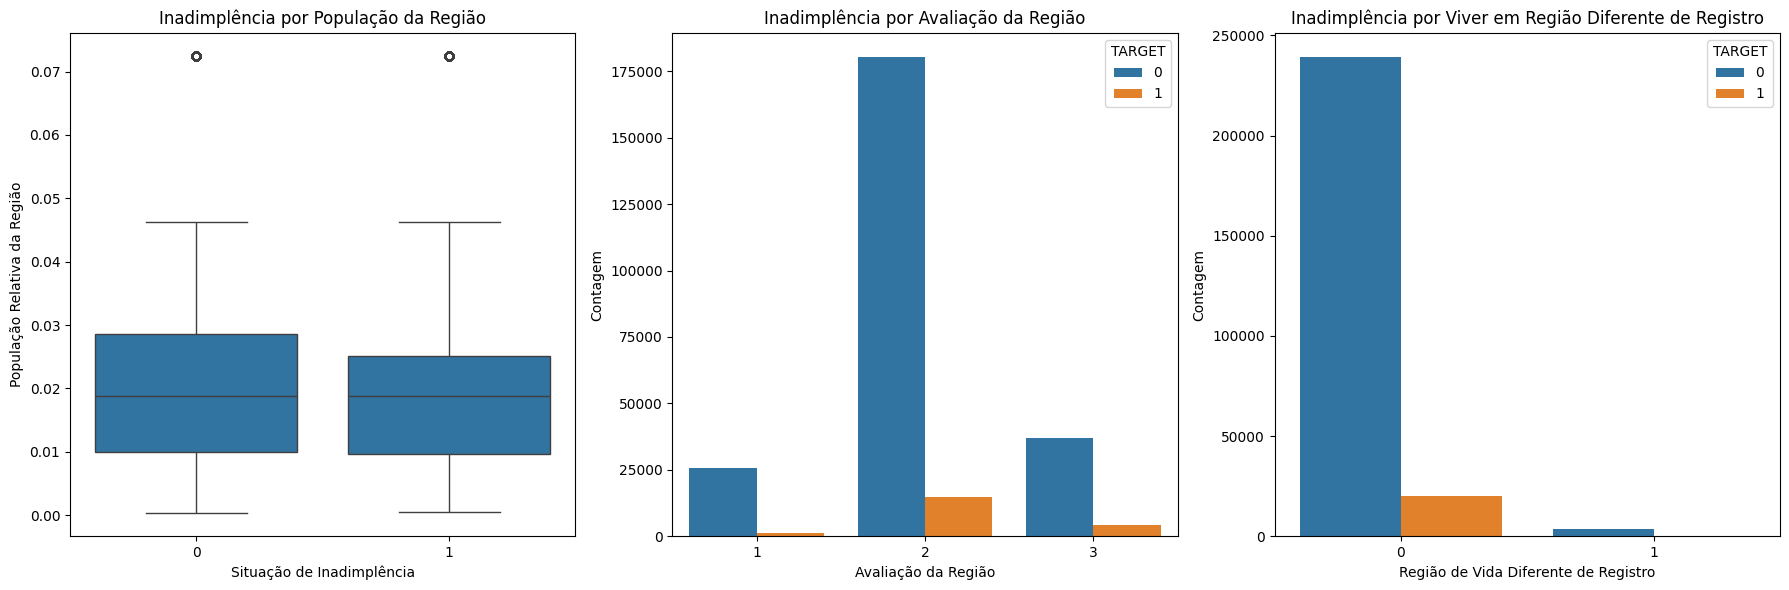

In [161]:
# Definindo o tamanho dos gráficos
plt.figure(figsize=(18, 6))

# Primeiro subplot: Boxplot de População da Região por Situação de Inadimplência
plt.subplot(1, 3, 1)
sns.boxplot(data=application_train4, x='TARGET', y='REGION_POPULATION_RELATIVE')
plt.title('Inadimplência por População da Região')
plt.xlabel('Situação de Inadimplência')
plt.ylabel('População Relativa da Região')

# Segundo subplot: Countplot de Avaliação da Região por Situação de Inadimplência
plt.subplot(1, 3, 2)
sns.countplot(data=application_train4, x='REGION_RATING_CLIENT', hue='TARGET')
plt.title('Inadimplência por Avaliação da Região')
plt.xlabel('Avaliação da Região')
plt.ylabel('Contagem')

# Terceiro subplot: Countplot de Viver em Região Diferente de Registro por Situação de Inadimplência
plt.subplot(1, 3, 3)
sns.countplot(data=application_train4, x='REG_REGION_NOT_LIVE_REGION', hue='TARGET')
plt.title('Inadimplência por Viver em Região Diferente de Registro')
plt.xlabel('Região de Vida Diferente de Registro')
plt.ylabel('Contagem')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando os gráficos
plt.show()


## Análise Variaveis

In [162]:
def calcular_iv(inadimplentes, nao_inadimplentes, variavel):
    # Calculando a taxa de inadimplência e não inadimplência
    bad_rate = inadimplentes.groupby(variavel).size() / len(inadimplentes)
    good_rate = nao_inadimplentes.groupby(variavel).size() / len(nao_inadimplentes)
    
    # Calculando o WOE (Weight of Evidence)
    woe = np.log(good_rate / bad_rate)
    
    # Calculando o IV (Information Value)
    iv = np.sum((good_rate - bad_rate) * woe)
    
    return iv

# Dicionário para armazenar os IVs
iv_variaveis = {}

# Iteração sobre as colunas dos dataframes (supondo que são os mesmos para inadimplentes e não inadimplentes)
for coluna in inadimplentes.columns:
    if coluna != 'TARGET':
        iv = calcular_iv(inadimplentes, nao_inadimplentes, coluna)
        iv_variaveis[coluna] = iv

# Ordenando as variáveis por IV decrescente
iv_variaveis_ordenado = sorted(iv_variaveis.items(), key=lambda x: x[1], reverse=True)

print(f'Variaveis mais importantes com base no IV:')

# Filtrando e exibindo apenas variáveis com IV > 0.02
for variavel, valor_iv in iv_variaveis_ordenado:
    if valor_iv < 0.02:
        print(f'{variavel}: {valor_iv}')


Variaveis mais importantes com base no IV:
NAME_FAMILY_STATUS: 0.01848175362943958
NAME_HOUSING_TYPE: 0.015455220520106346
NAME_CONTRACT_TYPE: 0.01436436621771805
LIVE_CITY_NOT_WORK_CITY: 0.01255104236282028
FLAG_DOCUMENT_6: 0.012152137231287453
HOUR_APPR_PROCESS_START: 0.010614932521176386
FLAG_WORK_PHONE: 0.00887615296958075
FLAG_PHONE: 0.008180183224149892
CNT_CHILDREN: 0.006317013634304071
FLAG_OWN_CAR: 0.006085709505303931
CNT_FAM_MEMBERS: 0.0054070746972090244
TOTAL_REQ_CREDIT_BUREAU: 0.004015583215348499
FLAG_DOCUMENT_13: 0.0029023866550618744
FLAG_DOCUMENT_16: 0.0021502786519472395
FLAG_DOCUMENT_14: 0.0018926262325916871
NAME_TYPE_SUITE: 0.001191985569272194
FLAG_DOCUMENT_18: 0.0008550364968924888
FLAG_DOCUMENT_8: 0.0007804255126254944
FLAG_DOCUMENT_15: 0.0006729095157142895
FLAG_OWN_REALTY: 0.0006016849857735918
REG_REGION_NOT_WORK_REGION: 0.0005644876881478157
FLAG_DOCUMENT_11: 0.0004959559762242921
REG_REGION_NOT_LIVE_REGION: 0.00037252208206705315
WEEKDAY_APPR_PROCESS_START

In [163]:
# Lista das variáveis que você deseja excluir
variaveis_excluir = [
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE',
    'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'HOUR_APPR_PROCESS_START',
    'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_CHILDREN', 'FLAG_OWN_CAR',
    'CNT_FAM_MEMBERS', 'TOTAL_REQ_CREDIT_BUREAU', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_14', 'NAME_TYPE_SUITE',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_15',
    'FLAG_OWN_REALTY', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_11',
    'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'LIVE_REGION_NOT_WORK_REGION',
    'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_EMAIL', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']

# Excluir as variáveis do dataframe application_train4
application_train5 = application_train4.drop(columns=variaveis_excluir)

In [164]:
# Dados normais
application_train5.head()

SK_ID_CURR  TARGET CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002       1           M          202500.0    406597.5      24700.5   
1      100003       0           F          270000.0   1293502.5      35698.5   
2      100004       0           M           67500.0    135000.0       6858.0   
4      100007       0           M          121500.0    513000.0      21865.5   
5      100008       0           M           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

   REGION_POPULATION_RELATIVE  ...  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                    0.018801  ...                   9                 5   
1                    0.003541  ...                   3                 0   
2                    0.010032  ...                  11                 6   
4                    0.028663  ...                  11                 9   
5                    0.035792  ...                  13                 1   

   FLAG_EMP_PHONE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0               1                     2                            2   
1               1                     1                            1   
2               1                     2                            2   
4               1                     2                            2   
5               1                     2                            2   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                       0  Business Entity Type 3   
1                       0                       0                  School   
2                       0                       0              Government   
4                       0                       1                Religion   
5                       0                       0                   Other   

  FLAG_DOCUMENT_3  EXT_SOURCE_MEAN  
0               1         0.201162  
1               1         0.622246  
2               0         0.642739  
4               0         0.322738  
5               1         0.487726  

[5 rows x 21 columns]

In [165]:
# Nenhum valor nulo criado após a exclusão das variaveis
application_train5.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
REGION_POPULATION_RELATIVE     0
YEARS_BIRTH                    0
YEARS_REGISTRATION             0
YEARS_ID_PUBLISH               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_3                0
EXT_SOURCE_MEAN                0
dtype: int64

In [166]:
# Variaveis excluidas corretamente 
application_train5.shape

(263177, 21)

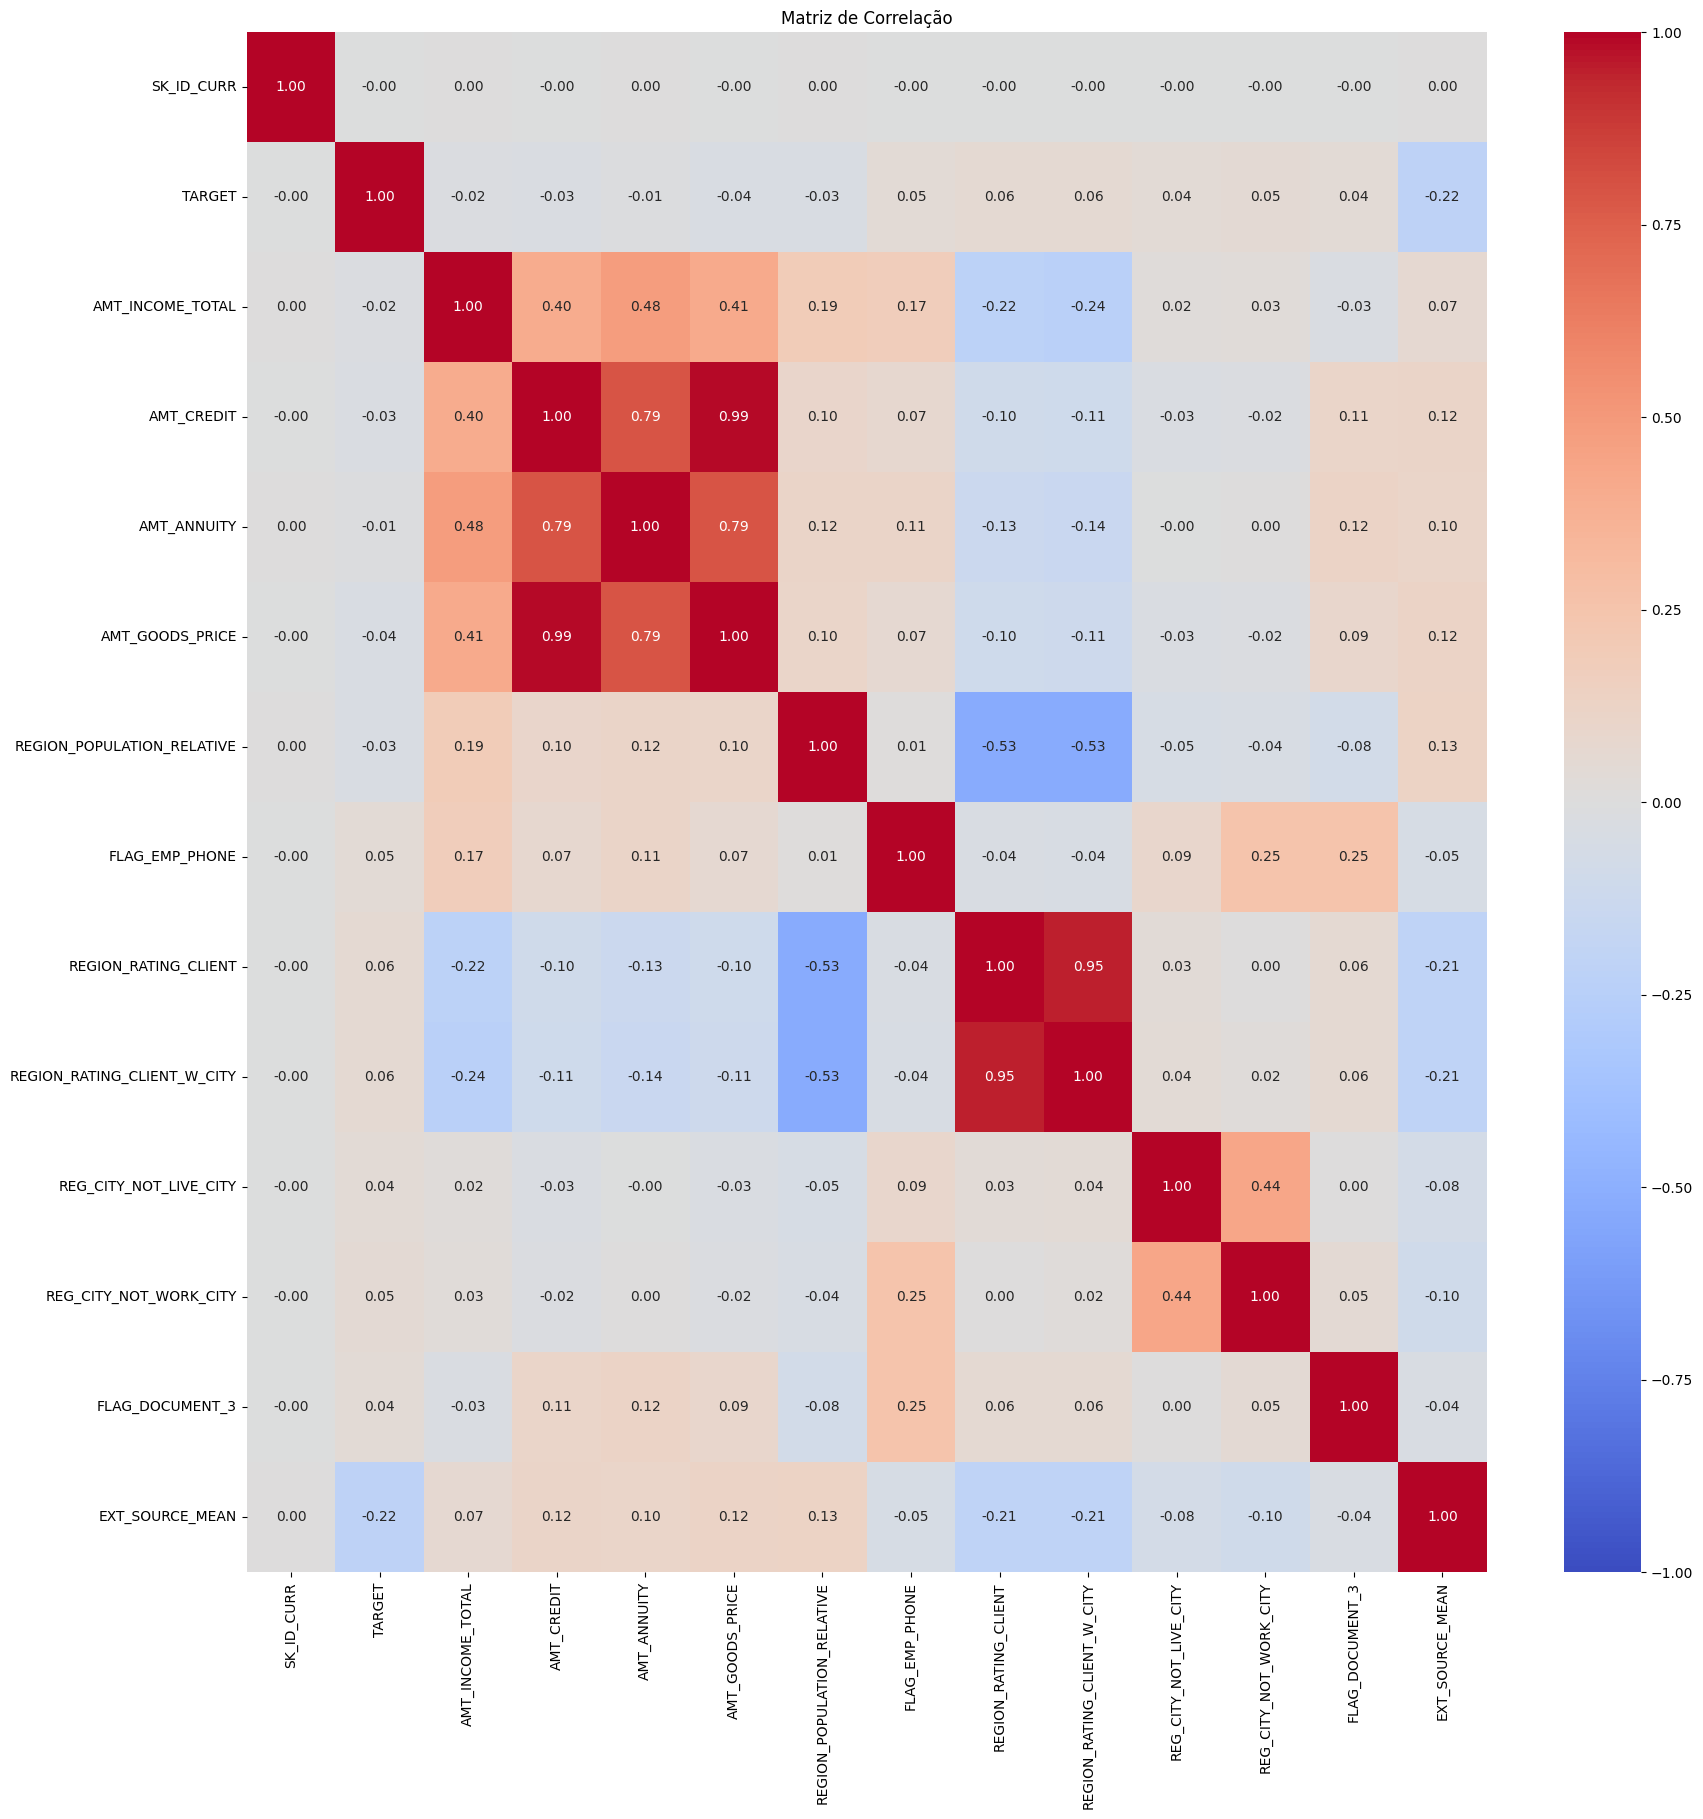

SK_ID_CURR    TARGET  AMT_INCOME_TOTAL  \
SK_ID_CURR                     1.000000 -0.002428          0.003832   
TARGET                        -0.002428  1.000000         -0.019165   
AMT_INCOME_TOTAL               0.003832 -0.019165          1.000000   
AMT_CREDIT                    -0.001197 -0.028469          0.400809   
AMT_ANNUITY                    0.000438 -0.010142          0.481486   
AMT_GOODS_PRICE               -0.001007 -0.037954          0.406463   
REGION_POPULATION_RELATIVE     0.000046 -0.034065          0.191789   
FLAG_EMP_PHONE                -0.001819  0.045017          0.173514   
REGION_RATING_CLIENT          -0.000960  0.055485         -0.222484   
REGION_RATING_CLIENT_W_CITY   -0.001088  0.057500         -0.240950   
REG_CITY_NOT_LIVE_CITY        -0.002229  0.043149          0.017171   
REG_CITY_NOT_WORK_CITY        -0.001875  0.049053          0.027751   
FLAG_DOCUMENT_3               -0.002229  0.043710         -0.031025   
EXT_SOURCE_MEAN                0.001933 -0.215570          0.065067   

                             AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    -0.001197     0.000438        -0.001007   
TARGET                        -0.028469    -0.010142        -0.037954   
AMT_INCOME_TOTAL               0.400809     0.481486         0.406463   
AMT_CREDIT                     1.000000     0.791771         0.986477   
AMT_ANNUITY                    0.791771     1.000000         0.793809   
AMT_GOODS_PRICE                0.986477     0.793809         1.000000   
REGION_POPULATION_RELATIVE     0.096986     0.116322         0.101744   
FLAG_EMP_PHONE                 0.071082     0.112623         0.069097   
REGION_RATING_CLIENT          -0.099344    -0.128316        -0.101672   
REGION_RATING_CLIENT_W_CITY   -0.108092    -0.141689        -0.109770   
REG_CITY_NOT_LIVE_CITY        -0.025656    -0.004049        -0.026108   
REG_CITY_NOT_WORK_CITY        -0.015765     0.004786        -0.017367   
FLAG_DOCUMENT_3                0.107869     0.120983         0.087577   
EXT_SOURCE_MEAN                0.115214     0.103063         0.123876   

                             REGION_POPULATION_RELATIVE  FLAG_EMP_PHONE  \
SK_ID_CURR                                     0.000046       -0.001819   
TARGET                                        -0.034065        0.045017   
AMT_INCOME_TOTAL                               0.191789        0.173514   
AMT_CREDIT                                     0.096986        0.071082   
AMT_ANNUITY                                    0.116322        0.112623   
AMT_GOODS_PRICE                                0.101744        0.069097   
REGION_POPULATION_RELATIVE                     1.000000        0.008407   
FLAG_EMP_PHONE                                 0.008407        1.000000   
REGION_RATING_CLIENT                          -0.527059       -0.038152   
REGION_RATING_CLIENT_W_CITY                   -0.525249       -0.040567   
REG_CITY_NOT_LIVE_CITY                        -0.048206        0.089122   
REG_CITY_NOT_WORK_CITY                        -0.039886        0.252223   
FLAG_DOCUMENT_3                               -0.079256        0.250335   
EXT_SOURCE_MEAN                                0.132729       -0.053421   

                             REGION_RATING_CLIENT  \
SK_ID_CURR                              -0.000960   
TARGET                                   0.055485   
AMT_INCOME_TOTAL                        -0.222484   
AMT_CREDIT                              -0.099344   
AMT_ANNUITY                             -0.128316   
AMT_GOODS_PRICE                         -0.101672   
REGION_POPULATION_RELATIVE              -0.527059   
FLAG_EMP_PHONE                          -0.038152   
REGION_RATING_CLIENT                     1.000000   
REGION_RATING_CLIENT_W_CITY              0.950538   
REG_CITY_NOT_LIVE_CITY                   0.032555   
REG_CITY_NOT_WORK_CITY                   0.003393   
FLAG_DOCUMENT_3                          0.057160   

In [167]:
numeric_columns = application_train5.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = application_train5[numeric_columns].corr()

# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

correlation_matrix

`Análise Mapa de Calor`

- Todas as variaveis tem uma relação muito fraca, quase nula com a TARGET, com excessão da EXT_SOURCE_MEAN que obteve uma correlação negativa moderada com a Target.
- As variaveis que se tratam de regiões e as variaveis relacionadas a renda, crédito, anuidade pssuem uma correlação muito forte entre si, consequentemente essas variaveis podem trazer multicolineariedade no modelo.
- Se analisarmos a correlação fraca dessas variaveis com a TARGET teremos que usar modelos que não necessitem de uma relação linear, provavelmente, a regressão logistica terá uma péssima performace.

In [168]:
# Vamos verificar a correlação das variaveis excluidas com base no IV se possuem importância para a Target
application_train6 = application_train4[['TARGET',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE',
    'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'HOUR_APPR_PROCESS_START',
    'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_CHILDREN', 'FLAG_OWN_CAR',
    'CNT_FAM_MEMBERS', 'TOTAL_REQ_CREDIT_BUREAU', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_14', 'NAME_TYPE_SUITE',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_15',
    'FLAG_OWN_REALTY', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_11',
    'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'LIVE_REGION_NOT_WORK_REGION',
    'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_EMAIL', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'SK_ID_CURR'
]]


application_train6.shape

(263177, 39)

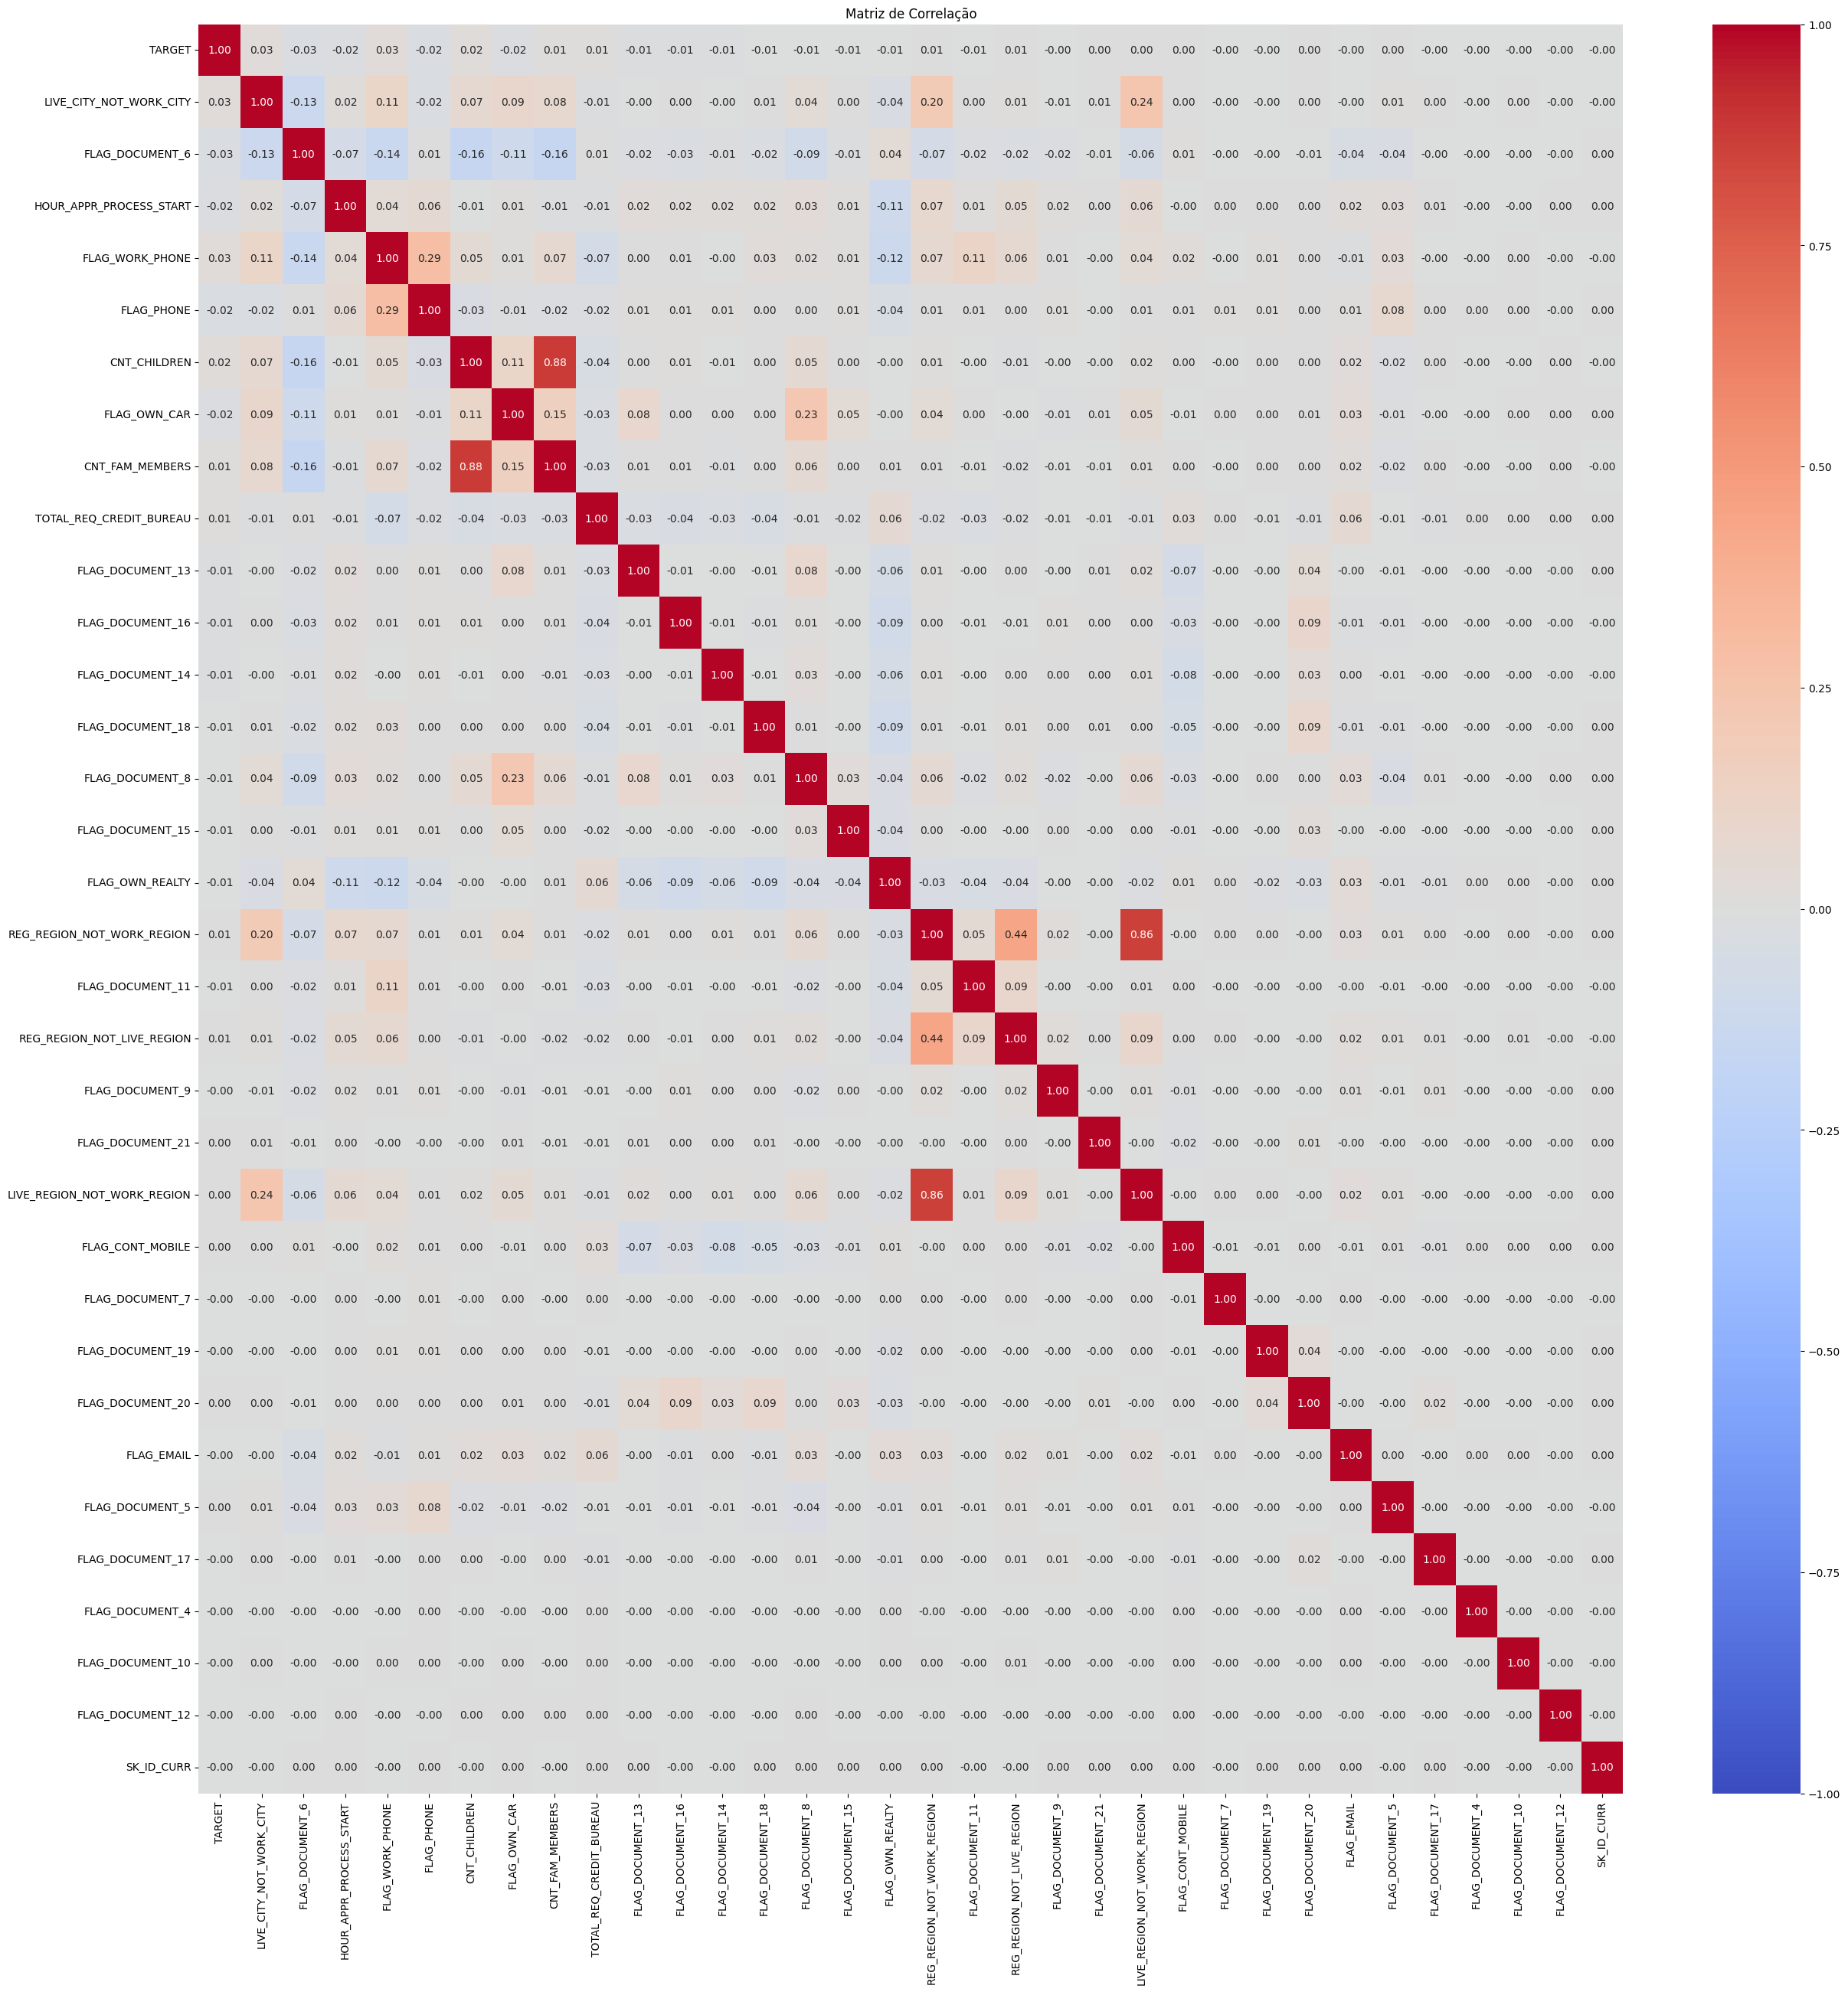

In [169]:
# Criando o mapa de calor com as variaveis excluidas para verificar vizualmente
numeric_columns = application_train6.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = application_train6[numeric_columns].corr()

# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

`Análise Mapa de Calor`

- Decidi verificar as variaveis excluidas com base na analise IV e constatar que não só as variaveis consideradas mais importantes tem uma correlação fraca ou nula com a TARGET, mas também todas as outras variaveis desse dataframe.

In [170]:
# Vamos salvar o dataframe application_train5 para acrescentar outros atributos que possam contribuir com o modelo
application_train5.to_csv('application_train5.csv', index=False)